# numerical - EDA (12월 17일 시작~)

## # numerical 변수들 EDA
### ## preprocessed_uplift_1216, preprocessed_uplift_1218 의 numerical 변수들은 모두 같다

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import glob
import os
import scipy

%matplotlib inline

In [2]:
scipy.__version__

'1.4.0'

In [3]:
import seaborn as sns

In [4]:
pwd

'/Users/we/Google 드라이브/위메프/GCS data/19년 12월/uplift'

In [5]:
glob.glob('./*')

['./uplift_3day_m_id별가입일자_v01_20191213.xlsx',
 './step1_EDA_1210_보존.ipynb',
 './ojm_uplift.zip',
 './step1-3_EDA_categorical.ipynb',
 './step1-1_EDA_1216.ipynb',
 './uplift_201912.xlsx',
 './Untitled.ipynb',
 './preprocessed_uplift_1216.xlsx',
 './step1-2_Preprocesing_1216.ipynb',
 './~$속성값정의서.xlsx',
 './ver1_modeling_1211.ipynb',
 './preprocessed_uplift_1216.csv',
 './uplift_201912.csv',
 './ver1-1_modeling_1211.ipynb',
 './속성값정의서.xlsx',
 './ojm_uplift_1216.csv',
 './step3_.ipynb',
 './step1-4_EDA_numerical.ipynb']

In [6]:
pwd

'/Users/we/Google 드라이브/위메프/GCS data/19년 12월/uplift'

In [7]:
pd.set_option('display.max_columns', 500)



---



---



# 데이터 로드
- 전처리된 데이터 : preprocessed_uplift_1216.csv


In [8]:
data = pd.read_csv('preprocessed_uplift_1216.csv', index_col = 0)

In [9]:
data.head()

,crm_id,cmpn_nm,m_id,cont_group,start_date,end_date,min_value,max_value,text_yn,push_yn,mail_yn,last_buy_date,result_buy_yn,buy_period,buy_cnt_date,buy_cnt_payment,buy_amount,buying_trend,buying_trend_group,cate_buy_cnt,cate_rate,coupon_use_rate,crm_coupon_use_rate,buy_amount_3day,buy_cnt_payment_3day,buy_ep_yn_3day,buy_amount_avg,visit_gubn,dt_cnt_last_visit,dt_cnt_last_buy,last_buy_seg,last_buy_platform,wmp_pay_yn,ratio_spc,referral_source,referral_flag,refund_rate,wmp_freq,wmp_stay_avg,order_route,wmp_pick_click,rgt_elapsed_days,buy_amount_avg_all,buy_amount_avg_all_seg,rgt_elapsed_days_seg,cate_main_buy_
0,33,~3day,1000298,3,2019-11-20,2019-11-20,0,0,1,0,1,2019-11-18,1,6.0,40,58,1122105,0.00000,stable,11.0,35.0,41,0,69000,3,N,19147.0,O,5.0,6.0,D-2,APP,0,0.9,google,outside,11,16.0,7.0,best,5,3330,28052.625000,1,5,3
1,33,~3day,1000347,1,2019-11-14,2019-11-14,30000,5000,1,0,1,2019-11-13,0,178.0,2,2,37400,0.36854,stable,1.0,50.0,50,0,27500,1,Y,9900.0,R,177.0,178.0,D-1,MWEB,0,0.0,naver,outside,0,5.0,2.0,else,0,3324,18700.000000,1,5,11
2,33,~3day,1000571,3,2019-11-14,2019-11-14,0,0,1,1,1,2019-11-13,0,36.0,11,15,240412,-2.00000,long,1.0,20.0,20,0,11800,1,N,16329.0,O,6.0,36.0,D-1,APP,0,0.2,app_push,inside,0,3.0,3.0,else,0,3324,21855.636364,1,5,11
3,33,~3day,1001894,1,2019-11-11,2019-11-11,30000,5000,1,0,1,2019-11-08,0,70.0,6,8,90100,24.00000,short,3.0,60.0,38,0,5000,1,N,12157.0,O,7.0,7.0,D-3,APP,0,1.0,(direct),direct,33,6.0,0.0,else,1,3321,15016.666667,1,5,2
4,33,~3day,1002503,1,2019-11-12,2019-11-12,30000,5000,1,0,1,2019-11-11,0,7.0,49,69,1090116,0.00000,stable,18.0,40.0,17,0,18700,2,N,15991.0,O,2.0,31.0,D-1,PC,0,0.8,TypeB_C,outside,7,31.0,3.0,special,0,3322,22247.265306,1,5,3


In [10]:
data.shape

(419554, 46)

In [11]:
data.columns

Index(['crm_id', 'cmpn_nm', 'm_id', 'cont_group', 'start_date', 'end_date',
       'min_value', 'max_value', 'text_yn', 'push_yn', 'mail_yn',
       'last_buy_date', 'result_buy_yn', 'buy_period', 'buy_cnt_date',
       'buy_cnt_payment', 'buy_amount', 'buying_trend', 'buying_trend_group',
       'cate_buy_cnt', 'cate_rate', 'coupon_use_rate', 'crm_coupon_use_rate',
       'buy_amount_3day', 'buy_cnt_payment_3day', 'buy_ep_yn_3day',
       'buy_amount_avg', 'visit_gubn', 'dt_cnt_last_visit', 'dt_cnt_last_buy',
       'last_buy_seg', 'last_buy_platform', 'wmp_pay_yn', 'ratio_spc',
       'referral_source', 'referral_flag', 'refund_rate', 'wmp_freq',
       'wmp_stay_avg', 'order_route', 'wmp_pick_click', 'rgt_elapsed_days',
       'buy_amount_avg_all', 'buy_amount_avg_all_seg', 'rgt_elapsed_days_seg',
       'cate_main_buy_'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419554 entries, 0 to 419553
Data columns (total 46 columns):
crm_id                    419554 non-null int64
cmpn_nm                   419554 non-null object
m_id                      419554 non-null int64
cont_group                419554 non-null int64
start_date                419554 non-null object
end_date                  419554 non-null object
min_value                 419554 non-null int64
max_value                 419554 non-null int64
text_yn                   419554 non-null int64
push_yn                   419554 non-null int64
mail_yn                   419554 non-null int64
last_buy_date             419554 non-null object
result_buy_yn             419554 non-null int64
buy_period                419554 non-null float64
buy_cnt_date              419554 non-null int64
buy_cnt_payment           419554 non-null int64
buy_amount                419554 non-null int64
buying_trend              419554 non-null float64
buying_trend_grou

In [13]:
data.nunique()

crm_id                         1
cmpn_nm                        1
m_id                      411220
cont_group                     2
start_date                    10
end_date                      10
min_value                      2
max_value                      2
text_yn                        2
push_yn                        2
mail_yn                        2
last_buy_date                 14
result_buy_yn                  2
buy_period                   400
buy_cnt_date                 175
buy_cnt_payment              324
buy_amount                288765
buying_trend                 755
buying_trend_group             3
cate_buy_cnt                  95
cate_rate                     99
coupon_use_rate              101
crm_coupon_use_rate           50
buy_amount_3day            19606
buy_cnt_payment_3day          12
buy_ep_yn_3day                 2
buy_amount_avg             95771
visit_gubn                     3
dt_cnt_last_visit           1295
dt_cnt_last_buy             2166
last_buy_s

In [14]:
data.isnull().sum()

crm_id                    0
cmpn_nm                   0
m_id                      0
cont_group                0
start_date                0
end_date                  0
min_value                 0
max_value                 0
text_yn                   0
push_yn                   0
mail_yn                   0
last_buy_date             0
result_buy_yn             0
buy_period                0
buy_cnt_date              0
buy_cnt_payment           0
buy_amount                0
buying_trend              0
buying_trend_group        0
cate_buy_cnt              0
cate_rate                 0
coupon_use_rate           0
crm_coupon_use_rate       0
buy_amount_3day           0
buy_cnt_payment_3day      0
buy_ep_yn_3day            0
buy_amount_avg            0
visit_gubn                0
dt_cnt_last_visit         0
dt_cnt_last_buy           0
last_buy_seg              0
last_buy_platform         0
wmp_pay_yn                0
ratio_spc                 0
referral_source           0
referral_flag       

---

> ## # 실험군/대조군 정보

In [15]:
# raw 데이터, 실험군의 비율
data[data.cont_group == 1].shape[0]/data.shape[0]

0.9234544301806203

----

> ### 구매비율 차이

In [16]:
# raw 데이터, 실험군/대조군의 구매비율 - (raw데이터와 조금 다르지만, 차이 양상은 유지돼!)

exp_buy = data[(data.cont_group == 1) & (data.result_buy_yn == 1)].shape[0]
exp_buy_ratio = data[(data.cont_group == 1) & (data.result_buy_yn == 1)].shape[0]/data[(data.cont_group == 1)].shape[0]

cont_buy = data[(data.cont_group == 3) & (data.result_buy_yn == 1)].shape[0]
cont_buy_ratio = data[(data.cont_group == 3) & (data.result_buy_yn == 1)].shape[0]/data[(data.cont_group == 3)].shape[0]

print( f'Preprocessed data, exp_buy_ratio : {round(exp_buy_ratio, 3)*100} %,  size: {exp_buy}' )
print( f'Preprocessed data, cont_buy_ratio : {round(cont_buy_ratio, 3)*100} %, size: {cont_buy}' )

Preprocessed data, exp_buy_ratio : 9.5 %,  size: 36735
Preprocessed data, cont_buy_ratio : 9.0 %, size: 2894


---
---

In [17]:
# 모델링에 사용될 Features 따로 정의한다
# cont_group(잠재변수) / result_buy_yn(종속변수)

used_features = ['cont_group', 'result_buy_yn', 'text_yn', 'push_yn', 'mail_yn',
       'buy_period', 'buy_cnt_date', 'buy_cnt_payment', 'buy_amount', 'buying_trend', 'buying_trend_group',
       'cate_buy_cnt', 'cate_rate', 'coupon_use_rate', 'crm_coupon_use_rate',
       'buy_amount_3day', 'buy_cnt_payment_3day', 'buy_ep_yn_3day',
       'buy_amount_avg', 'visit_gubn', 'dt_cnt_last_visit', 'dt_cnt_last_buy',
       'last_buy_seg', 'last_buy_platform', 'wmp_pay_yn', 'ratio_spc',
       'referral_flag', 'refund_rate', 'wmp_freq',
       'wmp_stay_avg', 'order_route', 'wmp_pick_click', 'rgt_elapsed_days',
       'buy_amount_avg_all', 'buy_amount_avg_all_seg', 'rgt_elapsed_days_seg', 'cate_main_buy_']

In [18]:
len(used_features)

37

In [19]:
cate_features = ['text_yn', 'push_yn', 'mail_yn', 'buying_trend_group', 'cate_main_buy_', 'buy_ep_yn_3day', 'visit_gubn', 'last_buy_seg', 'last_buy_platform',
                'wmp_pay_yn', 'referral_flag', 'order_route', 'buy_amount_avg_all_seg', 'rgt_elapsed_days_seg']

In [20]:
len(cate_features)

14

In [33]:
numerical_features = list(set(used_features) - set(cate_features) - set(['cont_group', 'result_buy_yn']))

In [34]:
numerical_features # 순서 뒤죽박죽이다 -> 아래와 같이 순서정리

['dt_cnt_last_buy',
 'refund_rate',
 'buy_cnt_payment_3day',
 'dt_cnt_last_visit',
 'crm_coupon_use_rate',
 'wmp_pick_click',
 'buy_amount_avg_all',
 'cate_rate',
 'coupon_use_rate',
 'buying_trend',
 'buy_amount_3day',
 'rgt_elapsed_days',
 'buy_amount',
 'cate_buy_cnt',
 'wmp_stay_avg',
 'buy_amount_avg',
 'wmp_freq',
 'buy_period',
 'buy_cnt_date',
 'ratio_spc',
 'buy_cnt_payment']

In [35]:
numerical_features = [
    'buy_period',
    'buy_cnt_date',
    'buy_cnt_payment',
    'buy_amount',
    'buying_trend',
    'cate_buy_cnt',
    'cate_rate',
    'coupon_use_rate',
    'crm_coupon_use_rate',
    'buy_amount_3day',
    'buy_cnt_payment_3day',
    'buy_amount_avg',
    'dt_cnt_last_visit',
    'dt_cnt_last_buy',
    'ratio_spc',
    'refund_rate',
    'wmp_freq',
    'wmp_stay_avg',
    'wmp_pick_click',
    'rgt_elapsed_days',
    'buy_amount_avg_all'
]

In [36]:
len(numerical_features)

21

In [37]:
numerical_features

['buy_period',
 'buy_cnt_date',
 'buy_cnt_payment',
 'buy_amount',
 'buying_trend',
 'cate_buy_cnt',
 'cate_rate',
 'coupon_use_rate',
 'crm_coupon_use_rate',
 'buy_amount_3day',
 'buy_cnt_payment_3day',
 'buy_amount_avg',
 'dt_cnt_last_visit',
 'dt_cnt_last_buy',
 'ratio_spc',
 'refund_rate',
 'wmp_freq',
 'wmp_stay_avg',
 'wmp_pick_click',
 'rgt_elapsed_days',
 'buy_amount_avg_all']



---



---



---

## step2 : numerical 변수
- numerical_features

In [38]:
numerical_features

['buy_period',
 'buy_cnt_date',
 'buy_cnt_payment',
 'buy_amount',
 'buying_trend',
 'cate_buy_cnt',
 'cate_rate',
 'coupon_use_rate',
 'crm_coupon_use_rate',
 'buy_amount_3day',
 'buy_cnt_payment_3day',
 'buy_amount_avg',
 'dt_cnt_last_visit',
 'dt_cnt_last_buy',
 'ratio_spc',
 'refund_rate',
 'wmp_freq',
 'wmp_stay_avg',
 'wmp_pick_click',
 'rgt_elapsed_days',
 'buy_amount_avg_all']

### 시작전에, 변수들의 설명력 살픽고 가자

In [39]:
# 이렇게하먼 안되겠다 - scaling 하고 봐야지
round(data[numerical_features].describe().T[['std']], 3)

,std
buy_period,42.212
buy_cnt_date,19.075
buy_cnt_payment,26.878
buy_amount,1337770.237
buying_trend,33.200
cate_buy_cnt,4.109
cate_rate,24.952
coupon_use_rate,25.306
crm_coupon_use_rate,3.633
buy_amount_3day,159264.806


In [40]:
data[numerical_features].columns

Index(['buy_period', 'buy_cnt_date', 'buy_cnt_payment', 'buy_amount',
       'buying_trend', 'cate_buy_cnt', 'cate_rate', 'coupon_use_rate',
       'crm_coupon_use_rate', 'buy_amount_3day', 'buy_cnt_payment_3day',
       'buy_amount_avg', 'dt_cnt_last_visit', 'dt_cnt_last_buy', 'ratio_spc',
       'refund_rate', 'wmp_freq', 'wmp_stay_avg', 'wmp_pick_click',
       'rgt_elapsed_days', 'buy_amount_avg_all'],
      dtype='object')

In [143]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

In [144]:
X_scaled = scaler.fit_transform( data[numerical_features] )

In [145]:
X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df.columns = data[numerical_features].columns

In [146]:
round( X_scaled_df.describe().T[['std']], 3)

,std
buy_period,1.519
ratio_spc,0.468
buy_cnt_payment_3day,0.700
cate_buy_cnt,1.370
buy_cnt_date,0.763
buy_amount_avg_all,3.312
wmp_stay_avg,1.194
refund_rate,0.838
buy_cnt_payment,0.840
buying_trend,16.600


---

- cont_group 분할해서

In [148]:
X_scaled = scaler.fit_transform( data[data.cont_group == 1][numerical_features] )

In [149]:
X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df.columns = data[numerical_features].columns

In [150]:
round( X_scaled_df.describe().T[['std']], 3)

,std
buy_period,1.520
ratio_spc,0.468
buy_cnt_payment_3day,0.700
cate_buy_cnt,1.369
buy_cnt_date,0.762
buy_amount_avg_all,3.333
wmp_stay_avg,1.196
refund_rate,0.838
buy_cnt_payment,0.840
buying_trend,16.625


In [151]:
X_scaled = scaler.fit_transform( data[data.cont_group == 3][numerical_features] )

In [153]:
X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df.columns = data[numerical_features].columns

In [154]:
round( X_scaled_df.describe().T[['std']], 3)

,std
buy_period,1.509
ratio_spc,0.468
buy_cnt_payment_3day,0.701
cate_buy_cnt,1.383
buy_cnt_date,0.770
buy_amount_avg_all,3.048
wmp_stay_avg,1.171
refund_rate,0.843
buy_cnt_payment,0.840
buying_trend,16.301


---

## 2.1 변수들의 correlation

### - 2.1 cont_group == 1 (실험군)

In [155]:
numerical_features

['buy_period',
 'ratio_spc',
 'buy_cnt_payment_3day',
 'cate_buy_cnt',
 'buy_cnt_date',
 'buy_amount_avg_all',
 'wmp_stay_avg',
 'refund_rate',
 'buy_cnt_payment',
 'buying_trend',
 'buy_amount_avg',
 'wmp_pick_click',
 'wmp_freq',
 'rgt_elapsed_days',
 'crm_coupon_use_rate',
 'coupon_use_rate',
 'dt_cnt_last_buy',
 'cate_rate',
 'dt_cnt_last_visit',
 'buy_amount_3day',
 'buy_amount']

In [156]:
data[data.cont_group == 1][numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387439 entries, 1 to 419553
Data columns (total 21 columns):
buy_period              387439 non-null float64
ratio_spc               387439 non-null float64
buy_cnt_payment_3day    387439 non-null int64
cate_buy_cnt            387439 non-null float64
buy_cnt_date            387439 non-null int64
buy_amount_avg_all      387439 non-null float64
wmp_stay_avg            387439 non-null float64
refund_rate             387439 non-null int64
buy_cnt_payment         387439 non-null int64
buying_trend            387439 non-null float64
buy_amount_avg          387439 non-null float64
wmp_pick_click          387439 non-null int64
wmp_freq                387439 non-null float64
rgt_elapsed_days        387439 non-null int64
crm_coupon_use_rate     387439 non-null int64
coupon_use_rate         387439 non-null int64
dt_cnt_last_buy         387439 non-null float64
cate_rate               387439 non-null float64
dt_cnt_last_visit       387439 non-null f

In [41]:
data[data.cont_group == 1][numerical_features].describe()

,buy_period,buy_cnt_date,buy_cnt_payment,buy_amount,buying_trend,cate_buy_cnt,cate_rate,coupon_use_rate,crm_coupon_use_rate,buy_amount_3day,buy_cnt_payment_3day,buy_amount_avg,dt_cnt_last_visit,dt_cnt_last_buy,ratio_spc,refund_rate,wmp_freq,wmp_stay_avg,wmp_pick_click,rgt_elapsed_days,buy_amount_avg_all
count,387439.000000,387439.000000,387439.000000,3.874390e+05,387439.000000,387439.000000,387439.000000,387439.000000,387439.000000,3.874390e+05,387439.000000,3.874390e+05,387439.000000,387439.000000,387439.000000,387439.000000,387439.000000,387439.000000,387439.000000,387439.000000,3.874390e+05
mean,33.253319,21.182426,26.910967,1.053835e+06,0.524980,4.126371,37.460279,53.772227,1.255503,6.299900e+04,1.327517,4.707975e+04,33.937466,67.852415,0.395892,9.450535,17.467049,6.160007,1.924928,1920.159873,6.145092e+04
std,42.250272,19.061616,26.876946,1.340993e+06,33.249114,4.105987,24.937849,25.286785,3.690804,1.609618e+05,0.700296,9.296748e+04,122.040812,189.026305,0.327412,11.725122,18.742772,5.979627,3.665647,839.670565,1.116614e+05
min,1.000000,1.000000,1.000000,1.000000e+02,-362.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000,0.000000e+00,-1.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000e+02
25%,10.000000,6.000000,7.000000,2.683495e+05,-1.000000,2.000000,20.000000,37.000000,0.000000,1.590000e+04,1.000000,2.164700e+04,2.000000,6.000000,0.000000,0.000000,5.000000,3.000000,0.000000,1395.000000,2.800621e+04
50%,19.000000,16.000000,19.000000,6.891000e+05,0.000000,3.000000,29.000000,53.000000,0.000000,3.140000e+04,1.000000,3.167900e+04,3.000000,12.000000,0.400000,6.000000,11.000000,5.000000,0.000000,2079.000000,4.060000e+04
75%,37.787310,31.000000,39.000000,1.417142e+06,1.000000,5.000000,50.000000,70.000000,0.000000,6.190000e+04,1.000000,4.728900e+04,10.000000,42.000000,0.700000,14.000000,24.000000,8.000000,2.000000,2506.000000,6.150529e+04
max,364.000000,212.000000,1253.000000,1.715223e+08,362.000000,222.000000,100.000000,100.000000,100.000000,3.294170e+07,12.000000,2.857835e+07,1295.000000,3322.000000,1.000000,200.000000,683.000000,206.000000,309.000000,3332.000000,2.858705e+07


In [161]:
data[data.cont_group == 1][numerical_features + ['result_buy_yn']].corr().iloc[[-1]].T.sort_values(by='result_buy_yn', ascending=False)

,result_buy_yn
result_buy_yn,1.000000
wmp_freq,0.206474
buy_cnt_date,0.169015
buy_cnt_payment,0.165771
cate_buy_cnt,0.106594
wmp_pick_click,0.105774
buy_amount,0.102865
ratio_spc,0.095535
buy_cnt_payment_3day,0.091106
wmp_stay_avg,0.033950


In [162]:
tmp_result = data[data.cont_group == 1][numerical_features + ['result_buy_yn']].corr().iloc[[-1]].T.sort_values(by='result_buy_yn', ascending=False)

In [165]:
cate_features

['text_yn',
 'push_yn',
 'mail_yn',
 'buying_trend_group',
 'cate_main_buy_',
 'buy_ep_yn_3day',
 'visit_gubn',
 'last_buy_seg',
 'last_buy_platform',
 'wmp_pay_yn',
 'referral_flag',
 'order_route',
 'buy_amount_avg_all_seg',
 'rgt_elapsed_days_seg']

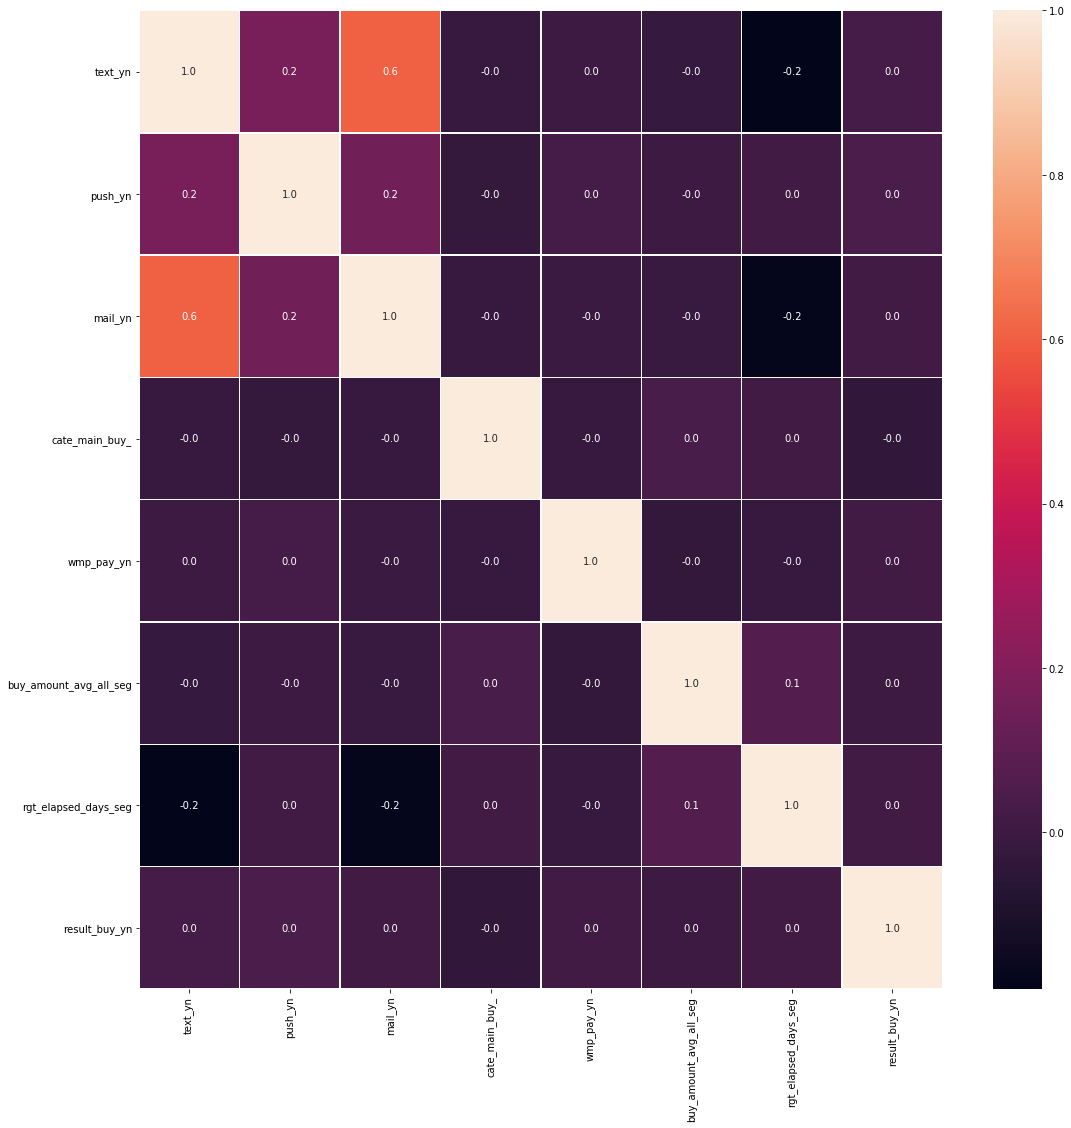

In [164]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap( data[data.cont_group == 1][cate_features + ['result_buy_yn']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

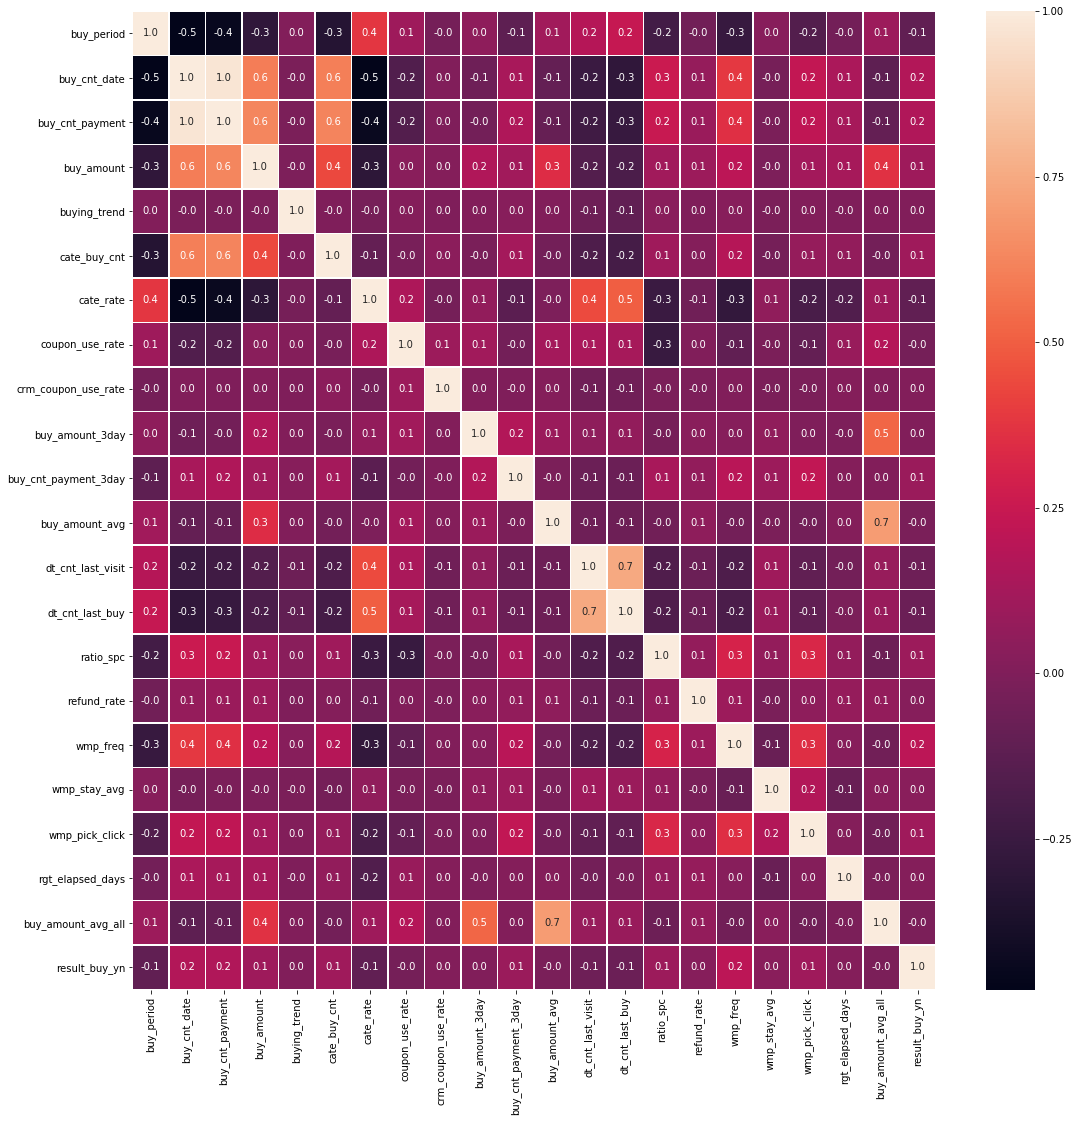

In [42]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap( data[data.cont_group == 1][numerical_features + ['result_buy_yn']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

---

### - 2.2 cont_group == 3 (대조군)

In [43]:
data[data.cont_group == 3][numerical_features].describe()

,buy_period,buy_cnt_date,buy_cnt_payment,buy_amount,buying_trend,cate_buy_cnt,cate_rate,coupon_use_rate,crm_coupon_use_rate,buy_amount_3day,buy_cnt_payment_3day,buy_amount_avg,dt_cnt_last_visit,dt_cnt_last_buy,ratio_spc,refund_rate,wmp_freq,wmp_stay_avg,wmp_pick_click,rgt_elapsed_days,buy_amount_avg_all
count,32115.000000,32115.000000,32115.000000,3.211500e+04,32115.000000,32115.000000,32115.000000,32115.000000,32115.000000,3.211500e+04,32115.000000,3.211500e+04,32115.000000,32115.000000,32115.000000,32115.000000,32115.000000,32115.000000,32115.000000,32115.000000,3.211500e+04
mean,33.421380,21.170792,26.872957,1.046281e+06,0.005203,4.096777,37.713903,53.332586,0.607971,6.187510e+04,1.328164,4.674900e+04,35.362759,68.278343,0.394601,9.550553,17.387514,6.118045,1.903472,1930.172100,6.113993e+04
std,41.746834,19.241367,26.895886,1.298260e+06,32.602733,4.147830,25.123966,25.539825,2.781492,1.371458e+05,0.701258,7.866702e+04,126.015482,185.395004,0.327917,11.797138,18.821840,5.857054,3.562941,833.208283,1.019615e+05
min,1.000000,1.000000,1.000000,2.900000e+02,-349.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000,0.000000e+00,-1.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.900000e+02
25%,10.330882,6.000000,7.000000,2.644065e+05,-1.000000,2.000000,20.000000,36.000000,0.000000,1.590000e+04,1.000000,2.164300e+04,2.000000,6.000000,0.000000,0.000000,5.000000,3.000000,0.000000,1408.000000,2.797427e+04
50%,19.000000,15.000000,19.000000,6.790160e+05,0.000000,3.000000,30.000000,52.000000,0.000000,3.090000e+04,1.000000,3.159100e+04,3.000000,12.000000,0.400000,6.000000,11.000000,5.000000,0.000000,2082.000000,4.037944e+04
75%,38.000000,31.000000,39.000000,1.403584e+06,1.000000,5.000000,50.000000,70.000000,0.000000,6.180000e+04,1.000000,4.714700e+04,11.000000,43.000000,0.700000,14.000000,23.000000,8.000000,2.000000,2509.000000,6.142361e+04
max,362.000000,222.000000,550.000000,5.714770e+07,350.000000,158.000000,100.000000,100.000000,100.000000,4.698000e+06,9.000000,5.193982e+06,1287.000000,3320.000000,1.000000,133.000000,301.000000,110.000000,64.000000,3332.000000,7.143462e+06


In [167]:
# 실험군과의 경향이 일치한다! ! !
data[data.cont_group == 3][numerical_features + ['result_buy_yn']].corr().iloc[[-1]].T.sort_values(by='result_buy_yn', ascending=False)

,result_buy_yn
result_buy_yn,1.000000
wmp_freq,0.216392
buy_cnt_date,0.173498
buy_cnt_payment,0.171175
wmp_pick_click,0.117212
buy_amount,0.113175
cate_buy_cnt,0.109744
buy_cnt_payment_3day,0.098361
ratio_spc,0.093460
wmp_stay_avg,0.030085


In [168]:
tmp_result_2 = data[data.cont_group == 3][numerical_features + ['result_buy_yn']].corr().iloc[[-1]].T.sort_values(by='result_buy_yn', ascending=False)

In [169]:
# 실험군 / 대조군 결과 붙여서 볼게
tmp = pd.concat([tmp_result, tmp_result_2], axis=1, sort=True)
tmp.columns = ['result_buy_yn_cont1', 'result_buy_yn_cont3']

In [170]:
tmp.sort_values(by='result_buy_yn_cont1', ascending=False)

,result_buy_yn_cont1,result_buy_yn_cont3
result_buy_yn,1.000000,1.000000
wmp_freq,0.206474,0.216392
buy_cnt_date,0.169015,0.173498
buy_cnt_payment,0.165771,0.171175
cate_buy_cnt,0.106594,0.109744
wmp_pick_click,0.105774,0.117212
buy_amount,0.102865,0.113175
ratio_spc,0.095535,0.093460
buy_cnt_payment_3day,0.091106,0.098361
wmp_stay_avg,0.033950,0.030085


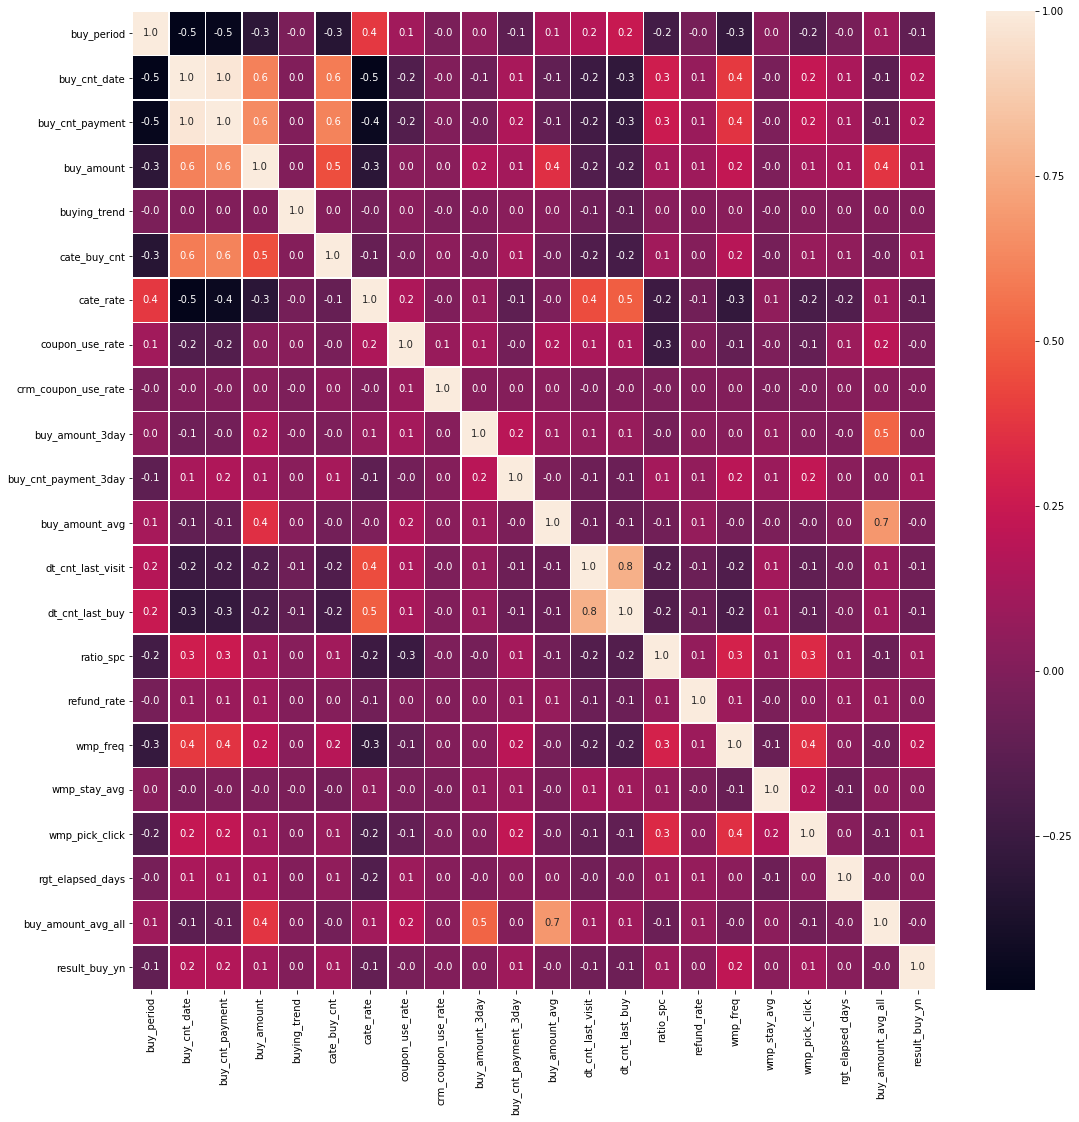

In [44]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap( data[data.cont_group == 3][numerical_features + ['result_buy_yn']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

---
---

## 2.2 cont_group을 통한, 변수들의 분포차이(histogram)

In [45]:
numerical_features

['buy_period',
 'buy_cnt_date',
 'buy_cnt_payment',
 'buy_amount',
 'buying_trend',
 'cate_buy_cnt',
 'cate_rate',
 'coupon_use_rate',
 'crm_coupon_use_rate',
 'buy_amount_3day',
 'buy_cnt_payment_3day',
 'buy_amount_avg',
 'dt_cnt_last_visit',
 'dt_cnt_last_buy',
 'ratio_spc',
 'refund_rate',
 'wmp_freq',
 'wmp_stay_avg',
 'wmp_pick_click',
 'rgt_elapsed_days',
 'buy_amount_avg_all']

In [24]:
len(numerical_features) #

21

---

---

# row로는 다를 수 있는데, col축으로 다른것을 주목해야겠다
- 예를들어, 같은 실험군(cont_group == 1)이더라도 '구매를 한 사람들의 variable 분포'와, '구매를 하지 않은 사람들의 variable 분포'는 다를 수 있다.<br/>
  하지만, 동일하게 구매를한 사람들일때 실험군/대조군의 차이로 인해 분포의 양상이 다르다면 주목해야할 것으로 보인다.

### - (***)'buy_period'

In [46]:
numerical_features[0]

'buy_period'

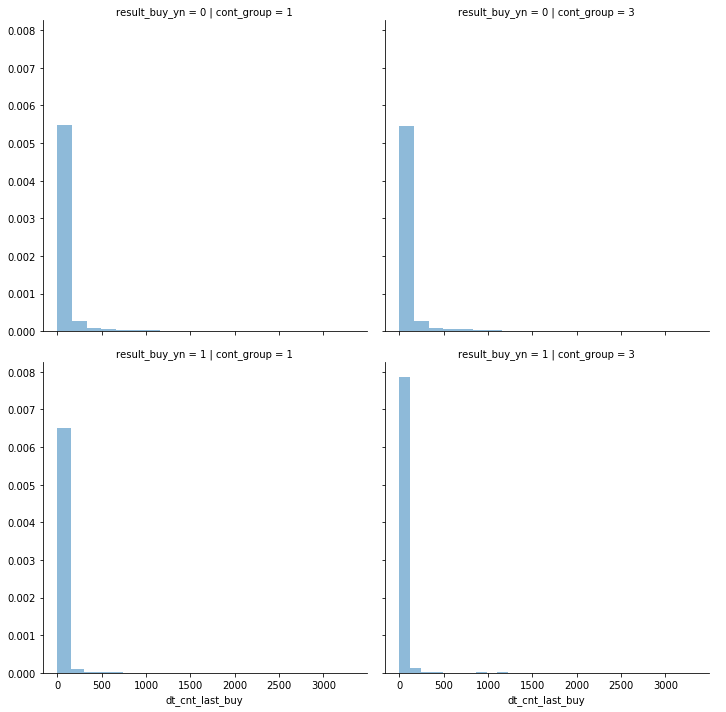

In [27]:
grid = sns.FacetGrid(data, row='result_buy_yn',col='cont_group', height=5)
grid.map( plt.hist, numerical_features[0], alpha=.5, bins=20, density=True)
grid.add_legend()

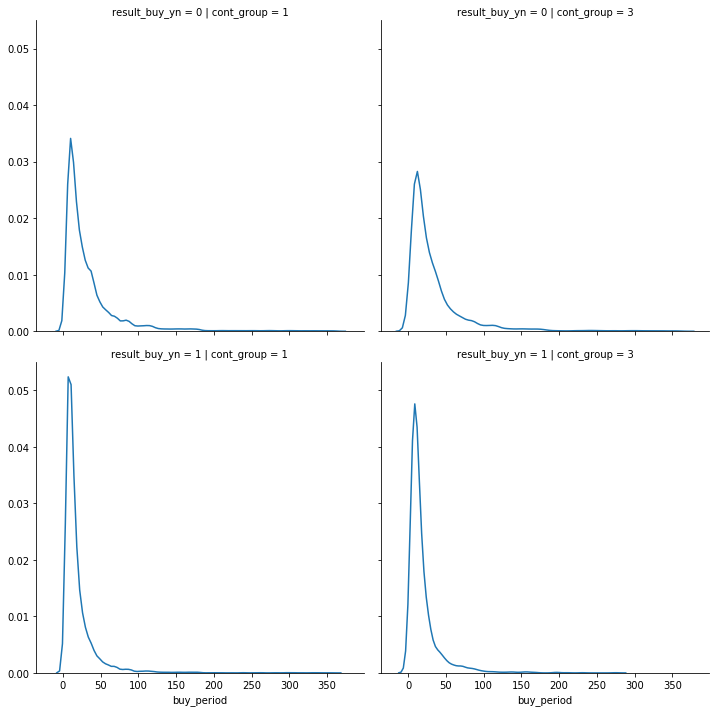

In [176]:
# 이렇게 sns.distplot  이용해도 된다
grid = sns.FacetGrid(data, row='result_buy_yn',col='cont_group', height=5)
grid.map( sns.distplot, numerical_features[0],  bins=20, hist=False, kde=True , norm_hist=True)
grid.add_legend()

plt.show()
plt.close()

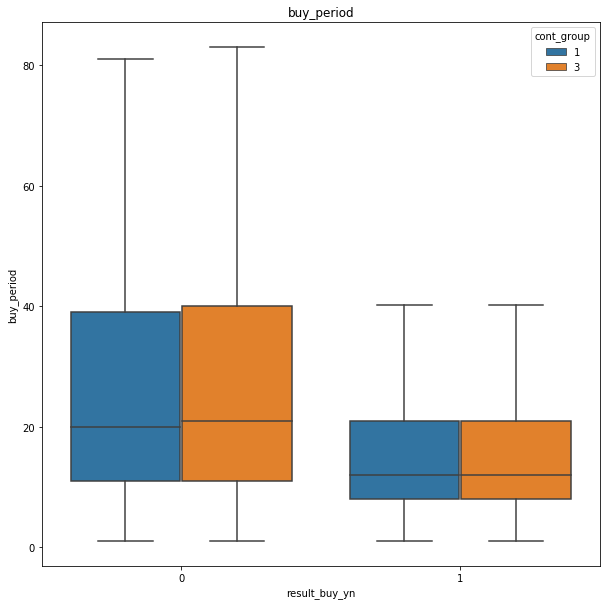

In [178]:
# fliers 제거하고 
plt.figure(figsize=(10,10))
sns.boxplot(x="result_buy_yn", y=numerical_features[0], hue="cont_group", data=data, showfliers = False)
plt.title( numerical_features[0] )
plt.show()
plt.close()

<Figure size 720x720 with 0 Axes>

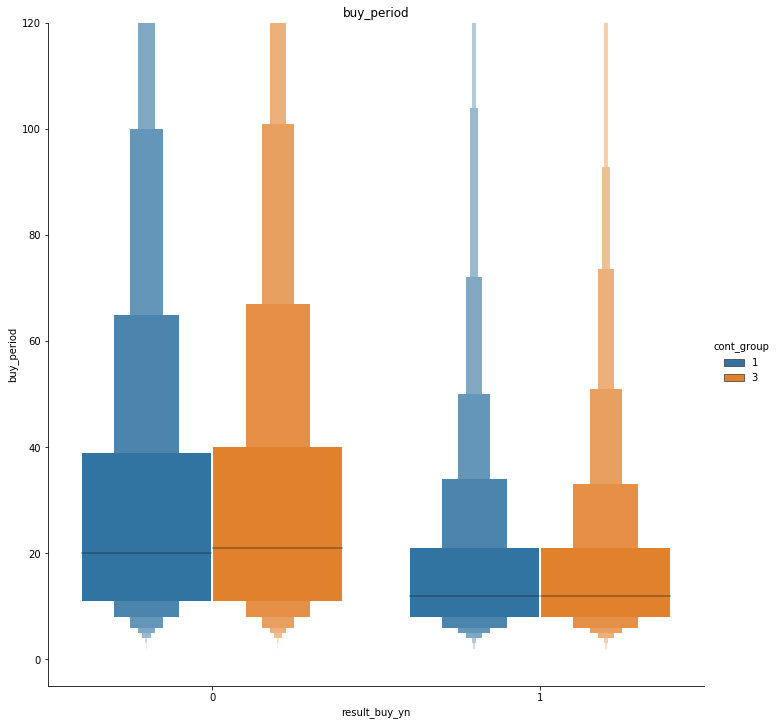

In [180]:
# Boxen plot
plt.figure(figsize=(10,10))
sns.catplot(x="result_buy_yn", y=numerical_features[0], hue="cont_group", data=data, kind='boxen', height=10 )
plt.title( numerical_features[0] )

plt.ylim( -5, 120)
plt.show()
plt.close()

### : 확실히 구매한쪽의 구매주기가 짧다. But 실험/통제군 사이의 차이까진 확인할 수 없다

---

### - (***)'buy_cnt_date'

In [47]:
numerical_features[1]

'buy_cnt_date'

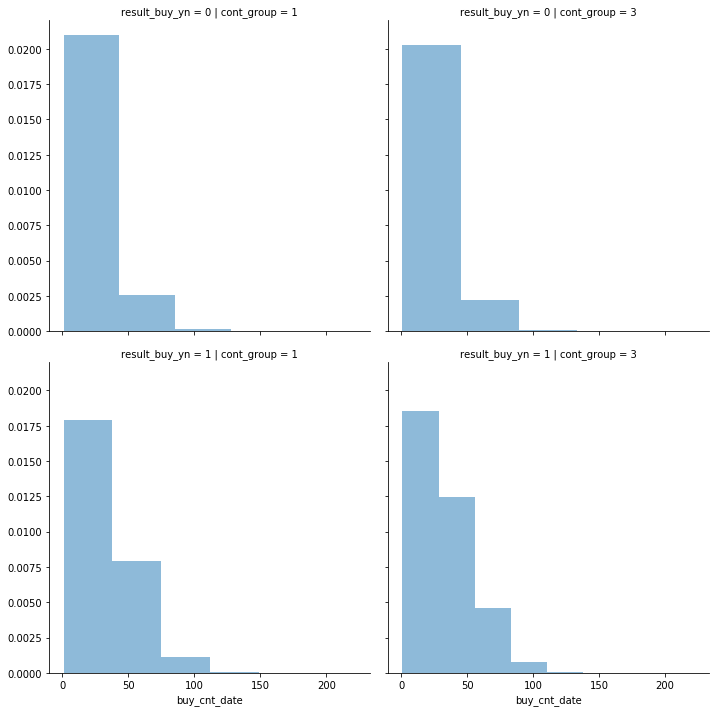

In [48]:
grid = sns.FacetGrid(data, row='result_buy_yn',col='cont_group', height=5)
grid.map( plt.hist, numerical_features[1], alpha=.5, bins=5, density=True)
grid.add_legend()

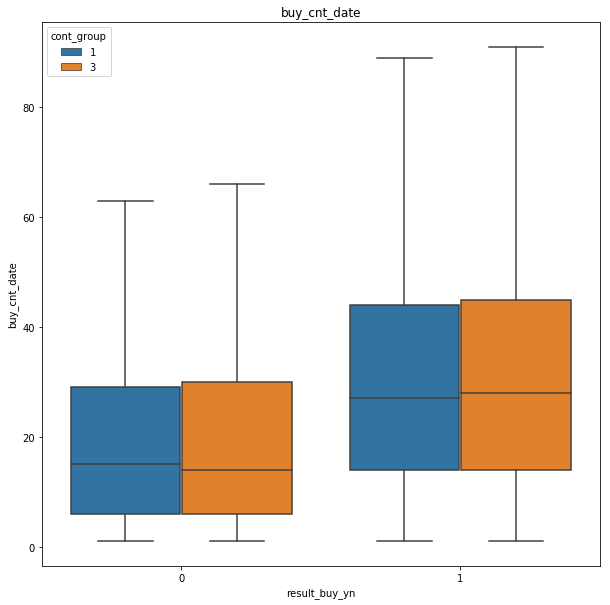

In [50]:
# fliers 제거하고 
plt.figure(figsize=(10,10))
sns.boxplot(x="result_buy_yn", y=numerical_features[1], hue="cont_group", data=data, showfliers = False)
plt.title( numerical_features[1] )
plt.show()
plt.close()

<Figure size 720x720 with 0 Axes>

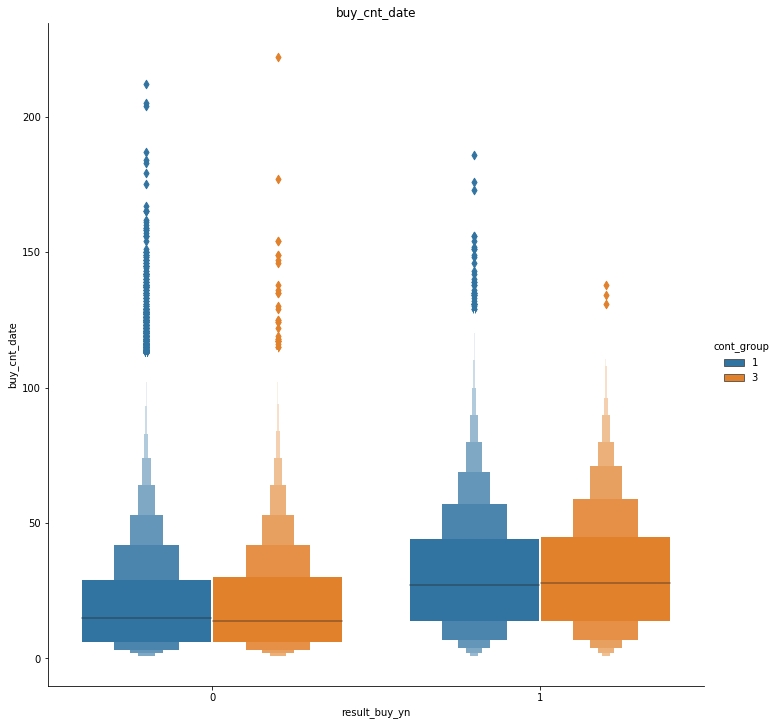

In [51]:
# Boxen plot
plt.figure(figsize=(10,10))
sns.catplot(x="result_buy_yn", y=numerical_features[1], hue="cont_group", data=data, kind='boxen', height=10 )
plt.title( numerical_features[1] )

#plt.ylim( -10, 200)
plt.show()
plt.close()

### : 확실히 구매한쪽의 '결제일 count'가 많다! But 실험/통제군의 차이까진 확인할 수 없다.

---

### - (***)'buy_cnt_payment'

In [53]:
numerical_features[2]

'buy_cnt_payment'

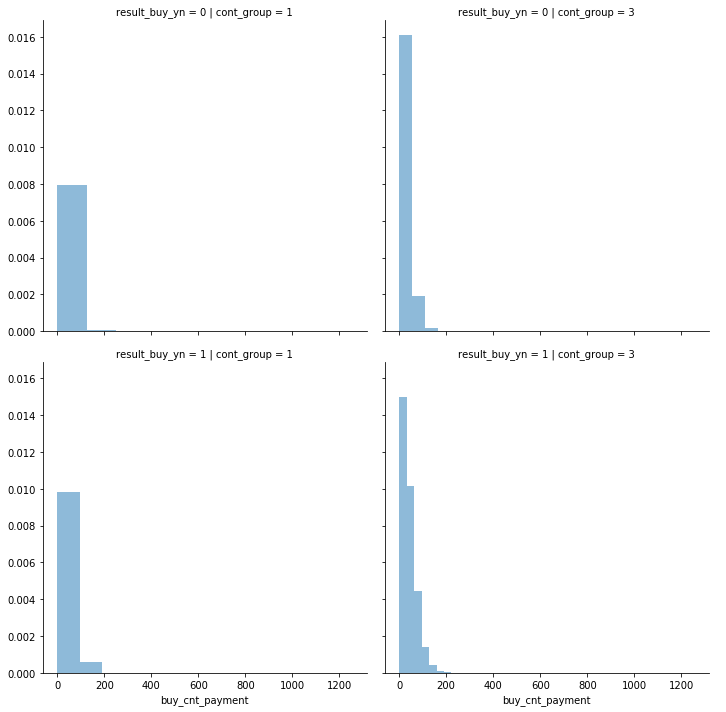

In [54]:
grid = sns.FacetGrid(data, row='result_buy_yn',col='cont_group', height=5)
grid.map( plt.hist, numerical_features[2], alpha=.5, bins=10, density=True)
grid.add_legend()

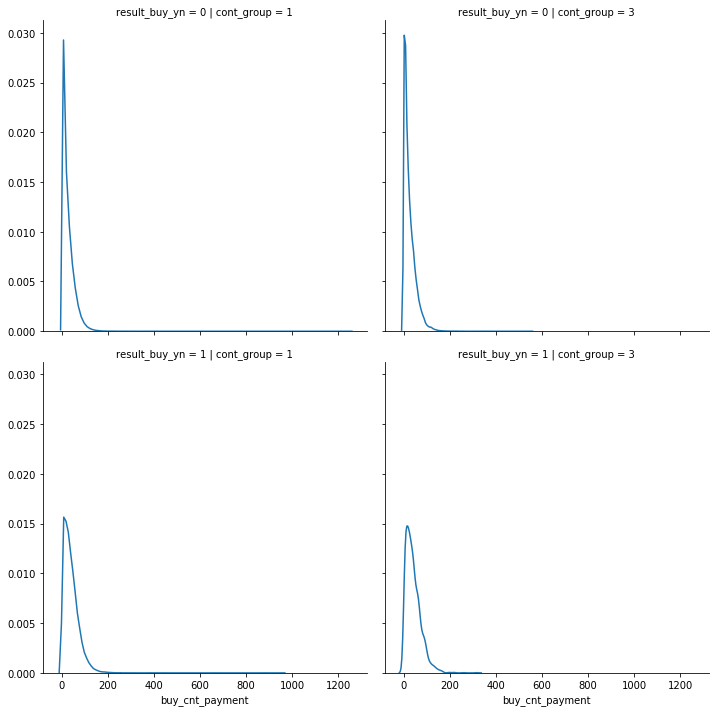

In [56]:
# 이렇게 sns.distplot  이용해도 된다
grid = sns.FacetGrid(data, row='result_buy_yn',col='cont_group', height=5)
grid.map( sns.distplot, numerical_features[2],  hist=False, kde=True , norm_hist=True)
grid.add_legend()

plt.show()
plt.close()

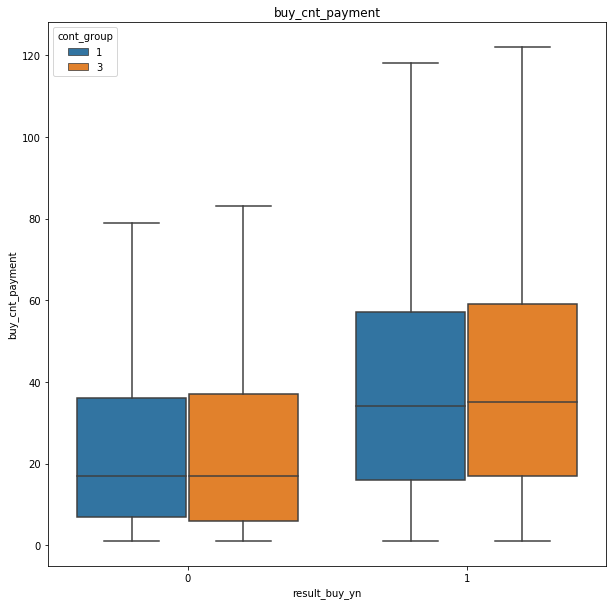

In [57]:
# fliers 제거하고 
plt.figure(figsize=(10,10))
sns.boxplot(x="result_buy_yn", y=numerical_features[2], hue="cont_group", data=data, showfliers = False)
plt.title( numerical_features[2] )
plt.show()
plt.close()

<Figure size 720x720 with 0 Axes>

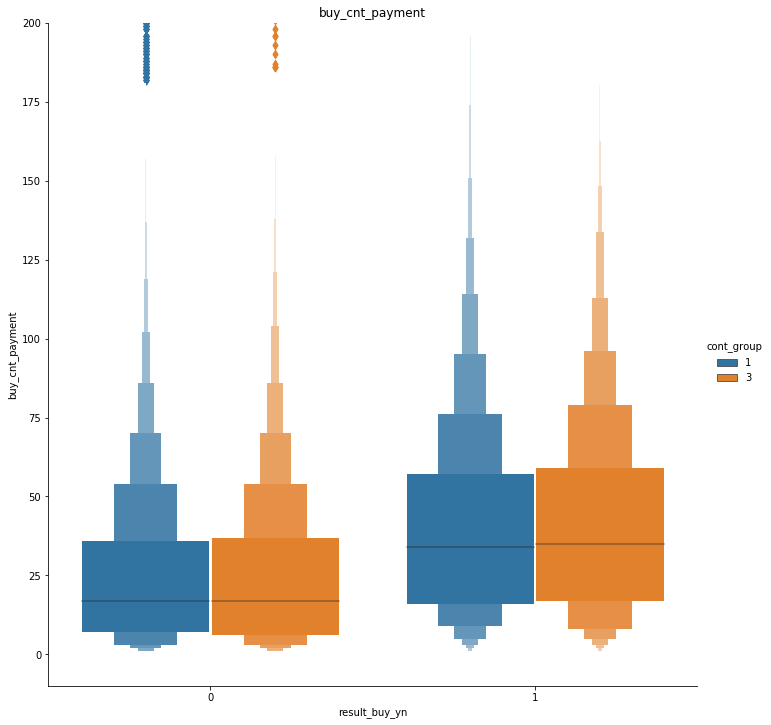

In [59]:
# Boxen plot
plt.figure(figsize=(10,10))
sns.catplot(x="result_buy_yn", y=numerical_features[2], hue="cont_group", data=data, kind='boxen', height=10 )
plt.title( numerical_features[2] )

plt.ylim( -10, 200)
plt.show()
plt.close()

### : 확실히 구매한쪽의 '결제횟수' 많다. But 실험군/대조군의 차이까진 확인할 수 없다.

---

### - (***)'buy_amount'

In [60]:
numerical_features[3]

'buy_amount'

In [61]:
data.groupby(['result_buy_yn','cont_group'])[[numerical_features[3]]].mean()

buy_amount
result_buy_yn cont_group              
0             1           1.009192e+06
              3           1.000042e+06
1             1           1.480044e+06
              3           1.513160e+06

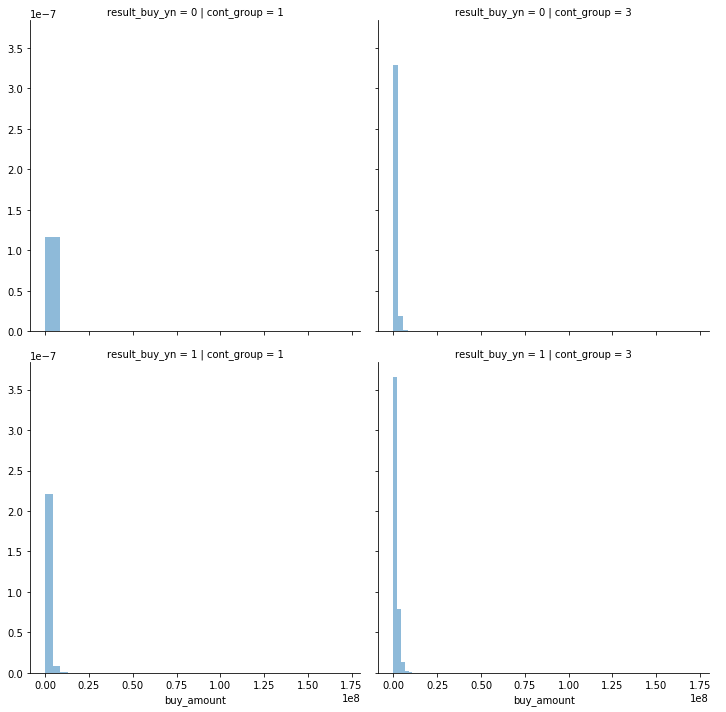

In [64]:
grid = sns.FacetGrid(data , row='result_buy_yn',col='cont_group', height=5)
grid.map( plt.hist, numerical_features[3], alpha=.5, bins=20, density=True)
grid.add_legend()

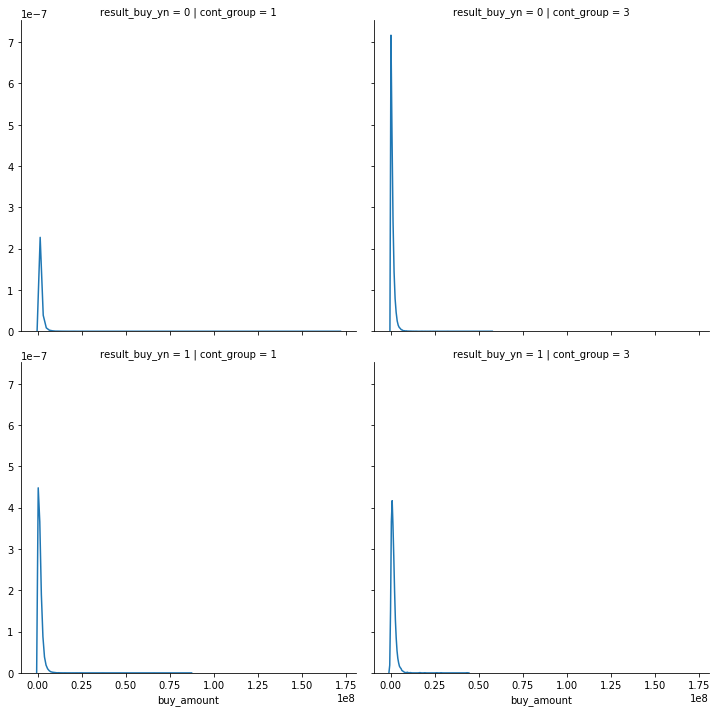

In [66]:
# 이렇게 sns.distplot  이용해도 된다
grid = sns.FacetGrid(data , row='result_buy_yn',col='cont_group', height=5)
grid.map( sns.distplot, numerical_features[3],  hist=False, kde=True , norm_hist=True)
grid.add_legend()

plt.show()
plt.close()

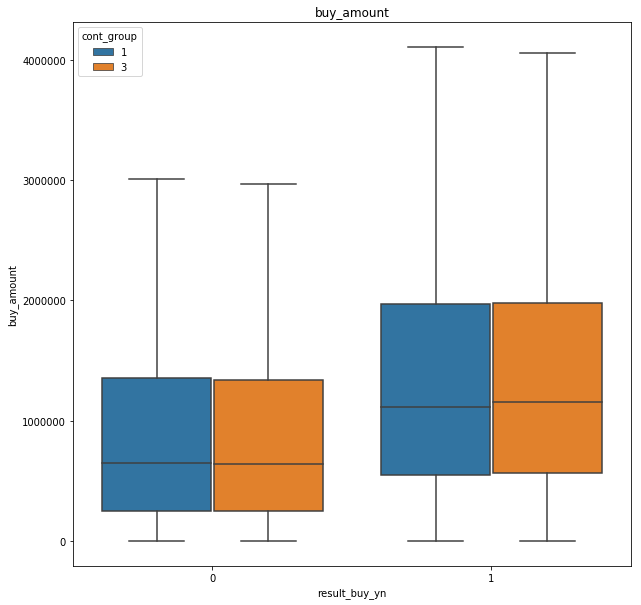

In [67]:
## fliers 제거하고 
plt.figure(figsize=(10,10))
sns.boxplot(x="result_buy_yn", y=numerical_features[3], hue="cont_group", data=data, showfliers = False)
plt.title( numerical_features[3] )
plt.show()
plt.close()

<Figure size 720x720 with 0 Axes>

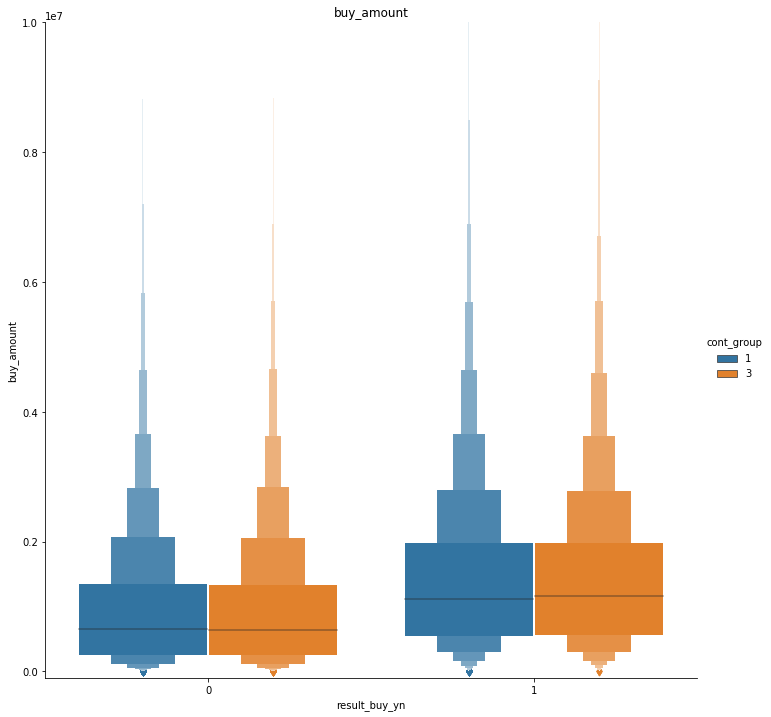

In [73]:
# Boxen plot
plt.figure(figsize=(10,10))
sns.catplot(x="result_buy_yn", y=numerical_features[3], hue="cont_group", data=data, kind='boxen', height=10 )
plt.title( numerical_features[3] )

plt.ylim( -1e5, 1e7)
plt.show()
plt.close()

### : 구매한쪽의 구매금액이 높다! But, 실험군/대조군의 차이까지는 확인할 수 없다.

---

### - (애매하다)'buying_trend'
- 최근 3번의 구매애 대해서만 'buying_trend'를 추가적으로 구하는 식의 조치가 필요할것으로 생각된다
> 형평성에 어긋난다? - 같은 trend를 갖더라도 최근 구매가 딱 3번 있었던 멤버와, 구매가 다수였던 유저의 해석 차이가 존재한다

In [75]:
numerical_features[4]

'buying_trend'

In [112]:
data[(data.result_buy_yn == 0) & (data.cont_group == 1)][numerical_features[4]].describe()

count    350704.000000
mean          0.457528
std          34.300523
min        -362.000000
25%          -1.000000
50%           0.000000
75%           1.000000
max         362.000000
Name: buying_trend, dtype: float64

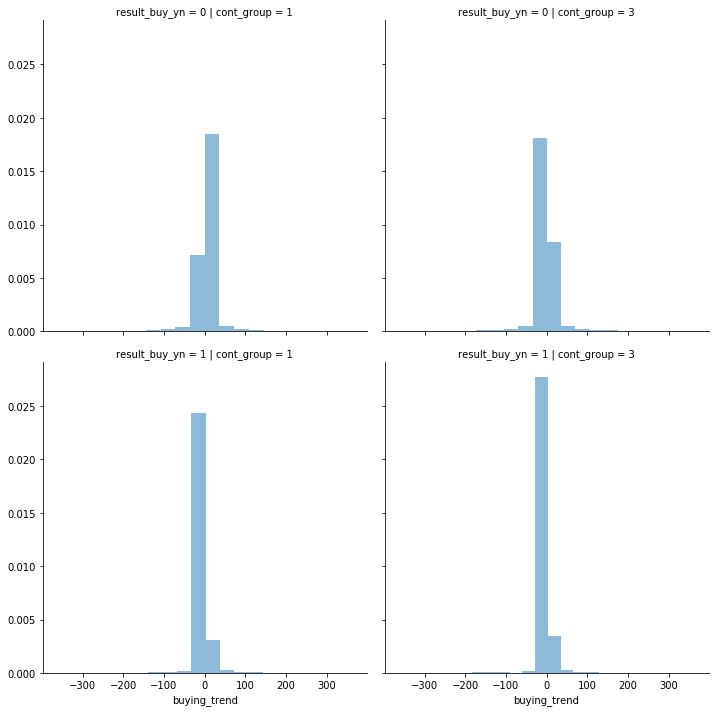

In [76]:
grid = sns.FacetGrid(data, row='result_buy_yn',col='cont_group', height=5)
grid.map( plt.hist, numerical_features[4], alpha=.5, bins=20, density=True)
grid.add_legend()

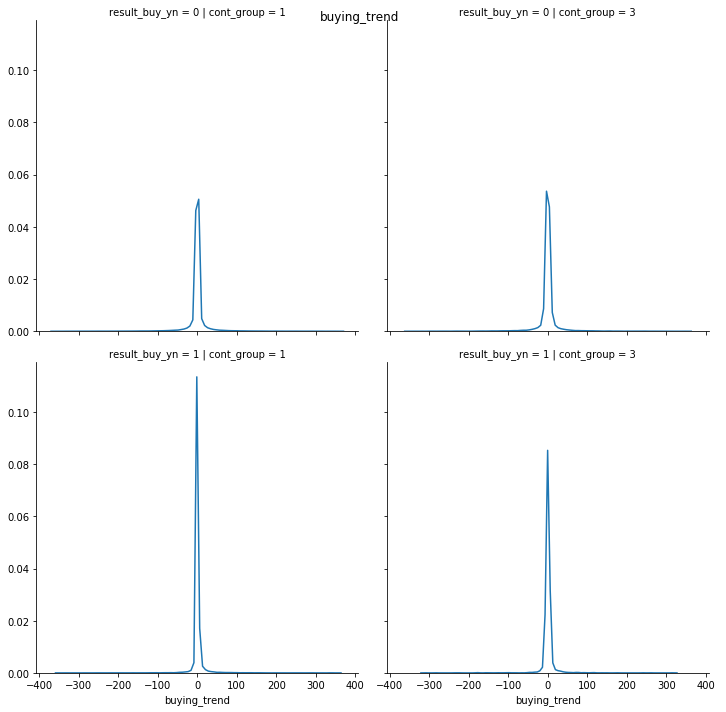

In [82]:
# 이렇게 sns.distplot  이용해도 된다
grid = sns.FacetGrid(data, row='result_buy_yn',col='cont_group', height=5)
grid.map( sns.distplot, numerical_features[4],  hist=False, kde=True , norm_hist=True)
grid.add_legend()

#plt.suptitle( numerical_features[4] )
plt.show()
plt.close()

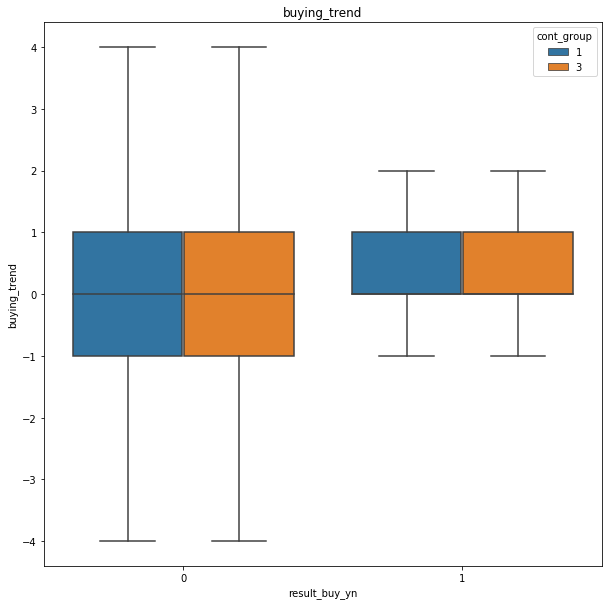

In [80]:
plt.figure(figsize=(10,10))
sns.boxplot(x="result_buy_yn", y=numerical_features[4], hue="cont_group", data=data, showfliers = False)
plt.title( numerical_features[4] )
plt.show()
plt.close()

<Figure size 720x720 with 0 Axes>

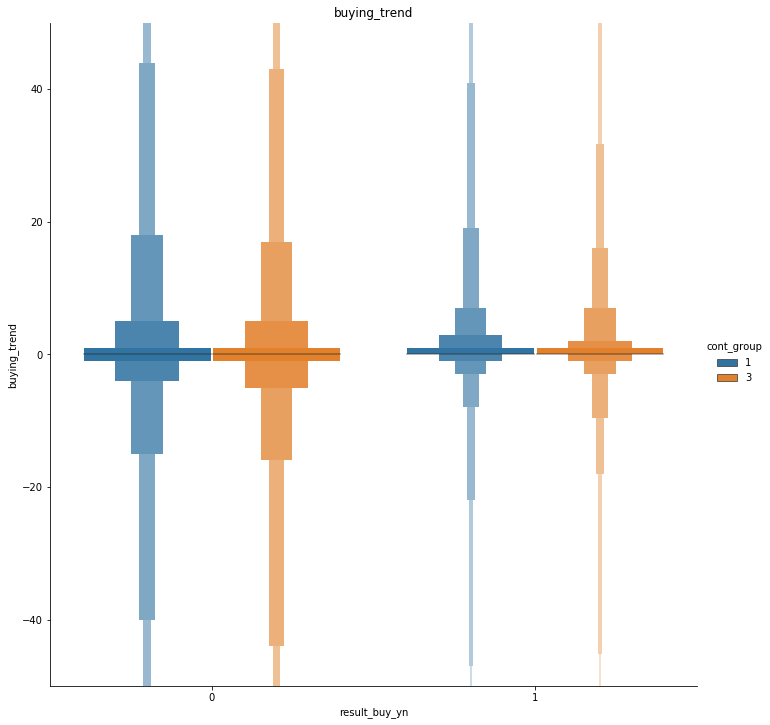

In [85]:
# Boxen plot
plt.figure(figsize=(10,10))
sns.catplot(x="result_buy_yn", y=numerical_features[4], hue="cont_group", data=data, kind='boxen', height=10 )
plt.title( numerical_features[4] )

plt.ylim(-50, 50)
plt.show()
plt.close()

---

### - (***)'cate_buy_cnt' : 주의할점은 count는 유저마다 기준이 다를수 있다는것. (cate_ratio의 성향 같이 살펴보기)
- ***살펴본 결과, cate_buy_cnt 와 cate_rate는 다른 결과를 비친다. 따라서 cate_rate의 해석을 믿어야 하겠고, buy_cnt_date/buy_cnt_payment 가 cate_buy_cnt를 대신해야한다.

In [86]:
numerical_features[5]

'cate_buy_cnt'

In [111]:
data[(data.result_buy_yn == 0) & (data.cont_group == 1)][numerical_features[5]].describe() # 값이 분포해 있긴 하다

count    350704.000000
mean          3.984719
std           3.993221
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max         222.000000
Name: cate_buy_cnt, dtype: float64

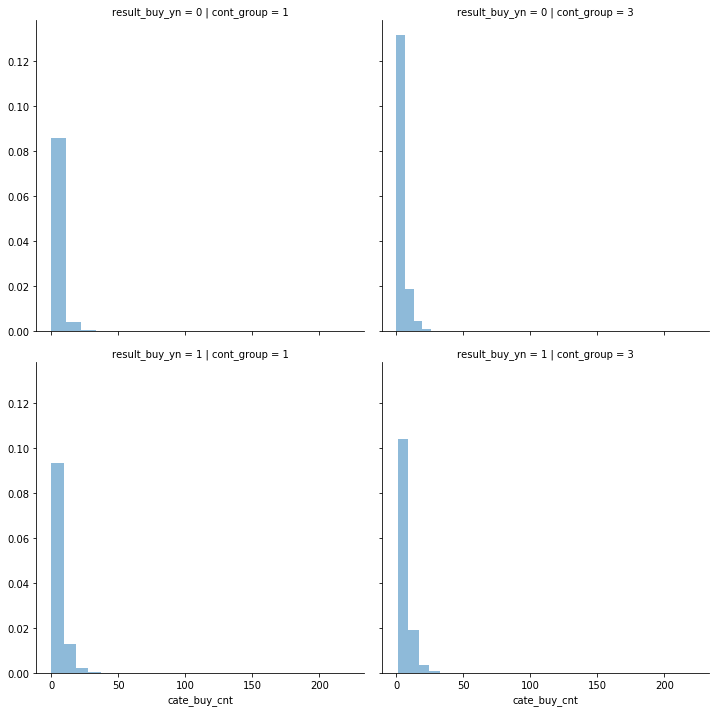

In [87]:
grid = sns.FacetGrid(data, row='result_buy_yn',col='cont_group', height=5)
grid.map( plt.hist, numerical_features[5], alpha=.5, bins=20, density=True)
grid.add_legend()

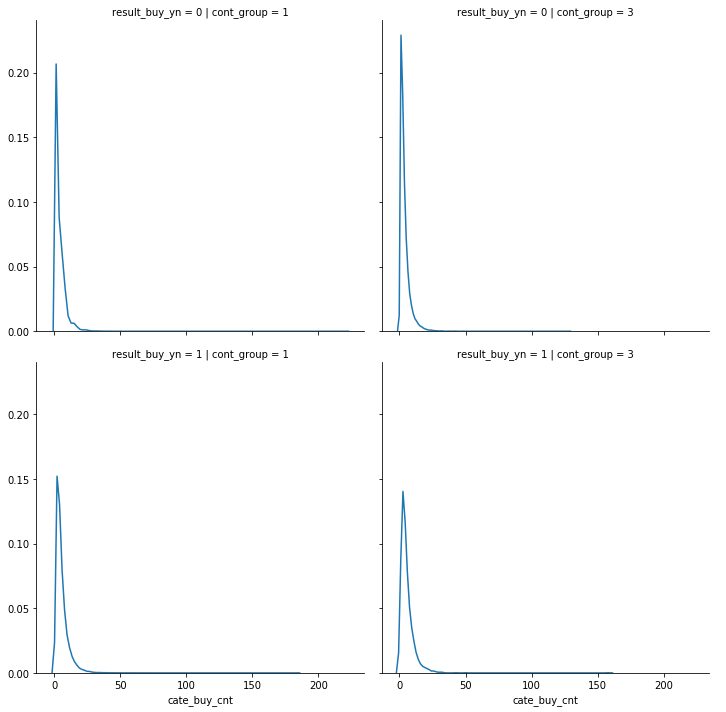

In [88]:
# 이렇게 sns.distplot  이용해도 된다
grid = sns.FacetGrid(data , row='result_buy_yn',col='cont_group', height=5)
grid.map( sns.distplot, numerical_features[5],  hist=False, kde=True , norm_hist=True)
grid.add_legend()

plt.show()
plt.close()

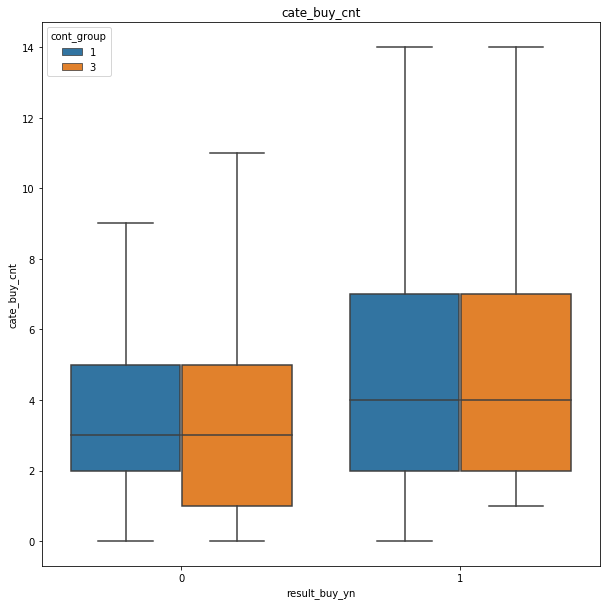

In [89]:
plt.figure(figsize=(10,10))
sns.boxplot(x="result_buy_yn", y=numerical_features[5], hue="cont_group", data=data, showfliers = False)
plt.title( numerical_features[5] )
plt.show()
plt.close()

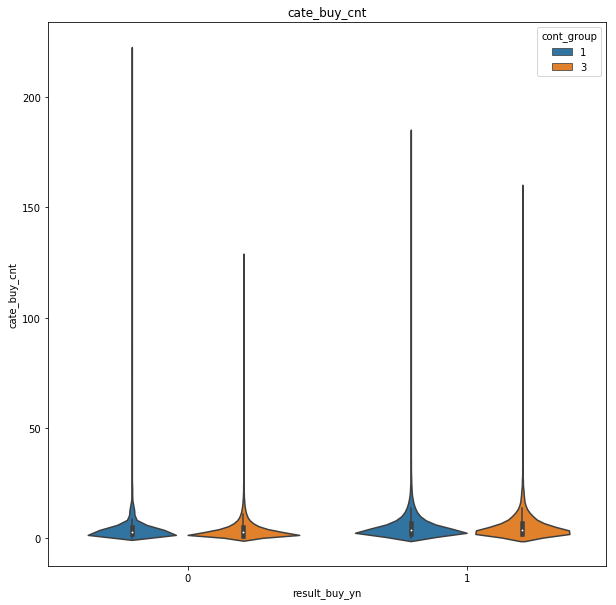

In [90]:
plt.figure(figsize=(10,10))
sns.violinplot(x="result_buy_yn", y=numerical_features[5], hue="cont_group", data=data, showfliers = False)
plt.title( numerical_features[5] )
plt.show()
plt.close()

<Figure size 720x720 with 0 Axes>

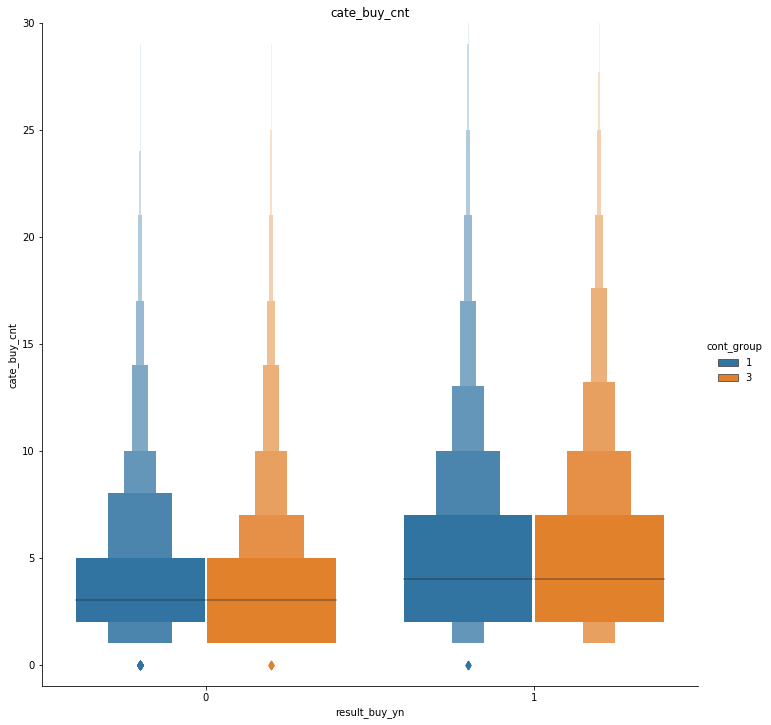

In [93]:
# Boxen plot
plt.figure(figsize=(10,10))
sns.catplot(x="result_buy_yn", y=numerical_features[5], hue="cont_group", data=data, kind='boxen', height=10 )
plt.title( numerical_features[5] )

plt.ylim( -1, 30)
plt.show()
plt.close()

### : 구매한쪽의 '주구매 카테고리 구매횟수' 높다. 하지만 구매 cnt 는 유저별로 기준이 상이할 수 있기에, 아래의 "cate-rate"를 살펴봐야겠다

---

### - (***)'cate_rate'

In [94]:
numerical_features[6]

'cate_rate'

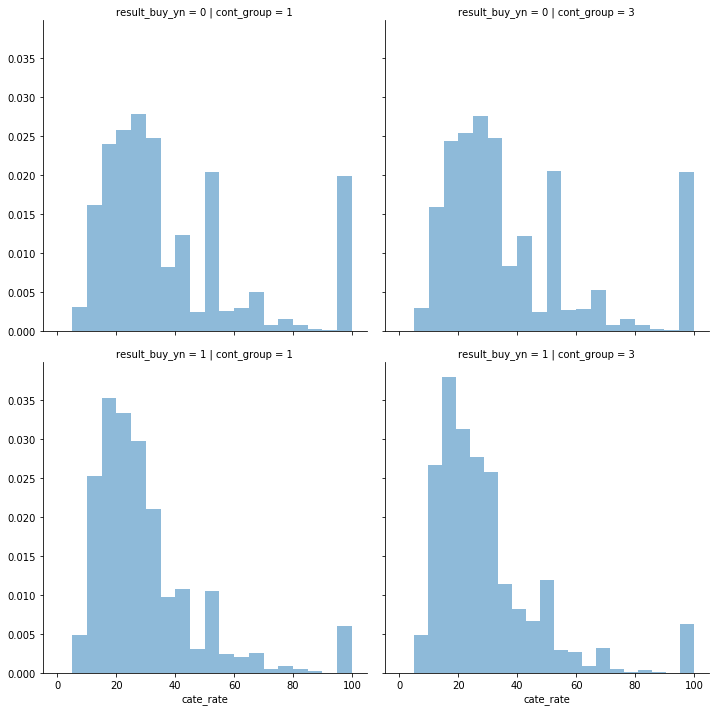

In [95]:
grid = sns.FacetGrid(data, row='result_buy_yn',col='cont_group', height = 5)
grid.map( plt.hist, numerical_features[6], alpha=.5, bins=20, density=True)
grid.add_legend()

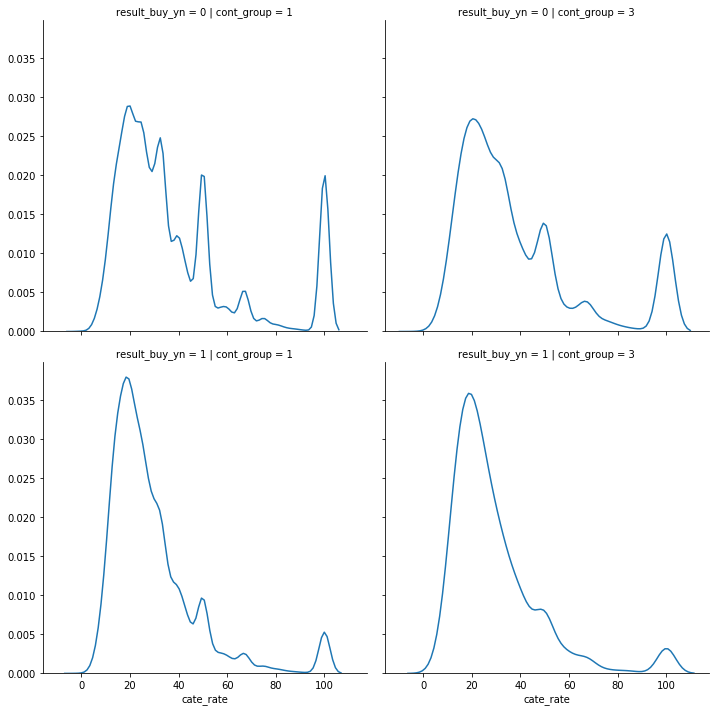

In [96]:
# 이렇게 sns.distplot  이용해도 된다
grid = sns.FacetGrid(data, row='result_buy_yn',col='cont_group', height=5)
grid.map( sns.distplot, numerical_features[6],  hist=False, kde=True , norm_hist=True)
grid.add_legend()

plt.show()
plt.close()

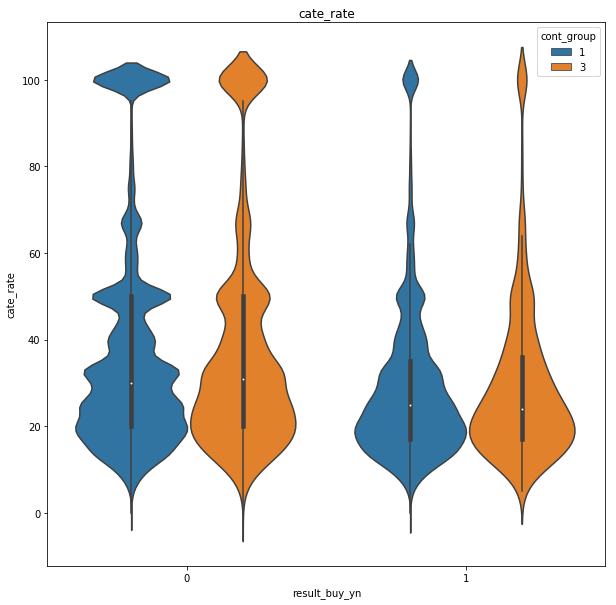

In [97]:
plt.figure(figsize=(10,10))
sns.violinplot(x="result_buy_yn", y=numerical_features[6], hue="cont_group", data=data)
plt.title( numerical_features[6] )
plt.show()
plt.close()

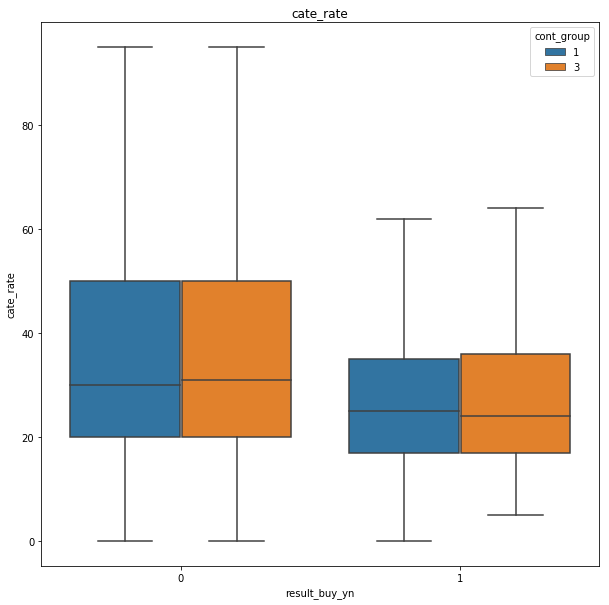

In [98]:
# fliers 제거하고 
plt.figure(figsize=(10,10))
sns.boxplot(x="result_buy_yn", y=numerical_features[6], hue="cont_group", data=data, showfliers = False)
plt.title( numerical_features[6] )
plt.show()
plt.close()

<Figure size 720x720 with 0 Axes>

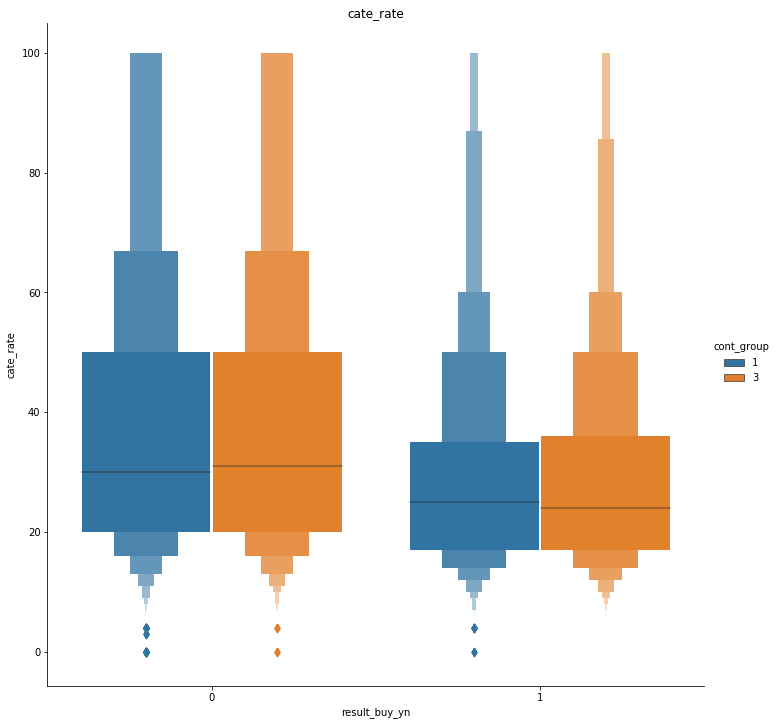

In [99]:
# Boxen plot
plt.figure(figsize=(10,10))
sns.catplot(x="result_buy_yn", y=numerical_features[6], hue="cont_group", data=data, kind='boxen', height=10 )
plt.title( numerical_features[6] )

#plt.ylim(-0.5, 20)
plt.show()
plt.close()

: 구매가 이루어진쪽의 '주구매 카테고리 구매비율' 이 조금 낮다. 실험군/통제군의 차이는 확인할수 없다.

---

### - (*)'coupon_use_rate' : 다시 살펴보자

In [100]:
numerical_features[7]

'coupon_use_rate'

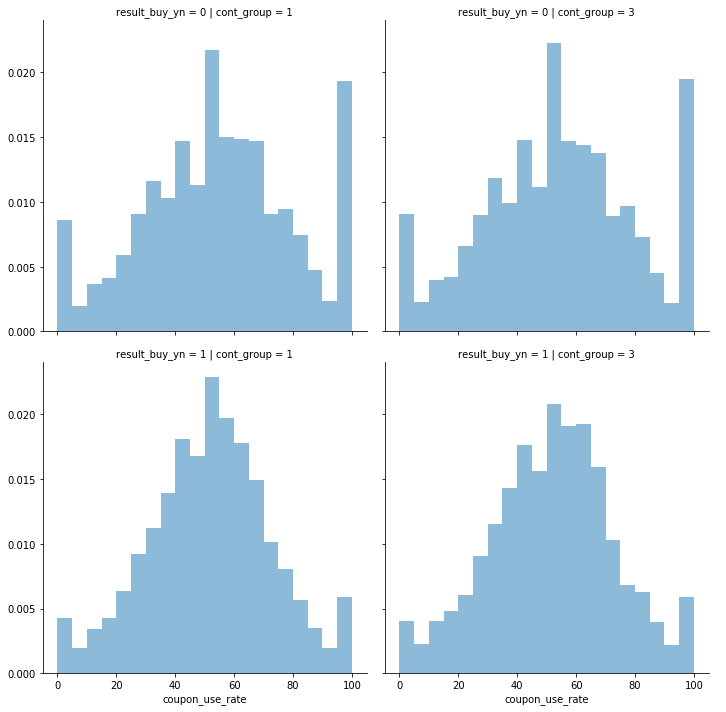

In [101]:
grid = sns.FacetGrid(data, row='result_buy_yn',col='cont_group', height=5)
grid.map( plt.hist, numerical_features[7], alpha=.5, bins=20, density=True)
grid.add_legend()

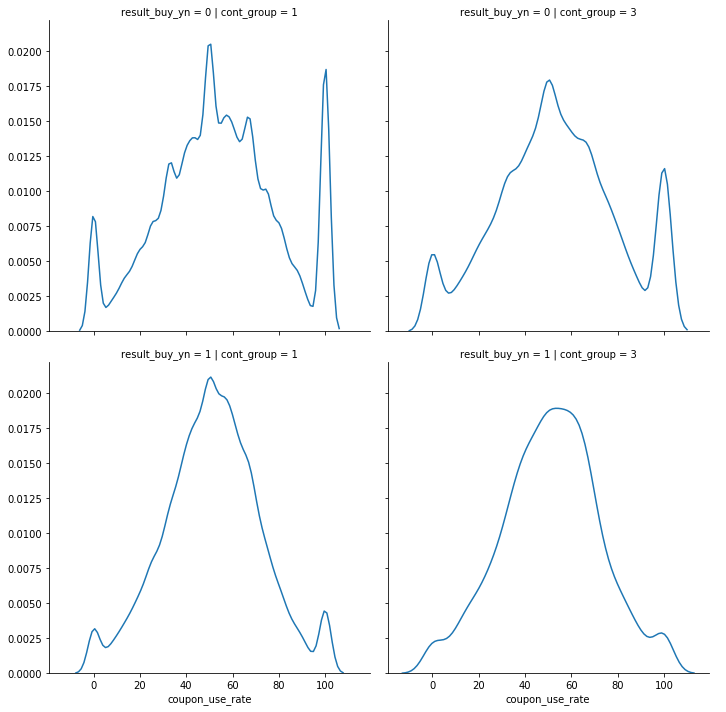

In [102]:
# 이렇게 sns.distplot  이용해도 된다
grid = sns.FacetGrid(data , row='result_buy_yn',col='cont_group', height=5)
grid.map( sns.distplot, numerical_features[7],  hist=False, kde=True , norm_hist=True)
grid.add_legend()

plt.show()
plt.close()

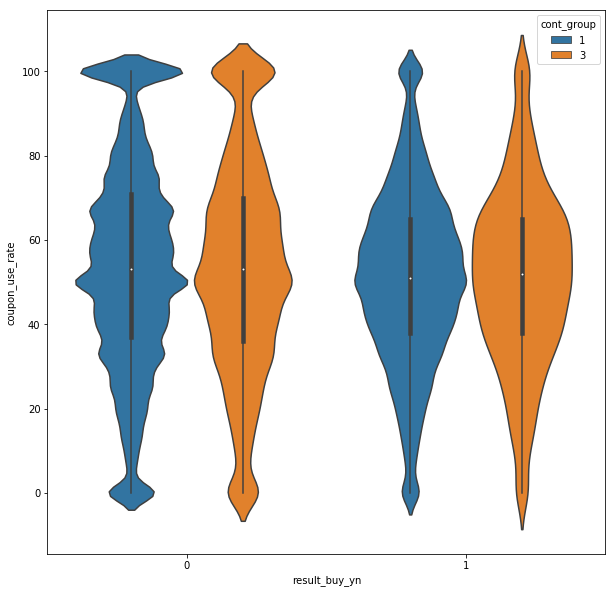

In [103]:
plt.figure(figsize=(10,10))
sns.violinplot(x="result_buy_yn", y=numerical_features[7], hue="cont_group", data=data, size=10)
#plt.title("요일 별, 성별 전체 팁의 Violin Plot")
plt.show()
plt.close()

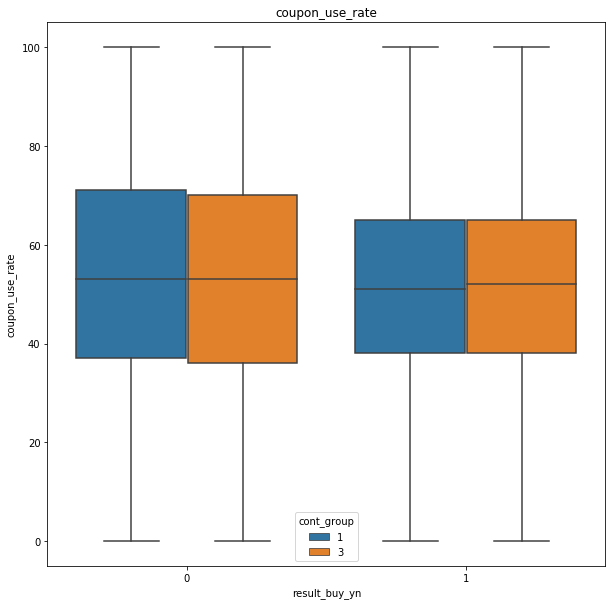

In [104]:
# fliers 제거하고 
plt.figure(figsize=(10,10))
sns.boxplot(x="result_buy_yn", y=numerical_features[7], hue="cont_group", data=data, showfliers = False)
plt.title( numerical_features[7] )
plt.show()
plt.close()

<Figure size 720x720 with 0 Axes>

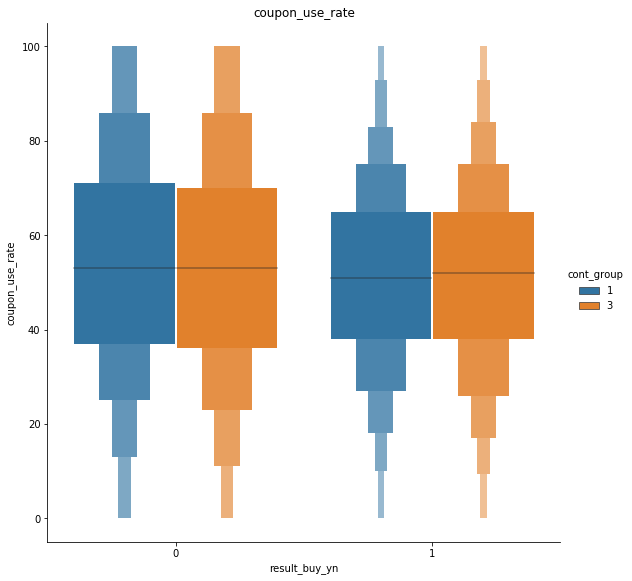

In [105]:
# fliers 제거하고 
plt.figure(figsize=(10,10))
sns.catplot(x="result_buy_yn", y=numerical_features[7], hue="cont_group", data=data, kind='boxen', height=8 )
plt.title( numerical_features[7] )

#plt.ylim(-0.5, 20)
plt.show()
plt.close()

### : 쿠폰 사용율 차이 거의 없어보인다.

---
---

### - (***) 'crm_coupon_use_rate' : 차이가 있어보이지만, 1.25% <-> 0.6%의 차이는 sample 규모로 나올 수 있는 차이 같아
- 한계 : 0이 너무 많다

In [106]:
numerical_features[8]

'crm_coupon_use_rate'

In [123]:
data.groupby([ 'cont_group'])[[numerical_features[8]]].mean() # crm 쿠폰사용율 자체가 너무 희박해서, 2배의 차이라 하더라도 차이가 있다고 말하기 힘든정도야

,crm_coupon_use_rate
cont_group,
1,1.255503
3,0.607971


In [124]:
data.groupby([ 'cont_group'])['coupon_use_rate'].mean() # 일반 쿠폰 사용률

cont_group
1    53.772227
3    53.332586
Name: coupon_use_rate, dtype: float64

---

In [107]:
data.groupby(['result_buy_yn', 'cont_group'])[[numerical_features[8]]].mean()

crm_coupon_use_rate
result_buy_yn cont_group                     
0             1                      1.246079
              3                      0.607987
1             1                      1.345474
              3                      0.607809

---

- 구매한 경우

In [119]:
data[(data.result_buy_yn == 1) & (data.cont_group == 1)][numerical_features[8]].describe() # 대부분이 0이다 - 분포보기 어렵다

count    36735.000000
mean         1.345474
std          2.938956
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         50.000000
Name: crm_coupon_use_rate, dtype: float64

In [120]:
data[(data.result_buy_yn == 1) & (data.cont_group == 3)][numerical_features[8]].describe() # 대부분이 0이다

count    2894.000000
mean        0.607809
std         1.941760
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        33.000000
Name: crm_coupon_use_rate, dtype: float64

---

- 구매 안한경우 cont/treat 차이 없어보인다?

In [121]:
data[(data.result_buy_yn == 0) & (data.cont_group == 1)][numerical_features[8]].describe()

count    350704.000000
mean          1.246079
std           3.760750
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         100.000000
Name: crm_coupon_use_rate, dtype: float64

In [122]:
data[(data.result_buy_yn == 0) & (data.cont_group == 3)][numerical_features[8]].describe()

count    29221.000000
mean         0.607987
std          2.851255
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        100.000000
Name: crm_coupon_use_rate, dtype: float64

---

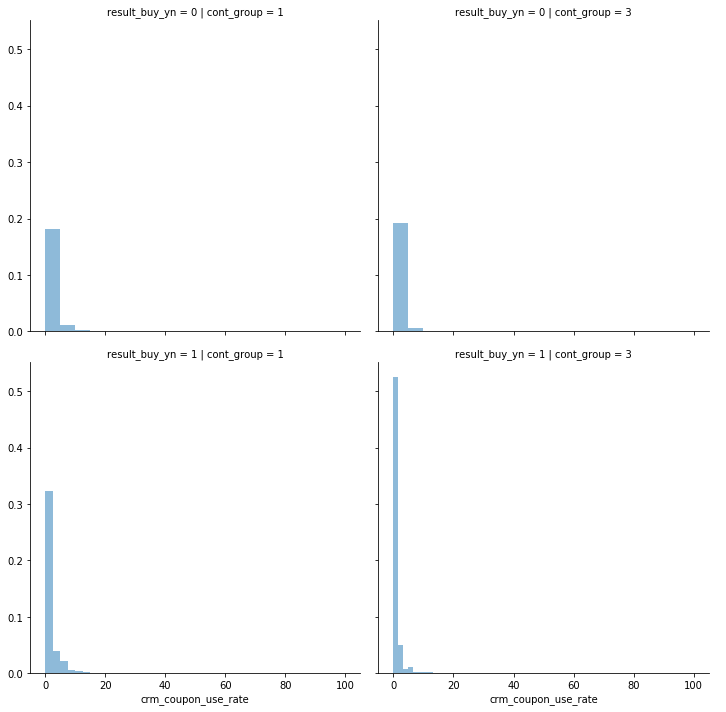

In [110]:
row_order = [0,1]
col_order = [1,3]

grid = sns.FacetGrid(data, row='result_buy_yn',col='cont_group', height=5, row_order = row_order, col_order = col_order)
grid.map( plt.hist, numerical_features[8], alpha=.5, bins=20, density=True)
grid.add_legend()

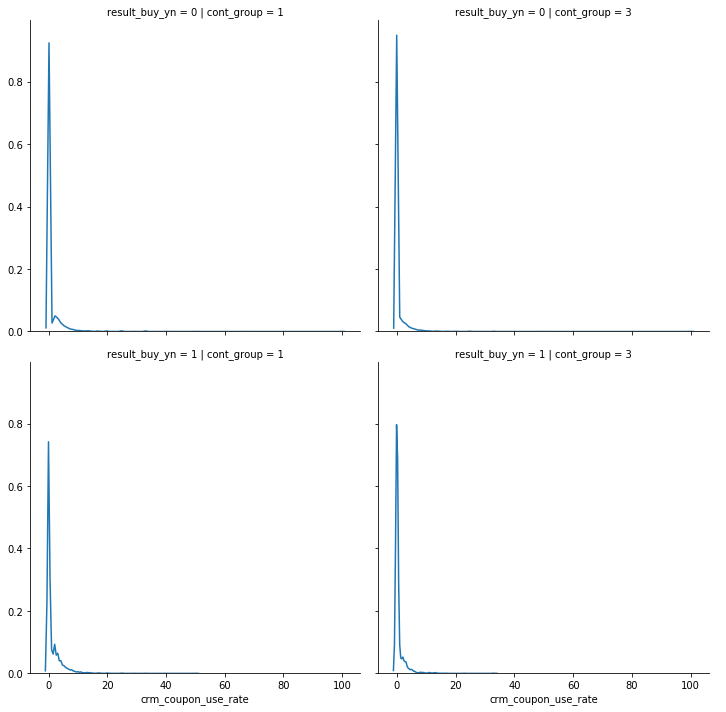

In [113]:
# 이게 오히려 더 헷갈리게 하는것 같은데???
row_order = [0,1]
col_order = [1,3]

grid = sns.FacetGrid(data, row='result_buy_yn',col='cont_group', height=5, row_order = row_order, col_order = col_order)
grid.map( sns.distplot, numerical_features[8],  hist=False, kde=True , norm_hist=True)
grid.add_legend()

plt.show()
plt.close()

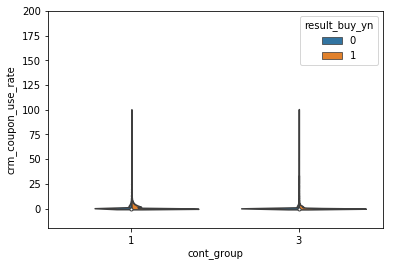

In [114]:
sns.violinplot("cont_group", numerical_features[8], hue="result_buy_yn", data=data ,split=True)
plt.ylim(-20,200)
plt.show()
plt.close()

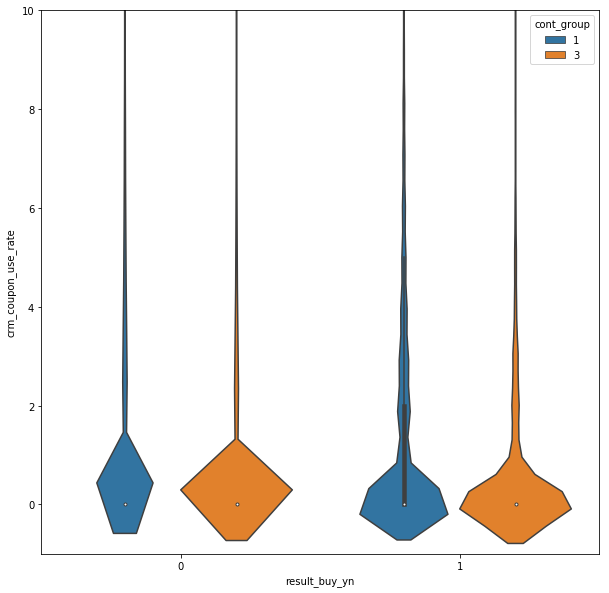

In [116]:
plt.figure(figsize=(10,10))
sns.violinplot(x="result_buy_yn", y=numerical_features[8], hue="cont_group", data=data, size=10)
#plt.title("요일 별, 성별 전체 팁의 Violin Plot")
plt.ylim(-1,10)
plt.show()
plt.close()

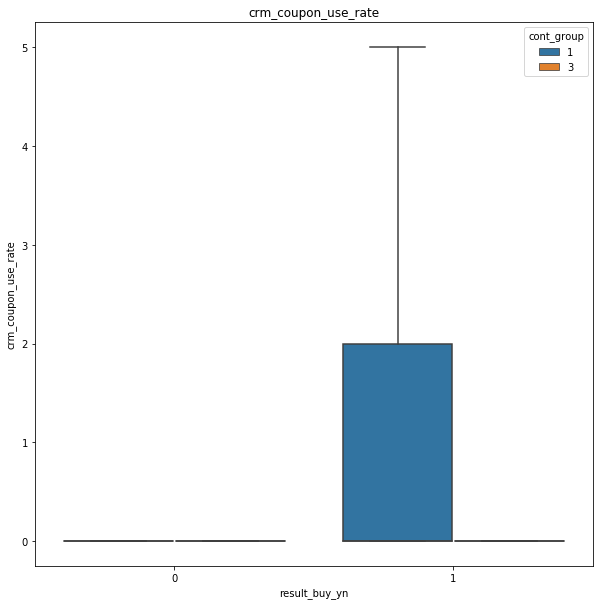

In [117]:
# fliers 제거하고 
plt.figure(figsize=(10,10))
sns.boxplot(x="result_buy_yn", y=numerical_features[8], hue="cont_group", data=data, showfliers=False)
plt.title( numerical_features[8] )
plt.show()
plt.close()

<Figure size 720x720 with 0 Axes>

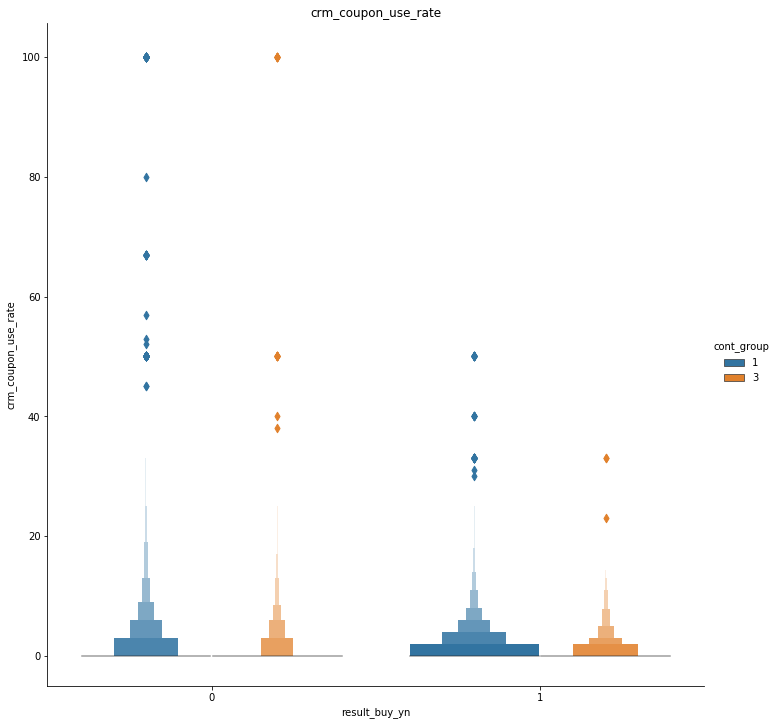

In [126]:
# fliers 제거하고 
plt.figure(figsize=(10,10))
sns.catplot(x="result_buy_yn", y=numerical_features[8], hue="cont_group", data=data , kind='boxen', height=10 )
plt.title( numerical_features[8] )

#plt.ylim(-10, 170)
plt.show()
plt.close()

---

### - (**)'buy_amount_3day'

In [128]:
numerical_features[9]

'buy_amount_3day'

In [130]:
data.groupby(['result_buy_yn', 'cont_group'])[[numerical_features[9]]].mean()

buy_amount_3day
result_buy_yn cont_group                 
0             1              62729.039543
              3              61617.601006
1             1              65576.264489
              3              64475.118867

In [132]:
data[(data.result_buy_yn == 0) & (data.cont_group == 1)][numerical_features[9]].describe() # 대부분이 0이다 - 분포보기 어렵다

count    3.507040e+05
mean     6.272904e+04
std      1.601382e+05
min      1.000000e+00
25%      1.590000e+04
50%      3.100000e+04
75%      6.150000e+04
max      3.294170e+07
Name: buy_amount_3day, dtype: float64

In [133]:
data[(data.result_buy_yn == 0) & (data.cont_group == 3)][numerical_features[9]].describe() # 대부분이 0이다

count    2.922100e+04
mean     6.161760e+04
std      1.371587e+05
min      1.000000e+00
25%      1.590000e+04
50%      3.090000e+04
75%      6.150000e+04
max      4.698000e+06
Name: buy_amount_3day, dtype: float64

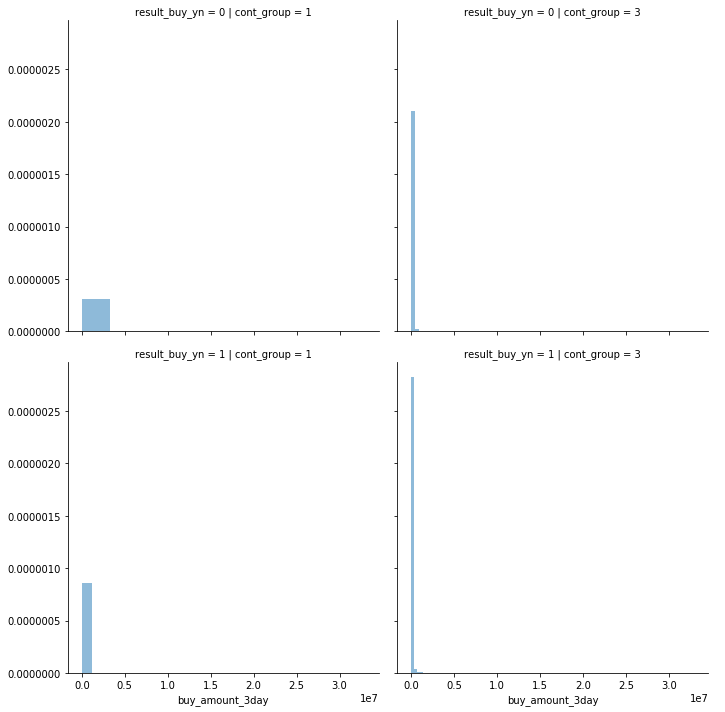

In [134]:
grid = sns.FacetGrid(data, row='result_buy_yn',col='cont_group', height=5)
grid.map( plt.hist, numerical_features[9], alpha=.5, bins=10, density=True)
grid.add_legend()

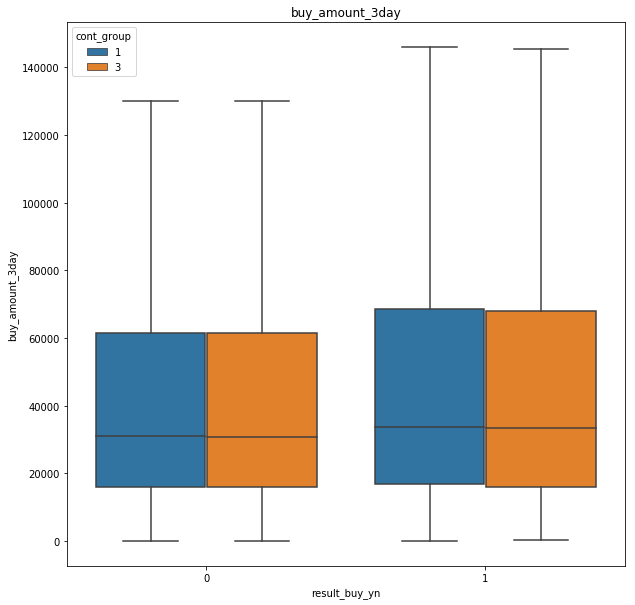

In [137]:
# fliers 제거하고 
plt.figure(figsize=(10,10))
sns.boxplot(x="result_buy_yn", y=numerical_features[9], hue="cont_group", data=data , showfliers=False)
plt.title( numerical_features[9] )
plt.show()
plt.close()

<Figure size 720x720 with 0 Axes>

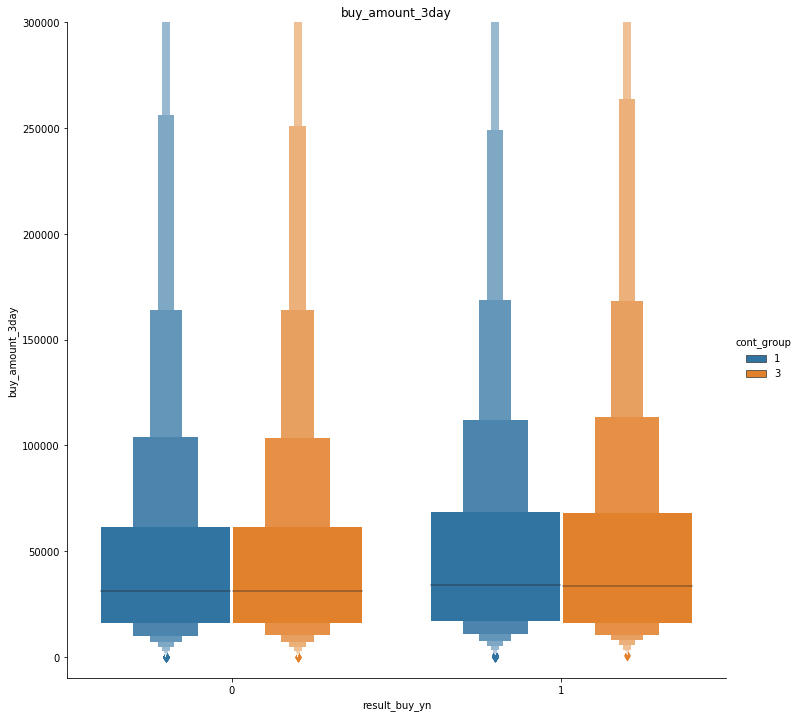

In [138]:
# fliers 제거하고 
plt.figure(figsize=(10,10))
sns.catplot(x="result_buy_yn", y=numerical_features[9], hue="cont_group", data=data, kind='boxen', height=10 )
plt.title( numerical_features[9] )

plt.ylim(-1e4, 3e5)
plt.show()
plt.close()

### : 구매한쪽의 'buy_amount_3day'가 살짝 높다 . but 실험군/대조군의 차이는 확인하기 어렵다

---
---

### - 'buy_cnt_payment_3day'

In [139]:
numerical_features[10]

'buy_cnt_payment_3day'

In [140]:
data.groupby(['result_buy_yn', 'cont_group'])[[numerical_features[10]]].mean()

buy_cnt_payment_3day
result_buy_yn cont_group                      
0             1                       1.306868
              3                       1.306458
1             1                       1.524650
              3                       1.547339

In [141]:
data[(data.result_buy_yn == 1) & (data.cont_group == 1)][numerical_features[10]].describe() #

count    36735.000000
mean         1.524650
std          0.906373
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         11.000000
Name: buy_cnt_payment_3day, dtype: float64

In [142]:
data[(data.result_buy_yn == 1) & (data.cont_group == 3)][numerical_features[10]].describe() # 대부분이 0이다

count    2894.000000
mean        1.547339
std         0.934238
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: buy_cnt_payment_3day, dtype: float64

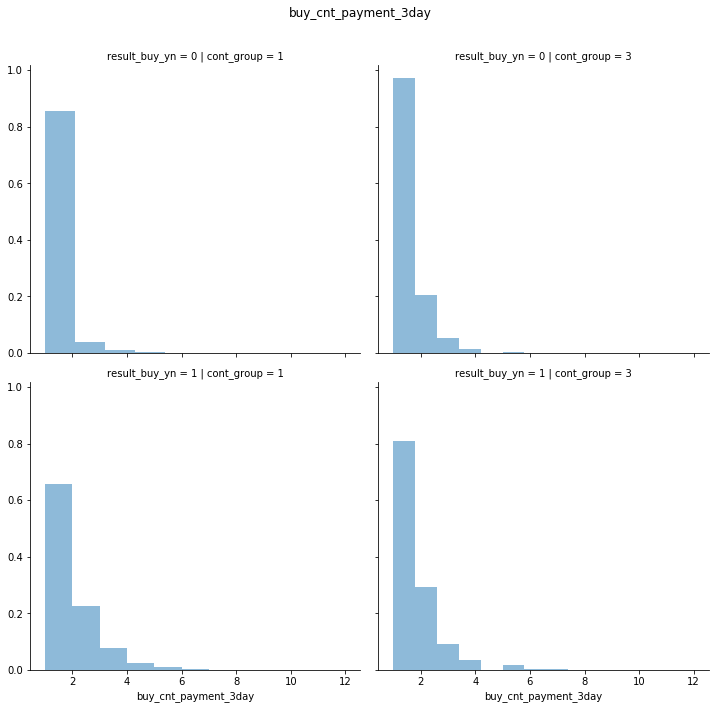

In [143]:
grid = sns.FacetGrid(data , row='result_buy_yn',col='cont_group', height=5)
grid.map( plt.hist, numerical_features[10], alpha=.5, bins=10, density=True)

plt.subplots_adjust(top=0.9) # for title
grid.fig.suptitle( numerical_features[10] ) #for title
grid.add_legend()

plt.show()
plt.close()

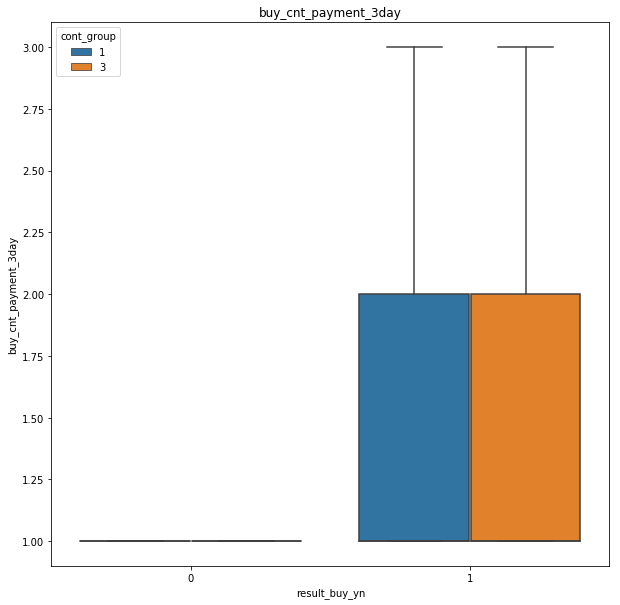

In [145]:
# fliers 제거하고 
plt.figure(figsize=(10,10))
sns.boxplot(x="result_buy_yn", y=numerical_features[10], hue="cont_group", data=data, showfliers=False)
plt.title( numerical_features[10] )
plt.show()
plt.close()

<Figure size 720x720 with 0 Axes>

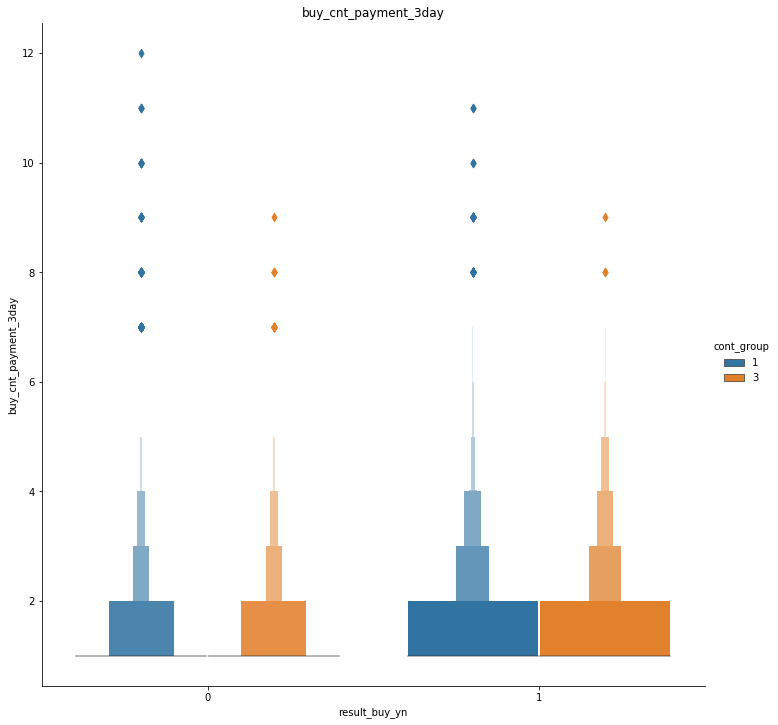

In [146]:
# fliers 제거하고 
plt.figure(figsize=(10,10))
sns.catplot(x="result_buy_yn", y=numerical_features[10], hue="cont_group", data=data , kind='boxen', height=10 )
plt.title( numerical_features[10] )

#plt.ylim(-1e3, 3e5)
plt.show()
plt.close()

### : 이 'buy_cnt_payment_3day'(3일동안의 결제횟수) 로는 알기 어려운것 같다

---
---

### - (---*)'buy_amount_avg'

In [147]:
numerical_features[11]

'buy_amount_avg'

In [148]:
data.groupby(['result_buy_yn', 'cont_group'])[[numerical_features[11]]].mean()

buy_amount_avg
result_buy_yn cont_group                
0             1             47607.689122
              3             47115.715136
1             1             42039.626051
              3             43046.267795

In [149]:
data[(data.result_buy_yn == 1) & (data.cont_group == 1)][numerical_features[11]].describe() #

count    3.673500e+04
mean     4.203963e+04
std      5.475076e+04
min      0.000000e+00
25%      2.307300e+04
50%      3.179200e+04
75%      4.461750e+04
max      2.136000e+06
Name: buy_amount_avg, dtype: float64

In [150]:
data[(data.result_buy_yn == 1) & (data.cont_group == 3)][numerical_features[11]].describe() # 

count    2.894000e+03
mean     4.304627e+04
std      6.391543e+04
min      0.000000e+00
25%      2.302850e+04
50%      3.178050e+04
75%      4.434150e+04
max      1.916000e+06
Name: buy_amount_avg, dtype: float64

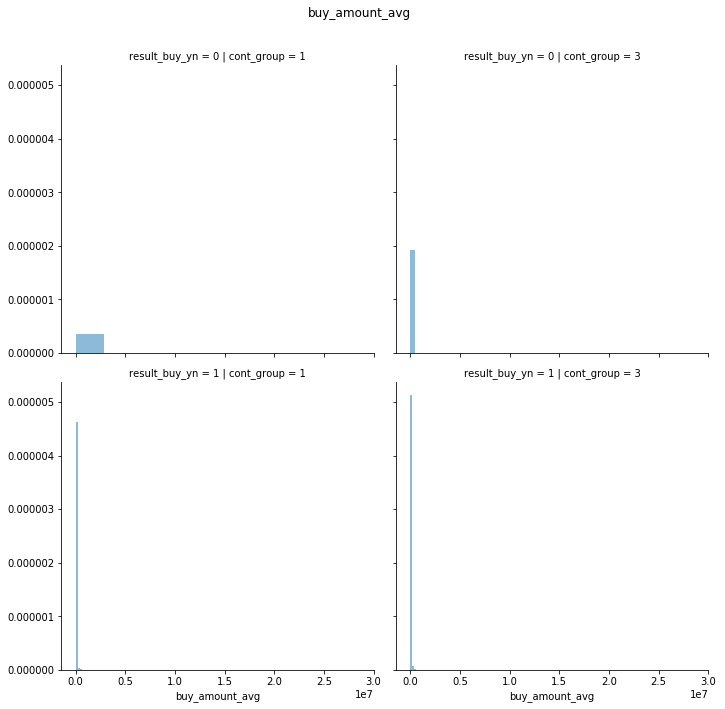

In [151]:
grid = sns.FacetGrid(data, row='result_buy_yn',col='cont_group', height=5)
grid.map( plt.hist, numerical_features[11], alpha=.5, bins=10, density=True)

plt.subplots_adjust(top=0.9) # for title
grid.fig.suptitle( numerical_features[11] ) #for title
grid.add_legend()

plt.show()
plt.close()

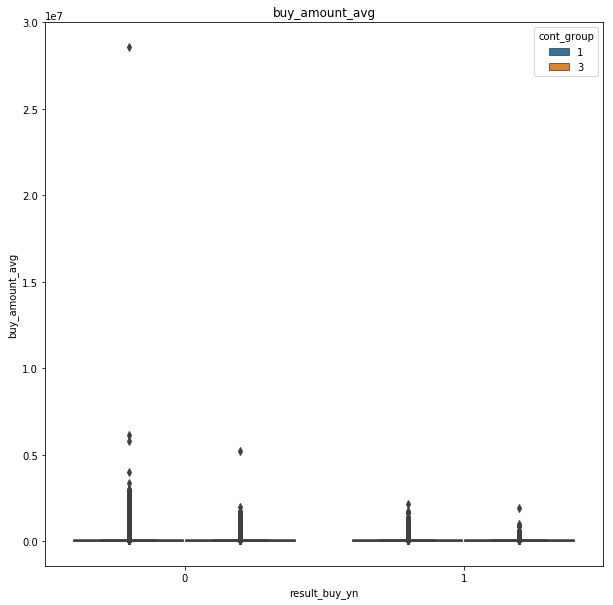

In [152]:
# fliers 제거하고 
plt.figure(figsize=(10,10))
sns.boxplot(x="result_buy_yn", y=numerical_features[11], hue="cont_group", data=data )
plt.title( numerical_features[11] )
plt.show()
plt.close()

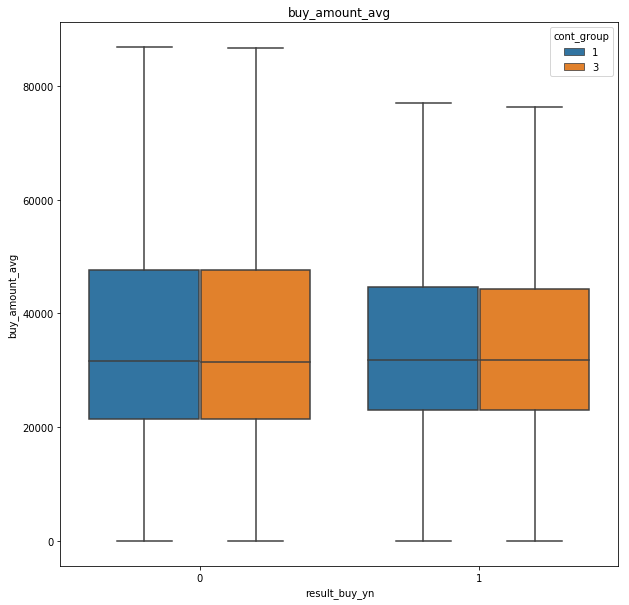

In [154]:
# fliers 제거하고 
plt.figure(figsize=(10,10))
sns.boxplot(x="result_buy_yn", y=numerical_features[11], hue="cont_group", data=data, showfliers=False)
plt.title( numerical_features[11] )
plt.show()
plt.close()

<Figure size 720x720 with 0 Axes>

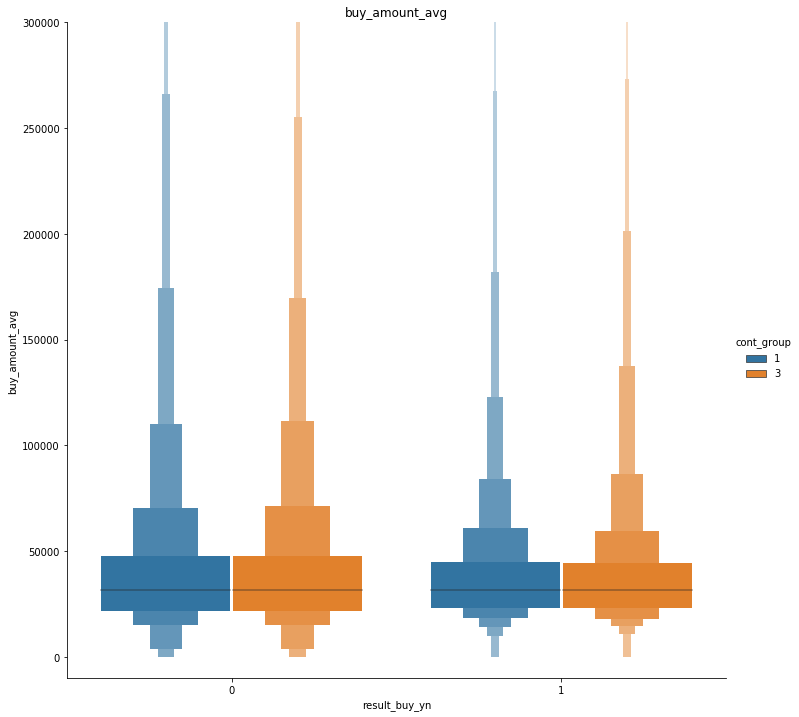

In [158]:
# fliers 제거하고 
plt.figure(figsize=(10,10))
sns.catplot(x="result_buy_yn", y=numerical_features[11], hue="cont_group", data=data , kind='boxen', height=10 )
plt.title( numerical_features[11] )

plt.ylim(-1e4, 3e5)
plt.show()
plt.close()

### : buy_amount_avg 로 살폈을때, 구매그룹의 평균 구매금액이 오히려 약간 낮다

---
---

### - (***)'dt_cnt_last_visit'

In [159]:
numerical_features[12]

'dt_cnt_last_visit'

In [160]:
data.groupby(['result_buy_yn', 'cont_group'])[[numerical_features[12]]].mean()

dt_cnt_last_visit
result_buy_yn cont_group                   
0             1                   36.318015
              3                   37.623456
1             1                   11.210698
              3                   12.536282

In [161]:
# 구매시에만(미구매에서도 봐야하지만) - 그룹간 차이 있는지
data[(data.result_buy_yn == 1) & (data.cont_group == 1)][numerical_features[12]].describe() #

count    36735.000000
mean        11.210698
std         63.460027
min         -1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max       1294.000000
Name: dt_cnt_last_visit, dtype: float64

In [162]:
data[(data.result_buy_yn == 1) & (data.cont_group == 3)][numerical_features[12]].describe() # 

count    2894.000000
mean       12.536282
std        72.804840
min        -1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max      1276.000000
Name: dt_cnt_last_visit, dtype: float64

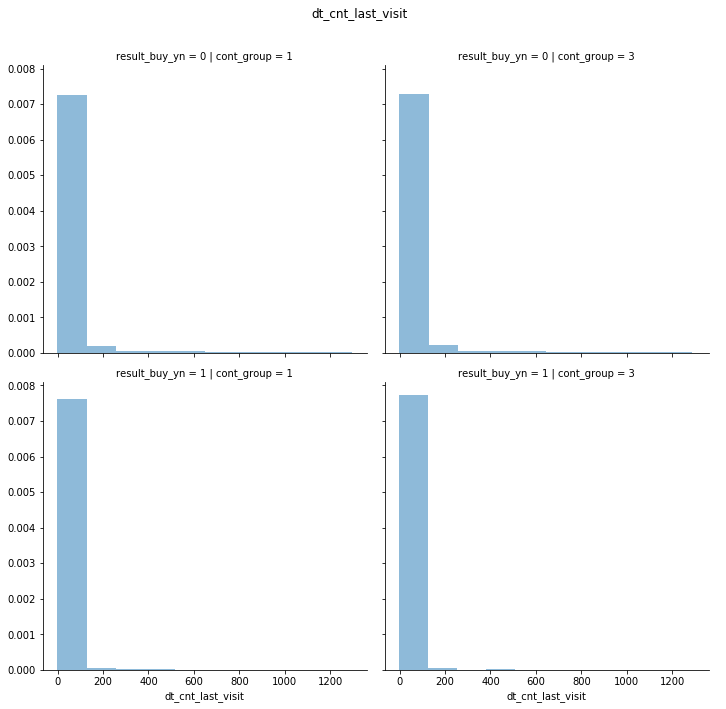

In [163]:
grid = sns.FacetGrid(data, row='result_buy_yn',col='cont_group', height=5)
grid.map( plt.hist, numerical_features[12], alpha=.5, bins=10, density=True)

plt.subplots_adjust(top=0.9) # for title
grid.fig.suptitle( numerical_features[12] ) #for title
grid.add_legend()

plt.show()
plt.close()

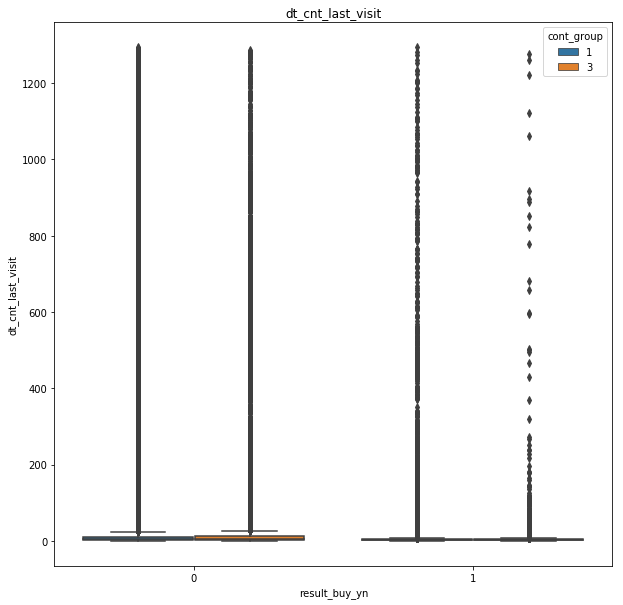

In [164]:
# 
plt.figure(figsize=(10,10))
sns.boxplot(x="result_buy_yn", y=numerical_features[12], hue="cont_group", data=data)
plt.title( numerical_features[12] )
plt.show()
plt.close()

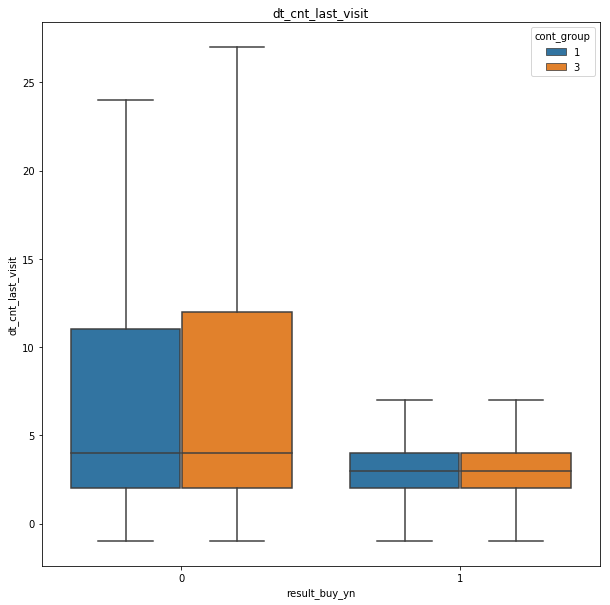

In [165]:
# fliers 제거하고 
plt.figure(figsize=(10,10))
sns.boxplot(x="result_buy_yn", y=numerical_features[12], hue="cont_group", data=data, showfliers=False)
plt.title( numerical_features[12] )
plt.show()
plt.close()

<Figure size 720x720 with 0 Axes>

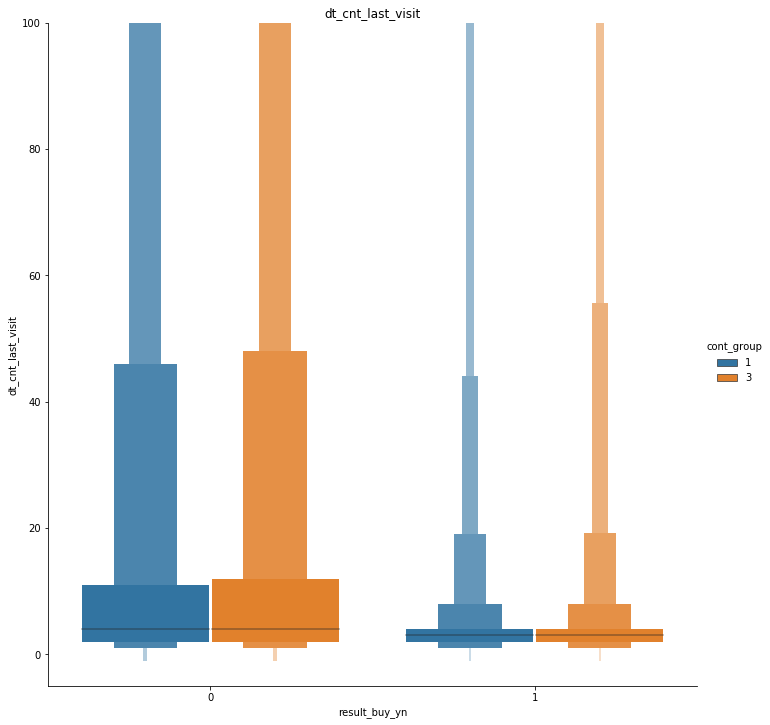

In [166]:
# fliers 제거하고 
plt.figure(figsize=(10,10))
sns.catplot(x="result_buy_yn", y=numerical_features[12], hue="cont_group", data=data, kind='boxen', height=10 )
plt.title( numerical_features[12] )

plt.ylim(-5, 100)
plt.show()
plt.close()

### : 구매한쪽의 'dt_cnt_last_visit'이 낮다. (실험/통제군 차이를 확인하긴 어렵지만) 더욱 최근에 방문했어야지 구매할 확률이 높다!

---
---

### - (여기부터)'dt_cnt_last_buy'

In [169]:
numerical_features[13]

'dt_cnt_last_buy'

In [170]:
data.groupby(['result_buy_yn', 'cont_group'])[[numerical_features[13]]].mean()

dt_cnt_last_buy
result_buy_yn cont_group                 
0             1                 72.044151
              3                 72.291948
1             1                 27.834490
              3                 27.752592

In [171]:
# 구매시에만(미구매에서도 봐야하지만) - 그룹간 차이 있는지
data[(data.result_buy_yn == 1) & (data.cont_group == 1)][numerical_features[13]].describe() #

count    36735.000000
mean        27.834490
std        103.473326
min         -1.000000
25%          5.000000
50%          8.000000
75%         18.000000
max       2984.000000
Name: dt_cnt_last_buy, dtype: float64

In [172]:
data[(data.result_buy_yn == 1) & (data.cont_group == 3)][numerical_features[13]].describe() # 

count    2894.000000
mean       27.752592
std       102.459864
min        -1.000000
25%         5.000000
50%         8.000000
75%        20.000000
max      2459.000000
Name: dt_cnt_last_buy, dtype: float64

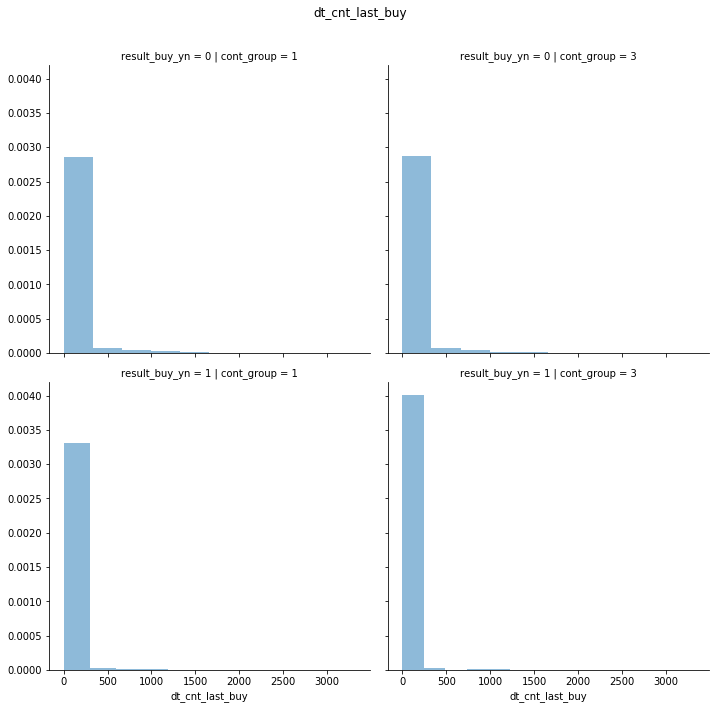

In [173]:
grid = sns.FacetGrid(data, row='result_buy_yn',col='cont_group', height=5)
grid.map( plt.hist, numerical_features[13], alpha=.5, bins=10, density=True)

plt.subplots_adjust(top=0.9) # for title
grid.fig.suptitle( numerical_features[13] ) #for title
grid.add_legend()

plt.show()
plt.close()

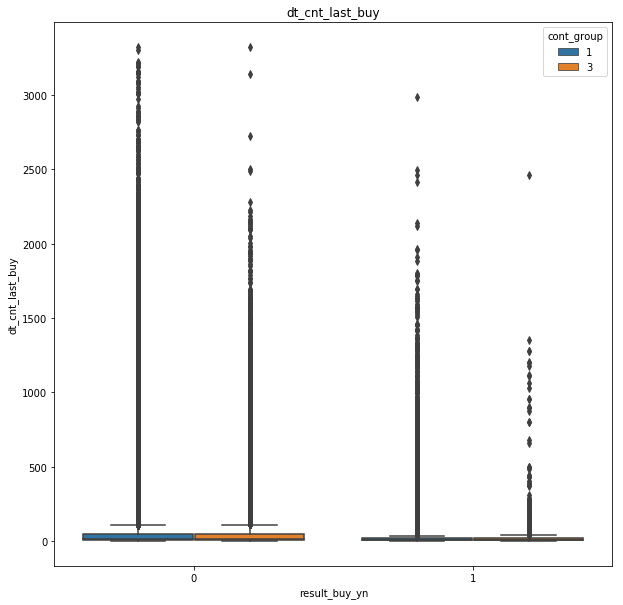

In [175]:
# 
plt.figure(figsize=(10,10))
sns.boxplot(x="result_buy_yn", y=numerical_features[13], hue="cont_group", data=data)
plt.title( numerical_features[13] )
plt.show()
plt.close()

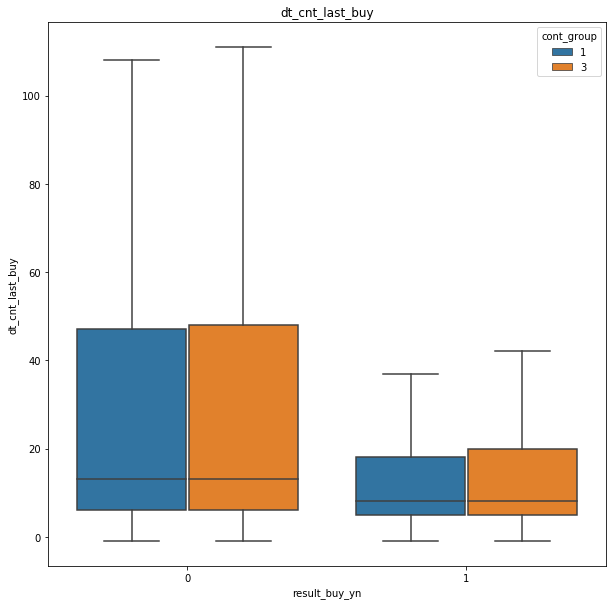

In [177]:
# fliers 제거하고 
plt.figure(figsize=(10,10))
sns.boxplot(x="result_buy_yn", y=numerical_features[13], hue="cont_group", data=data, showfliers=False)
plt.title( numerical_features[13] )
plt.show()
plt.close()

<Figure size 720x720 with 0 Axes>

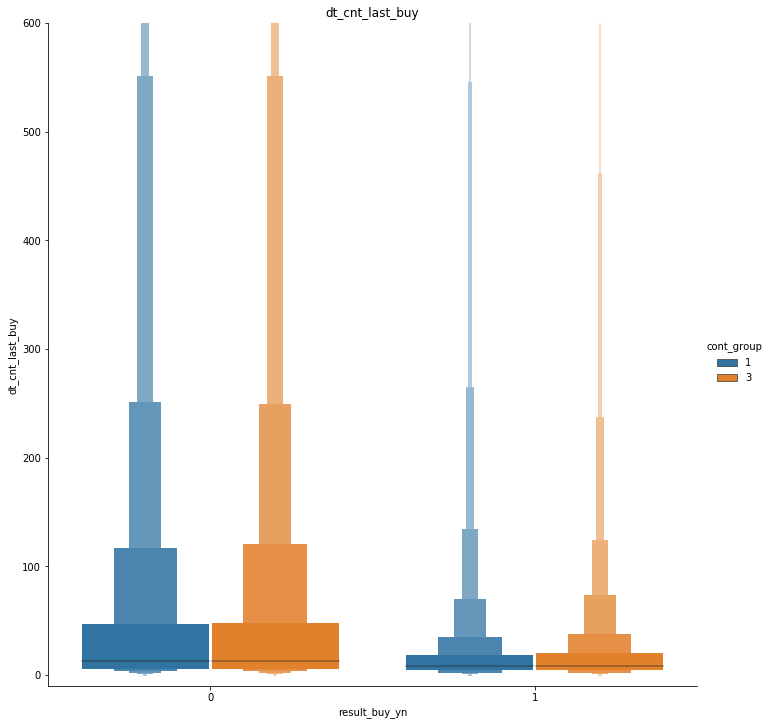

In [180]:
# fliers 제거하고 
plt.figure(figsize=(10,10))
sns.catplot(x="result_buy_yn", y=numerical_features[13], hue="cont_group", data=data, kind='boxen', height=10)
plt.title( numerical_features[13] )

plt.ylim(-10, 600)
plt.show()
plt.close()

---
---

### - 'ratio_spc'

In [183]:
numerical_features[14]

'ratio_spc'

In [185]:
data.groupby(['result_buy_yn', 'cont_group'])[[numerical_features[14]]].mean()

ratio_spc
result_buy_yn cont_group           
0             1            0.385768
              3            0.384956
1             1            0.492538
              3            0.491983

In [186]:
# 구매시에만(미구매에서도 봐야하지만) - 그룹간 차이 있는지
data[(data.result_buy_yn == 1) & (data.cont_group == 1)][numerical_features[14]].describe() #

count    36735.000000
mean         0.492538
std          0.288403
min          0.000000
25%          0.300000
50%          0.500000
75%          0.700000
max          1.000000
Name: ratio_spc, dtype: float64

In [187]:
data[(data.result_buy_yn == 1) & (data.cont_group == 3)][numerical_features[14]].describe() #

count    2894.000000
mean        0.491983
std         0.283120
min         0.000000
25%         0.300000
50%         0.500000
75%         0.700000
max         1.000000
Name: ratio_spc, dtype: float64

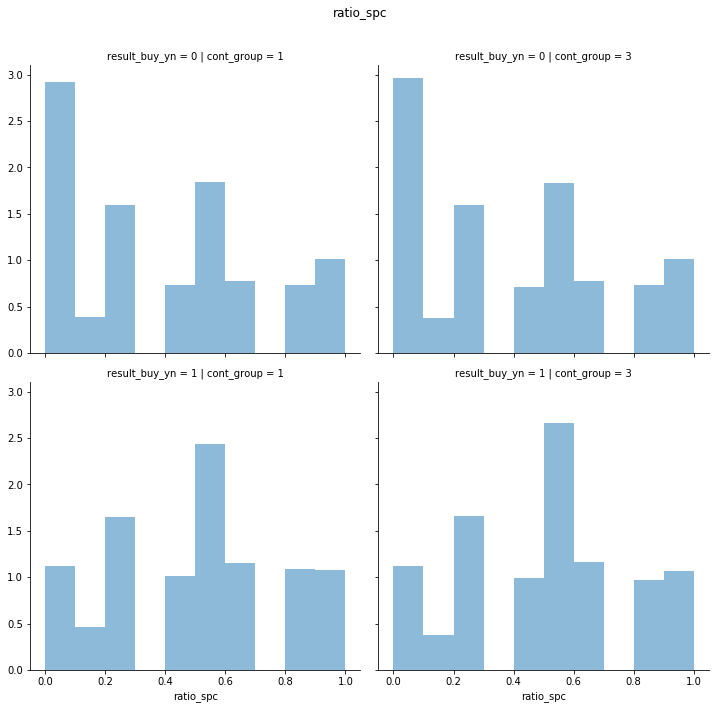

In [188]:
grid = sns.FacetGrid(data, row='result_buy_yn',col='cont_group', height=5)
grid.map( plt.hist, numerical_features[14], alpha=.5, bins=10, density=True)

plt.subplots_adjust(top=0.9) # for title
grid.fig.suptitle( numerical_features[14] ) #for title
grid.add_legend()

plt.show()
plt.close()

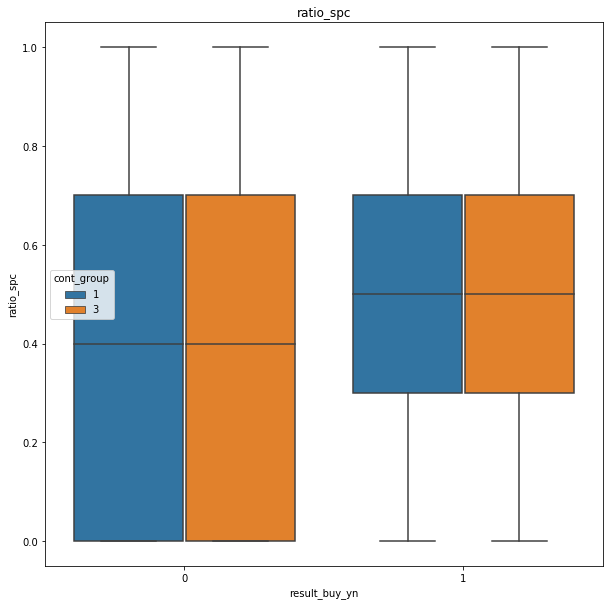

In [190]:
# # s
plt.figure(figsize=(10,10))
sns.boxplot(x="result_buy_yn", y=numerical_features[14], hue="cont_group", data=data) # showfliers=False 안해도 되겠다
plt.title( numerical_features[14] )
plt.show()
plt.close()

<Figure size 720x720 with 0 Axes>

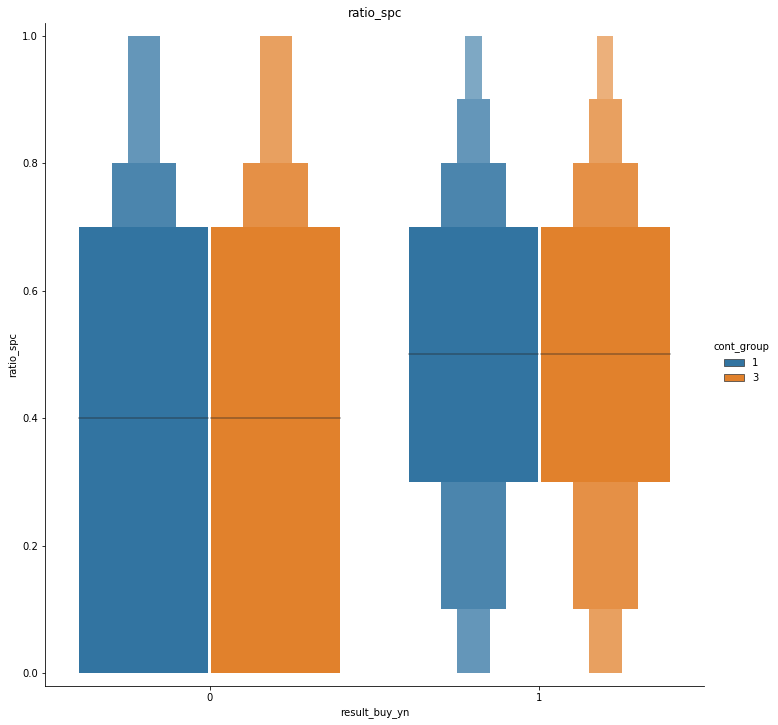

In [200]:
# Boxen plot
plt.figure(figsize=(10,10))
sns.catplot(x="result_buy_yn", y=numerical_features[14], hue="cont_group", data=data , kind='boxen', height=10)
plt.title( numerical_features[14] )

plt.ylim( -0.02, 1.02)
plt.show()
plt.close()

---

---

### - 'refund_rate'

In [204]:
numerical_features[15]

'refund_rate'

In [206]:
data.groupby(['result_buy_yn', 'cont_group'])[[numerical_features[15]]].mean()

refund_rate
result_buy_yn cont_group             
0             1              9.359026
              3              9.467369
1             1             10.324160
              3             10.390463

In [207]:
# 구매시에만(미구매에서도 봐야하지만) - 그룹간 차이 있는지
data[(data.result_buy_yn == 1) & (data.cont_group == 1)][numerical_features[15]].describe() #

count    36735.00000
mean        10.32416
std         10.34164
min          0.00000
25%          3.00000
50%          8.00000
75%         15.00000
max        100.00000
Name: refund_rate, dtype: float64

In [208]:
data[(data.result_buy_yn == 1) & (data.cont_group == 3)][numerical_features[15]].describe() #

count    2894.000000
mean       10.390463
std         9.938365
min         0.000000
25%         3.000000
50%         8.000000
75%        15.000000
max       100.000000
Name: refund_rate, dtype: float64

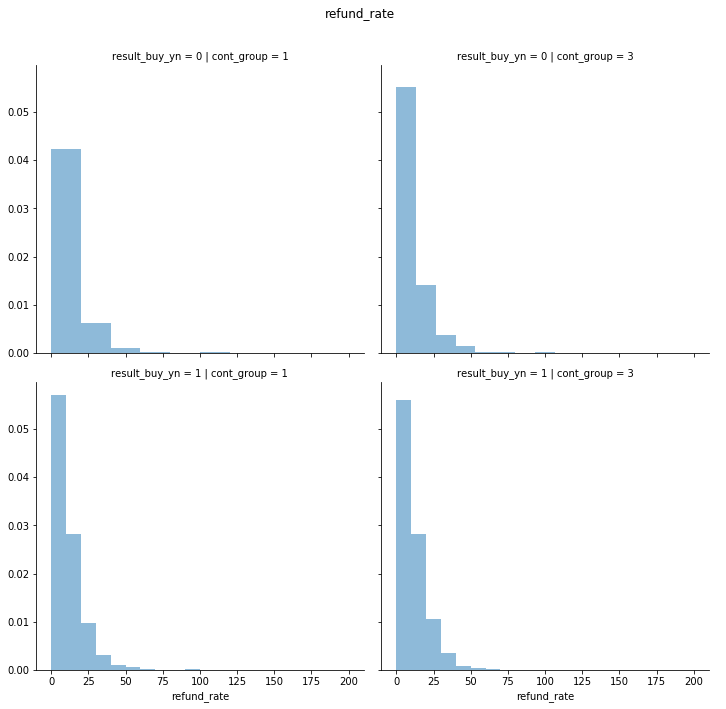

In [210]:
grid = sns.FacetGrid(data , row='result_buy_yn',col='cont_group', height=5)
grid.map( plt.hist, numerical_features[15], alpha=.5, bins=10, density=True)

plt.subplots_adjust(top=0.9) # for title
grid.fig.suptitle( numerical_features[15] ) #for title
grid.add_legend()

plt.show()
plt.close()

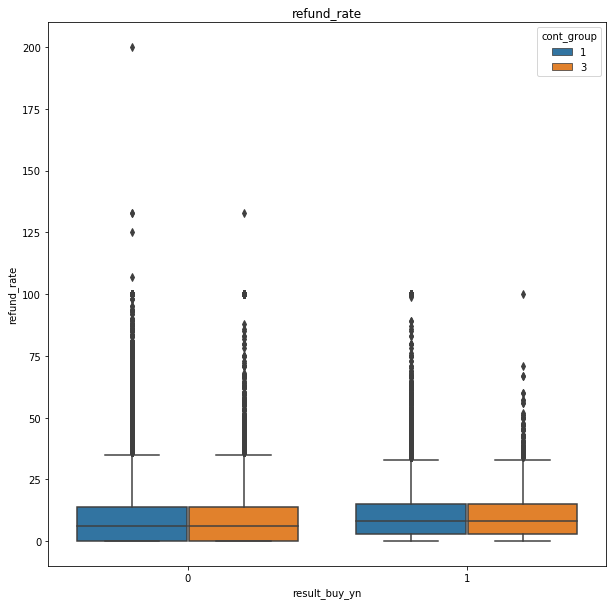

In [214]:
# # s
plt.figure(figsize=(10,10))
sns.boxplot(x="result_buy_yn", y=numerical_features[15], hue="cont_group", data=data ) 
plt.title( numerical_features[15] )
plt.show()
plt.close()

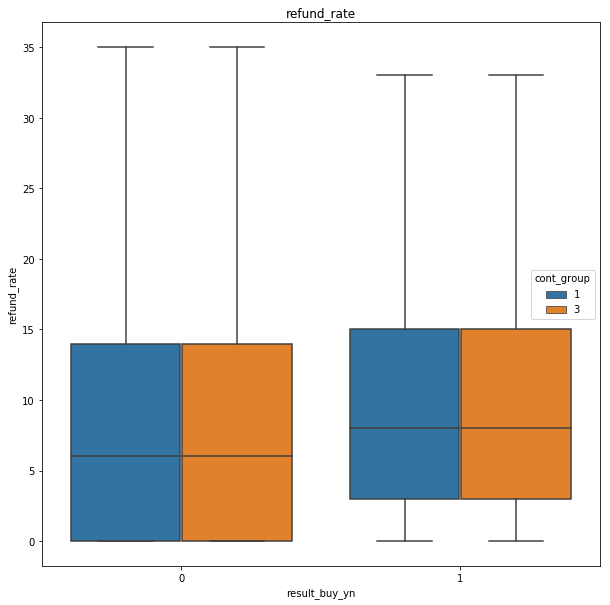

In [215]:
# # s
plt.figure(figsize=(10,10))
sns.boxplot(x="result_buy_yn", y=numerical_features[15], hue="cont_group", data=data , showfliers=False) 
plt.title( numerical_features[15] )
plt.show()
plt.close()

<Figure size 720x720 with 0 Axes>

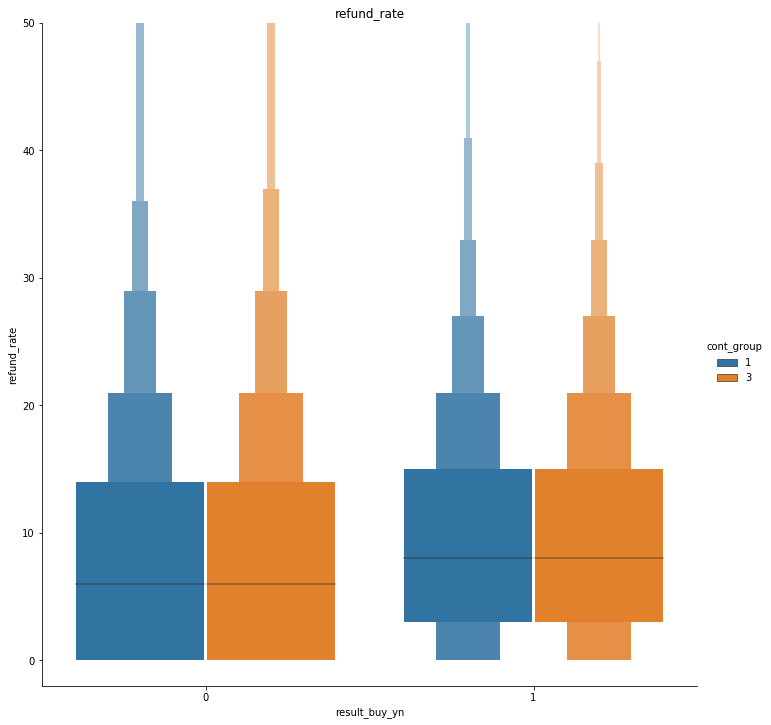

In [218]:
# Boxen plot
plt.figure(figsize=(10,10))
sns.catplot(x="result_buy_yn", y=numerical_features[15], hue="cont_group", data=data , kind='boxen', height=10)
plt.title( numerical_features[15] )

plt.ylim(-2, 50)
plt.show()
plt.close()

---
---

### - 'wmp_freq'

In [220]:
numerical_features[16]

'wmp_freq'

In [221]:
data.groupby(['result_buy_yn', 'cont_group'])[[numerical_features[16]]].mean()

wmp_freq
result_buy_yn cont_group           
0             1           16.214577
              3           16.105780
1             1           29.424228
              3           30.329302

In [222]:
# 구매시에만(미구매에서도 봐야하지만) - 그룹간 차이 있는지
data[(data.result_buy_yn == 1) & (data.cont_group == 1)][numerical_features[16]].describe() #

count    36735.000000
mean        29.424228
std         23.738556
min          1.000000
25%         13.000000
50%         23.000000
75%         39.000000
max        435.000000
Name: wmp_freq, dtype: float64

In [223]:
data[(data.result_buy_yn == 1) & (data.cont_group == 3)][numerical_features[16]].describe() #

count    2894.000000
mean       30.329302
std        24.470226
min         1.000000
25%        13.000000
50%        24.000000
75%        41.000000
max       215.000000
Name: wmp_freq, dtype: float64

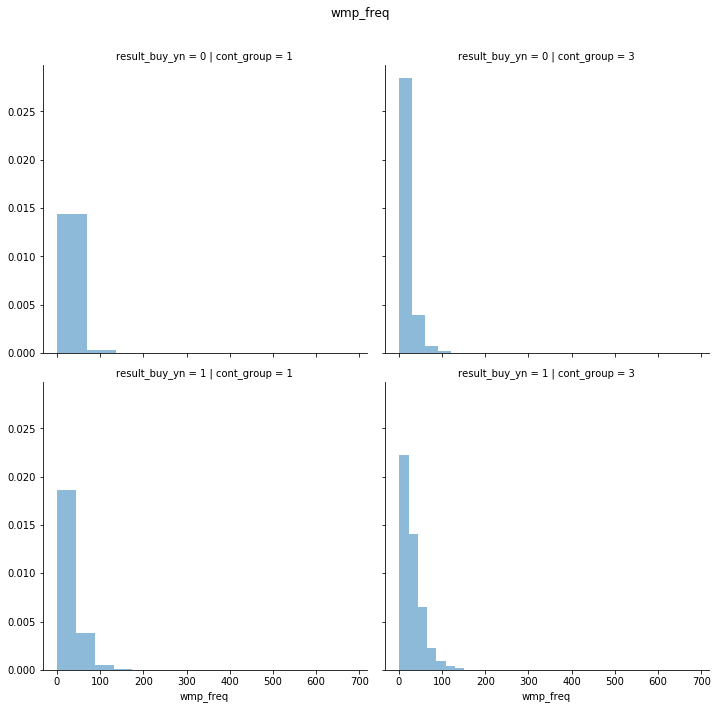

In [225]:
grid = sns.FacetGrid(data, row='result_buy_yn',col='cont_group', height=5)
grid.map( plt.hist, numerical_features[16], alpha=.5, bins=10, density=True)

plt.subplots_adjust(top=0.9) # for title
grid.fig.suptitle( numerical_features[16] ) #for title
grid.add_legend()

plt.show()
plt.close()

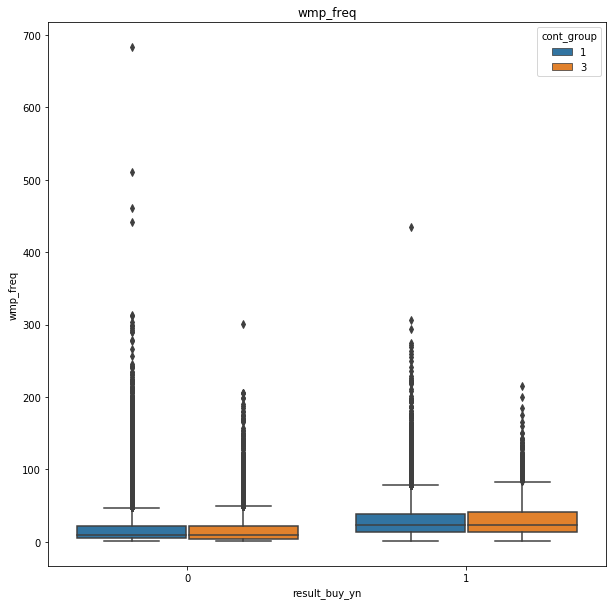

In [226]:
# # s
plt.figure(figsize=(10,10))
sns.boxplot(x="result_buy_yn", y=numerical_features[16], hue="cont_group", data=data ) 
plt.title( numerical_features[16] )
plt.show()
plt.close()

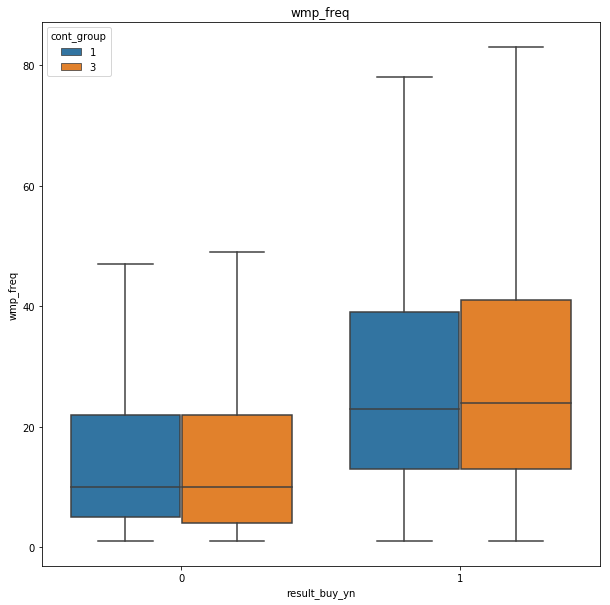

In [227]:
# # s
plt.figure(figsize=(10,10))
sns.boxplot(x="result_buy_yn", y=numerical_features[16], hue="cont_group", data=data , showfliers=False ) 
plt.title( numerical_features[16] )
plt.show()
plt.close()

<Figure size 720x720 with 0 Axes>

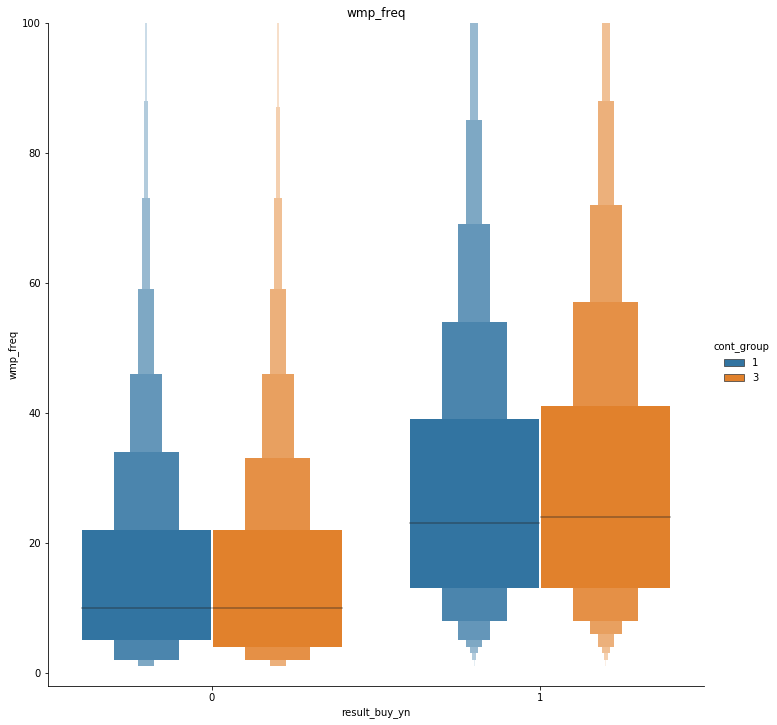

In [230]:
# Boxen plot
plt.figure(figsize=(10,10))
sns.catplot(x="result_buy_yn", y=numerical_features[16], hue="cont_group", data=data , kind='boxen', height=10)
plt.title( numerical_features[16] )

plt.ylim(-2,100)
plt.show()
plt.close()

---

### - 'wmp_stay_avg'

In [231]:
numerical_features[17]

'wmp_stay_avg'

In [232]:
data.groupby(['result_buy_yn', 'cont_group'])[[numerical_features[17]]].mean()

wmp_stay_avg
result_buy_yn cont_group              
0             1               6.094305
              3               6.062592
1             1               6.787260
              3               6.677954

In [233]:
# 구매시에만(미구매에서도 봐야하지만) - 그룹간 차이 있는지
data[(data.result_buy_yn == 1) & (data.cont_group == 1)][numerical_features[17]].describe() #

count    36735.000000
mean         6.787260
std          5.324281
min          0.000000
25%          3.000000
50%          5.000000
75%          9.000000
max        206.000000
Name: wmp_stay_avg, dtype: float64

In [234]:
data[(data.result_buy_yn == 1) & (data.cont_group == 3)][numerical_features[17]].describe() #

count    2894.000000
mean        6.677954
std         4.919183
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        57.000000
Name: wmp_stay_avg, dtype: float64

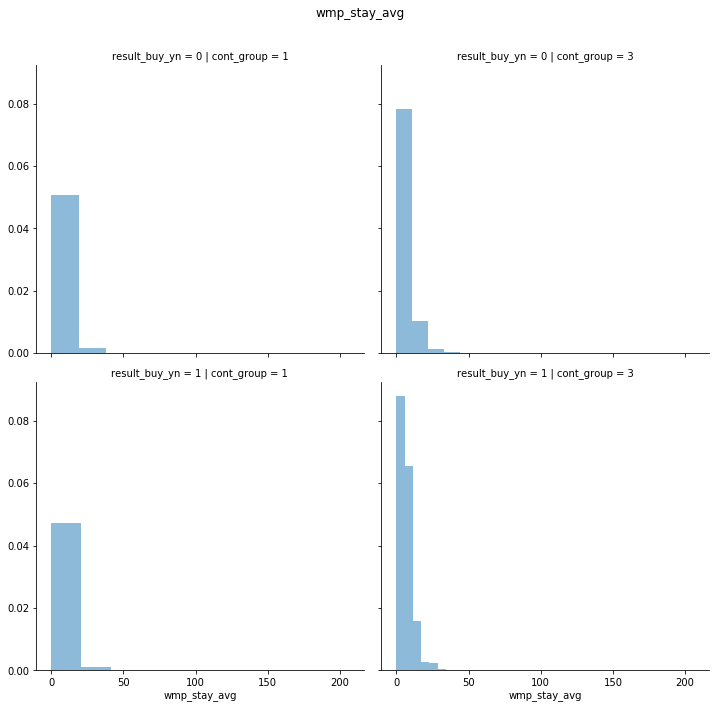

In [235]:
grid = sns.FacetGrid(data , row='result_buy_yn',col='cont_group', height=5)
grid.map( plt.hist, numerical_features[17], alpha=.5, bins=10, density=True)

plt.subplots_adjust(top=0.9) # for title
grid.fig.suptitle( numerical_features[17] ) #for title
grid.add_legend()

plt.show()
plt.close()

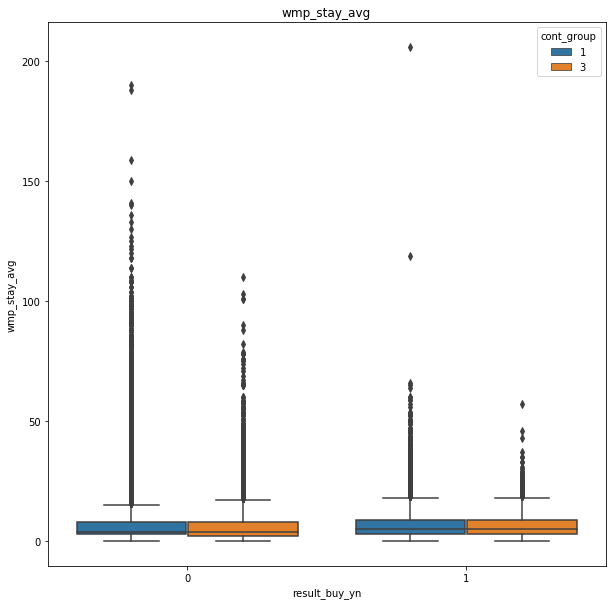

In [237]:
# # s
plt.figure(figsize=(10,10))
sns.boxplot(x="result_buy_yn", y=numerical_features[17], hue="cont_group", data=data ) 
plt.title( numerical_features[17] )
plt.show()
plt.close()

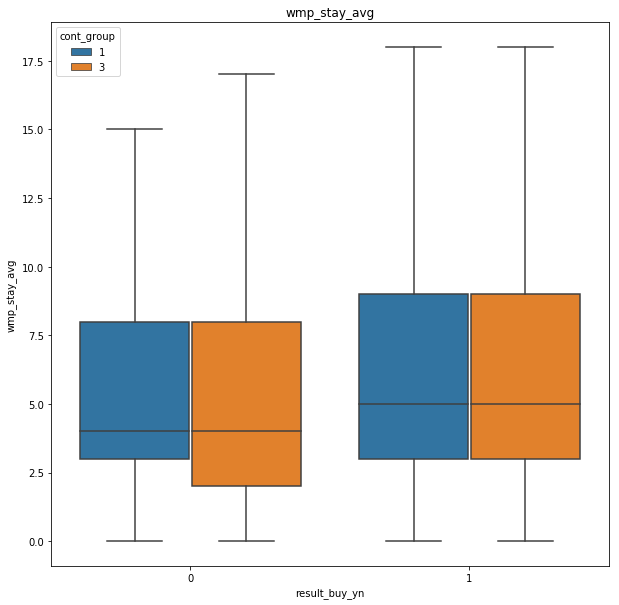

In [238]:
# # s
plt.figure(figsize=(10,10))
sns.boxplot(x="result_buy_yn", y=numerical_features[17], hue="cont_group", data=data , showfliers=False) 
plt.title( numerical_features[17] )
plt.show()
plt.close()

<Figure size 720x720 with 0 Axes>

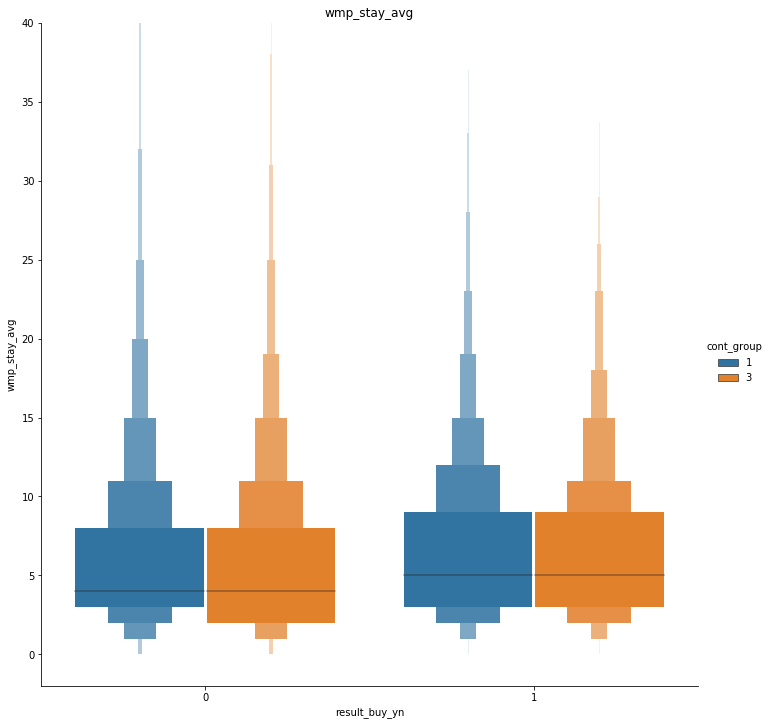

In [239]:
# Boxen plot
plt.figure(figsize=(10,10))
sns.catplot(x="result_buy_yn", y=numerical_features[17], hue="cont_group", data=data, kind='boxen', height=10)
plt.title( numerical_features[17] )

plt.ylim(-2,40)
plt.show()
plt.close()

---

### - 'wmp_pick_click'

In [241]:
numerical_features[18]

'wmp_pick_click'

In [242]:
data.groupby(['result_buy_yn', 'cont_group'])[[numerical_features[18]]].mean()

wmp_pick_click
result_buy_yn cont_group                
0             1                 1.799441
              3                 1.772048
1             1                 3.122935
              3                 3.230477

In [243]:
# 구매시에만(미구매에서도 봐야하지만) - 그룹간 차이 있는지
data[(data.result_buy_yn == 1) & (data.cont_group == 1)][numerical_features[18]].describe() #

count    36735.000000
mean         3.122935
std          4.662441
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max        120.000000
Name: wmp_pick_click, dtype: float64

In [244]:
data[(data.result_buy_yn == 1) & (data.cont_group == 3)][numerical_features[18]].describe()

count    2894.000000
mean        3.230477
std         4.653321
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        49.000000
Name: wmp_pick_click, dtype: float64

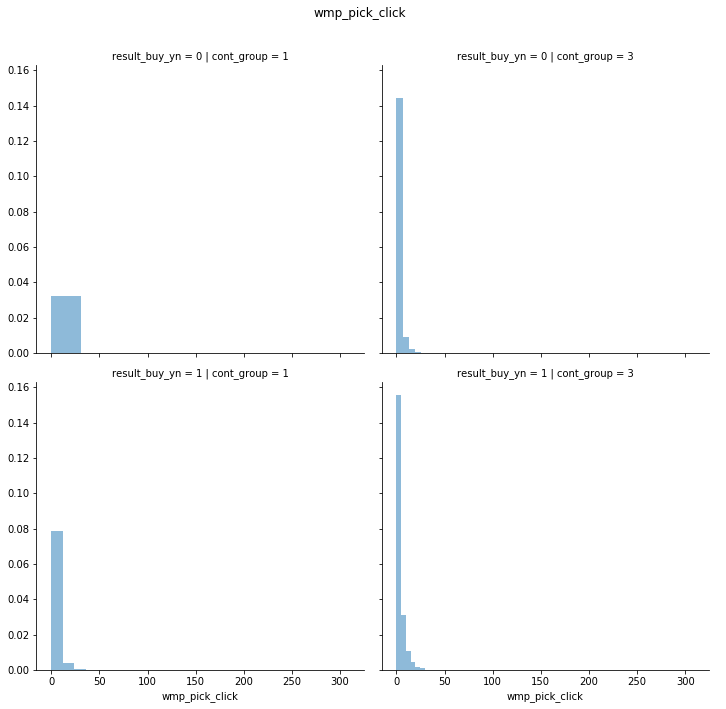

In [245]:
grid = sns.FacetGrid(data, row='result_buy_yn',col='cont_group', height=5)
grid.map( plt.hist, numerical_features[18], alpha=.5, bins=10, density=True)

plt.subplots_adjust(top=0.9) # for title
grid.fig.suptitle( numerical_features[18] ) #for title
grid.add_legend()

plt.show()
plt.close()

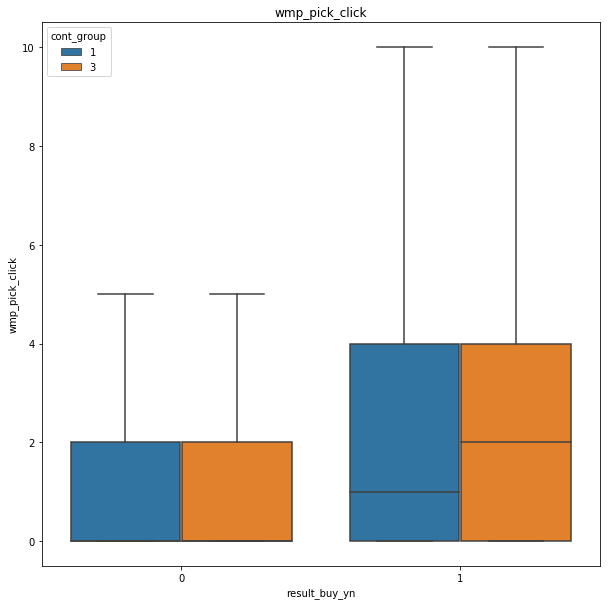

In [247]:
# # median 값에 차이가 있다?
plt.figure(figsize=(10,10))
sns.boxplot(x="result_buy_yn", y=numerical_features[18], hue="cont_group", data=data , showfliers=False) 
plt.title( numerical_features[18] )
plt.show()
plt.close()

<Figure size 720x720 with 0 Axes>

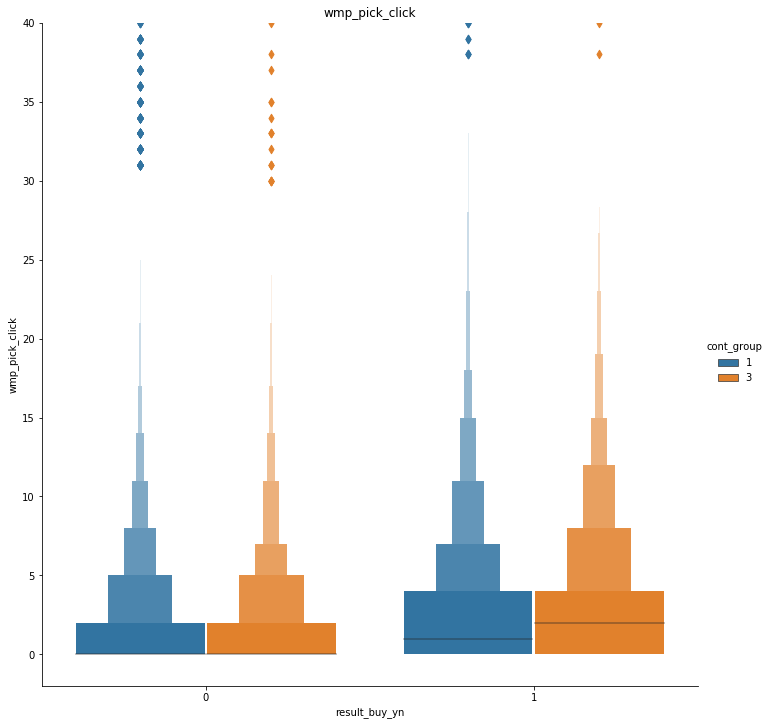

In [253]:
# Boxen plot
plt.figure(figsize=(10,10))
sns.catplot(x="result_buy_yn", y=numerical_features[18], hue="cont_group", data=data, kind='boxen', height=10)
plt.title( numerical_features[18] )

plt.ylim(-2,40)
plt.show()
plt.close()

---

### - 'rgt_elapsed_days'

In [255]:
numerical_features[19]

'rgt_elapsed_days'

In [257]:
data.groupby(['result_buy_yn', 'cont_group'])[[numerical_features[19]]].mean()

rgt_elapsed_days
result_buy_yn cont_group                  
0             1                1915.472096
              3                1923.801376
1             1                1964.913434
              3                1994.497927

In [258]:
# 구매시에만(미구매에서도 봐야하지만) - 그룹간 차이 있는지
data[(data.result_buy_yn == 1) & (data.cont_group == 1)][numerical_features[19]].describe() #

count    36735.000000
mean      1964.913434
std        824.425094
min          1.000000
25%       1459.000000
50%       2106.000000
75%       2534.000000
max       3332.000000
Name: rgt_elapsed_days, dtype: float64

In [259]:
data[(data.result_buy_yn == 1) & (data.cont_group == 3)][numerical_features[19]].describe() # 

count    2894.000000
mean     1994.497927
std       812.522049
min         1.000000
25%      1497.000000
50%      2116.500000
75%      2569.000000
max      3332.000000
Name: rgt_elapsed_days, dtype: float64

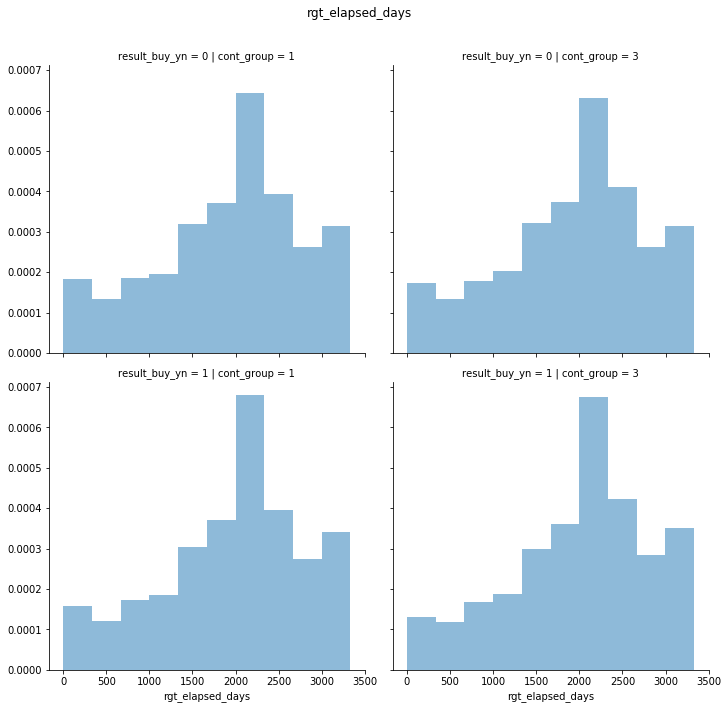

In [260]:
grid = sns.FacetGrid(data, row='result_buy_yn',col='cont_group', height=5)
grid.map( plt.hist, numerical_features[19], alpha=.5, bins=10, density=True)

plt.subplots_adjust(top=0.9) # for title
grid.fig.suptitle( numerical_features[19] ) #for title
grid.add_legend()

plt.show()
plt.close()

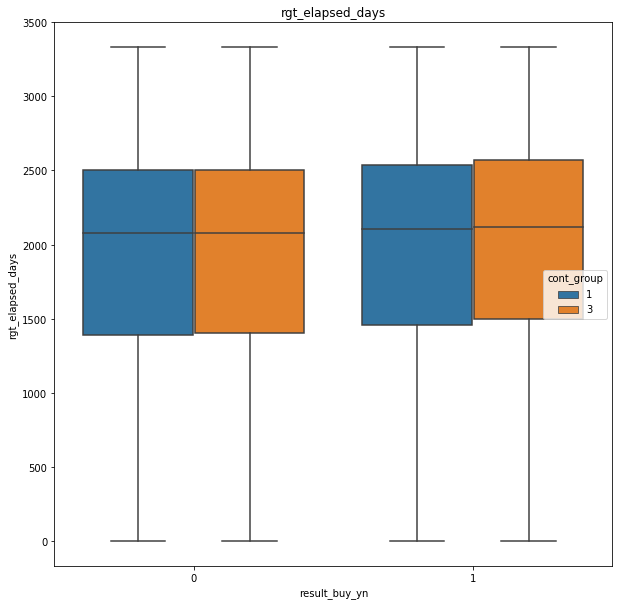

In [261]:
# # s
plt.figure(figsize=(10,10))
sns.boxplot(x="result_buy_yn", y=numerical_features[19], hue="cont_group", data=data ) 
plt.title( numerical_features[19] )
plt.show()
plt.close()

<Figure size 720x720 with 0 Axes>

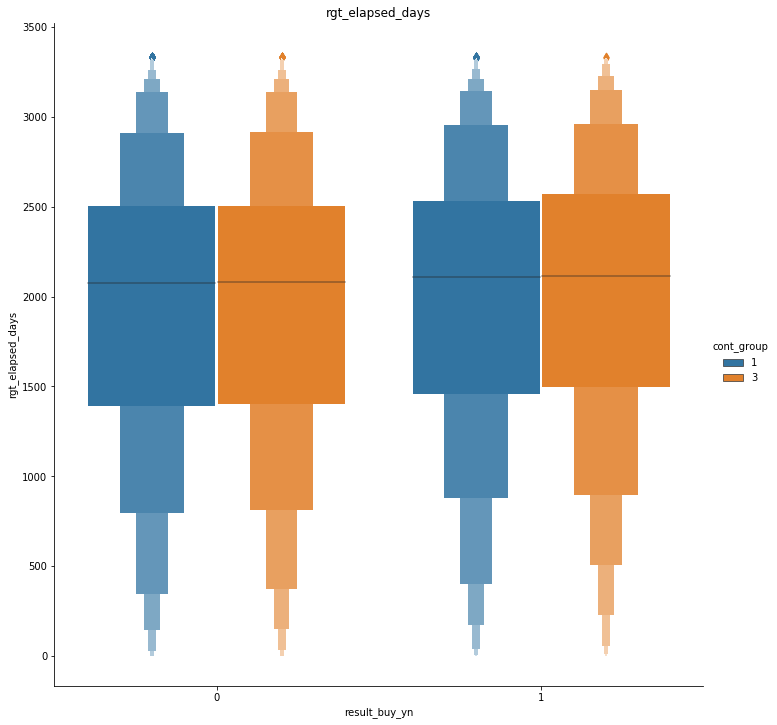

In [263]:
# Boxen plot
plt.figure(figsize=(10,10))
sns.catplot(x="result_buy_yn", y=numerical_features[19], hue="cont_group", data=data, kind='boxen', height=10)
plt.title( numerical_features[19] )

#plt.ylim(-2,30)
plt.show()
plt.close()

---
---

### - 'buy_amount_avg_all'

In [264]:
numerical_features[20]

'buy_amount_avg_all'

In [265]:
data.groupby(['result_buy_yn', 'cont_group'])[[numerical_features[20]]].mean()

buy_amount_avg_all
result_buy_yn cont_group                    
0             1                 62014.668560
              3                 61519.343440
1             1                 56068.861194
              3                 57308.915955

In [266]:
# 구매시에만(미구매에서도 봐야하지만) - 그룹간 차이 있는지
data[(data.result_buy_yn == 1) & (data.cont_group == 1)][numerical_features[20]].describe() #

count    3.673500e+04
mean     5.606886e+04
std      1.063490e+05
min      1.450000e+03
25%      2.942311e+04
50%      4.089566e+04
75%      5.849506e+04
max      1.159970e+07
Name: buy_amount_avg_all, dtype: float64

In [267]:
data[(data.result_buy_yn == 1) & (data.cont_group == 3)][numerical_features[20]].describe() # 

count    2.894000e+03
mean     5.730892e+04
std      9.506665e+04
min      2.150000e+03
25%      2.913545e+04
50%      4.078842e+04
75%      5.799681e+04
max      2.463000e+06
Name: buy_amount_avg_all, dtype: float64

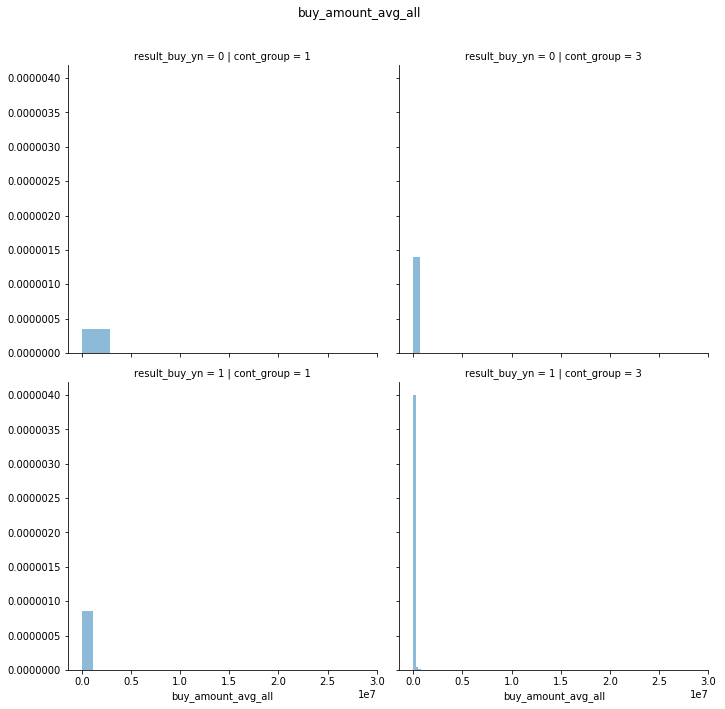

In [268]:
grid = sns.FacetGrid(data, row='result_buy_yn',col='cont_group', height=5)
grid.map( plt.hist, numerical_features[20], alpha=.5, bins=10, density=True)

plt.subplots_adjust(top=0.9) # for title
grid.fig.suptitle( numerical_features[20] ) #for title
grid.add_legend()

plt.show()
plt.close()

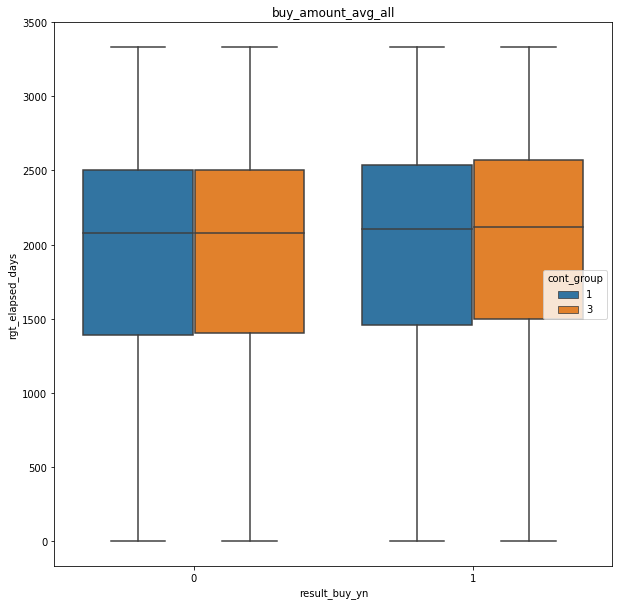

In [269]:
# # s
plt.figure(figsize=(10,10))
sns.boxplot(x="result_buy_yn", y=numerical_features[19], hue="cont_group", data=data ) 
plt.title( numerical_features[20] )
plt.show()
plt.close()

<Figure size 720x720 with 0 Axes>

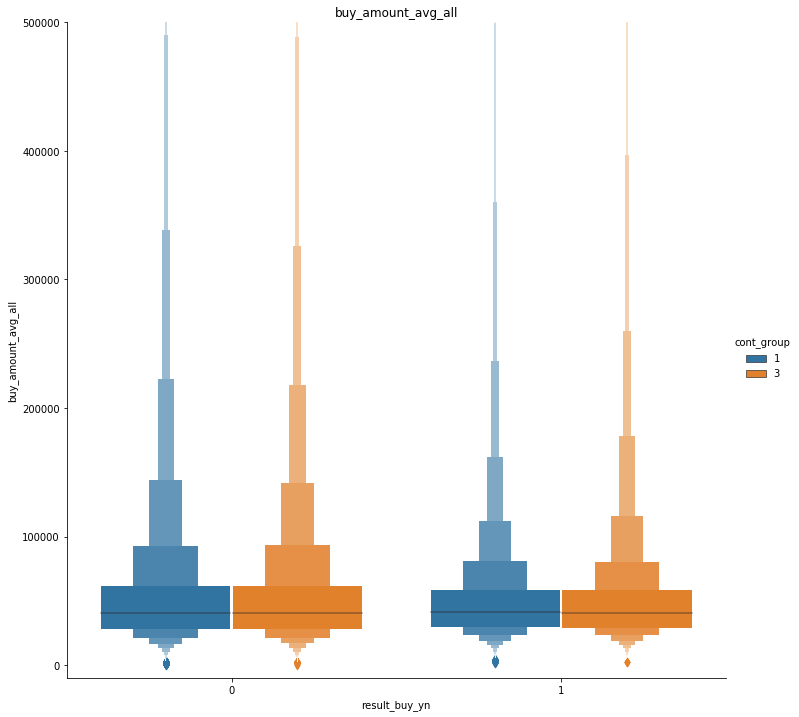

In [273]:
# Boxen plot
plt.figure(figsize=(10,10))
sns.catplot(x="result_buy_yn", y=numerical_features[20], hue="cont_group", data=data, kind='boxen', height=10)
plt.title( numerical_features[20] )

plt.ylim(-1e4,5e5)
plt.show()
plt.close()

---

# 연습장

In [327]:
tmp = data[['cont_group', 'result_buy_yn', 'buy_cnt_payment', 'crm_coupon_use_rate', 'buy_amount_3day', 'rgt_elapsed_days', 'buy_amount_avg_all']].copy()

In [328]:
tmp.describe()

,cont_group,result_buy_yn,buy_cnt_payment,crm_coupon_use_rate,buy_amount_3day,rgt_elapsed_days,buy_amount_avg_all
count,419554.000000,419554.000000,419554.000000,419554.000000,4.195540e+05,419554.000000,4.195540e+05
mean,1.153091,0.094455,26.908057,1.205938,6.291297e+04,1920.926265,6.142711e+04
std,0.531739,0.292461,26.878366,3.633339,1.592648e+05,839.180899,1.109488e+05
min,1.000000,0.000000,1.000000,0.000000,1.000000e+00,1.000000,1.000000e+02
25%,1.000000,0.000000,7.000000,0.000000,1.590000e+04,1396.000000,2.800169e+04
50%,1.000000,0.000000,19.000000,0.000000,3.140000e+04,2079.000000,4.058340e+04
75%,1.000000,0.000000,39.000000,0.000000,6.190000e+04,2506.000000,6.150000e+04
max,3.000000,1.000000,1253.000000,100.000000,3.294170e+07,3332.000000,2.858705e+07


In [334]:
tmp.groupby(['result_buy_yn', 'cont_group']).describe().T

result_buy_yn                         0                           1  \
cont_group                            1             3             1   
buy_cnt_payment     count  3.507040e+05  2.922100e+04  3.673500e+04   
                    mean   2.546899e+01  2.542411e+01  4.067731e+01   
                    std    2.573322e+01  2.585440e+01  3.297704e+01   
                    min    1.000000e+00  1.000000e+00  1.000000e+00   
                    25%    7.000000e+00  6.000000e+00  1.600000e+01   
                    50%    1.700000e+01  1.700000e+01  3.400000e+01   
                    75%    3.600000e+01  3.700000e+01  5.700000e+01   
                    max    1.253000e+03  5.500000e+02  9.560000e+02   
crm_coupon_use_rate count  3.507040e+05  2.922100e+04  3.673500e+04   
                    mean   1.246079e+00  6.079874e-01  1.345474e+00   
                    std    3.760750e+00  2.851255e+00  2.938956e+00   
                    min    0.000000e+00  0.000000e+00  0.000000e+00   
                    25%    0.000000e+00  0.000000e+00  0.000000e+00   
                    50%    0.000000e+00  0.000000e+00  0.000000e+00   
                    75%    0.000000e+00  0.000000e+00  2.000000e+00   
                    max    1.000000e+02  1.000000e+02  5.000000e+01   
buy_amount_3day     count  3.507040e+05  2.922100e+04  3.673500e+04   
                    mean   6.272904e+04  6.161760e+04  6.557626e+04   
                    std    1.601382e+05  1.371587e+05  1.686019e+05   
                    min    1.000000e+00  1.000000e+00  8.400000e+01   
                    25%    1.590000e+04  1.590000e+04  1.690000e+04   
                    50%    3.100000e+04  3.090000e+04  3.380000e+04   
                    75%    6.150000e+04  6.150000e+04  6.855000e+04   
                    max    3.294170e+07  4.698000e+06  1.159970e+07   
rgt_elapsed_days    count  3.507040e+05  2.922100e+04  3.673500e+04   
                    mean   1.915472e+03  1.923801e+03  1.964913e+03   
                    std    8.411149e+02  8.349731e+02  8.244251e+02   
                    min    1.000000e+00  1.000000e+00  1.000000e+00   
                    25%    1.389000e+03  1.401000e+03  1.459000e+03   
                    50%    2.075000e+03  2.079000e+03  2.106000e+03   
                    75%    2.503000e+03  2.505000e+03  2.534000e+03   
                    max    3.332000e+03  3.332000e+03  3.332000e+03   
buy_amount_avg_all  count  3.507040e+05  2.922100e+04  3.673500e+04   
                    mean   6.201467e+04  6.151934e+04  5.606886e+04   
                    std    1.121885e+05  1.026129e+05  1.063490e+05   
                    min    1.000000e+02  2.900000e+02  1.450000e+03   
                    25%    2.785820e+04  2.782834e+04  2.942311e+04   
                    50%    4.056667e+04  4.034033e+04  4.089566e+04   
                    75%    6.186577e+04  6.180030e+04  5.849506e+04   
                    max    2.858705e+07  7.143462e+06  1.159970e+07   
**_buy_cnt_payment  count  3.507040e+05  2.922100e+04  3.673500e+04   
                    mean   1.310866e+03  1.314812e+03  2.742099e+03   
                    std    4.202871e+03  3.519167e+03  8.306683e+03   
                    min    1.000000e+00  1.000000e+00  1.000000e+00   
                    25%    4.900000e+01  3.600000e+01  2.560000e+02   
                    50%    2.890000e+02  2.890000e+02  1.156000e+03   
                    75%    1.296000e+03  1.369000e+03  3.249000e+03   
                    max    1.570009e+06  3.025000e+05  9.139360e+05   

result_buy_yn                            
cont_group                            3  
buy_cnt_payment     count  2.894000e+03  
                    mean   4.150207e+01  
                    std    3.229933e+01  
                    min    1.000000e+00  
                    25%    1.700000e+01  
                    50%    3.500000e+01  
                    75%    5.900000e+01  
                    max    3.170000e+02  
crm_coupon_use_rate count  2.

---

### Robust scaler

In [283]:
import sklearn

In [311]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

In [312]:
X = tmp[['buy_cnt_payment', 'crm_coupon_use_rate', 'buy_amount_3day', 'rgt_elapsed_days', 'buy_amount_avg_all']] 

In [313]:
minmax_scaler.fit(X)
X_minmax_scaled = minmax_scaler.transform(X)
np.mean(X_minmax_scaled), np.std(X_minmax_scaled)

(0.12263782817474177, 0.2541202430256807)

In [314]:
X_minmax_scaled_df = pd.DataFrame(X_minmax_scaled, columns = ['buy_cnt_payment', 'crm_coupon_use_rate', 'buy_amount_3day', 'rgt_elapsed_days', 'buy_amount_avg_all'])

In [315]:
X_minmax_scaled_df.describe()

,buy_cnt_payment,crm_coupon_use_rate,buy_amount_3day,rgt_elapsed_days,buy_amount_avg_all
count,419554.000000,419554.000000,419554.000000,419554.000000,419554.000000
mean,0.020693,0.012059,0.001910,0.576381,0.002145
std,0.021468,0.036333,0.004835,0.251931,0.003881
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.004792,0.000000,0.000483,0.418793,0.000976
50%,0.014377,0.000000,0.000953,0.623837,0.001416
75%,0.030351,0.000000,0.001879,0.752026,0.002148
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [316]:
X_minmax_scaled_df = pd.concat([X_minmax_scaled_df , tmp[['cont_group', 'result_buy_yn']]], axis=1)

In [317]:
X_minmax_scaled_df.head()

,buy_cnt_payment,crm_coupon_use_rate,buy_amount_3day,rgt_elapsed_days,buy_amount_avg_all,cont_group,result_buy_yn
0,0.045527,0.0,0.002095,0.999400,0.000978,3,1
1,0.000799,0.0,0.000835,0.997598,0.000651,1,0
2,0.011182,0.0,0.000358,0.997598,0.000761,3,0
3,0.005591,0.0,0.000152,0.996698,0.000522,1,0
4,0.054313,0.0,0.000568,0.996998,0.000775,1,0


---

### 기존 vs Robust_scaler 의 exponential 값 비교

In [280]:
tmp[['cont_group', 'result_buy_yn', 'buy_cnt_payment']].groupby(['result_buy_yn', 'cont_group']).mean()

buy_cnt_payment
result_buy_yn cont_group                 
0             1                 25.468991
              3                 25.424113
1             1                 40.677310
              3                 41.502073

In [329]:
tmp['**_buy_cnt_payment'] = tmp['buy_cnt_payment']**2
#tmp['exp_buy_cnt_payment'] = np.exp(tmp['exp_buy_cnt_payment'])
#tmp['exp_buy_cnt_payment'] = np.exp(tmp['exp_buy_cnt_payment'])
#tmp['exp_buy_cnt_payment'] = np.exp(tmp['exp_buy_cnt_payment'])
#tmp['exp_buy_cnt_payment'] = np.exp(tmp['exp_buy_cnt_payment'])

In [330]:
tmp[['cont_group', 'result_buy_yn', '**_buy_cnt_payment']].groupby(['result_buy_yn', 'cont_group']).describe()

**_buy_cnt_payment                                 \
                                      count         mean          std  min   
result_buy_yn cont_group                                                     
0             1                    350704.0  1310.866260  4202.870770  1.0   
              3                     29221.0  1314.812429  3519.166703  1.0   
1             1                     36735.0  2742.099115  8306.682672  1.0   
              3                      2894.0  2765.308569  4673.243280  1.0   

                                                            
                            25%     50%     75%        max  
result_buy_yn cont_group                                    
0             1            49.0   289.0  1296.0  1570009.0  
              3            36.0   289.0  1369.0   302500.0  
1             1           256.0  1156.0  3249.0   913936.0  
              3           289.0  1225.0  3481.0   100489.0

In [318]:
X_minmax_scaled_df[['cont_group', 'result_buy_yn', 'buy_cnt_payment']].groupby(['result_buy_yn', 'cont_group']).mean()

buy_cnt_payment
result_buy_yn cont_group                 
0             1                  0.019544
              3                  0.019508
1             1                  0.031691
              3                  0.032350

In [321]:
X_minmax_scaled_df['exp_buy_cnt_payment'] = np.exp( 1+ X_minmax_scaled_df['buy_cnt_payment'])

In [326]:
X_minmax_scaled_df[['cont_group', 'result_buy_yn', 'exp_buy_cnt_payment']].groupby(['result_buy_yn', 'cont_group']).describe()

exp_buy_cnt_payment                                \
                                       count      mean       std       min   
result_buy_yn cont_group                                                     
0             1                     350704.0  2.772526  0.058637  2.718282   
              3                      29221.0  2.772431  0.058684  2.718282   
1             1                      36735.0  2.806806  0.077289  2.718282   
              3                       2894.0  2.808602  0.073866  2.718282   

                                                                  
                               25%       50%       75%       max  
result_buy_yn cont_group                                          
0             1           2.731340  2.753243  2.795344  7.389056  
              3           2.729159  2.753243  2.797578  4.214363  
1             1           2.751045  2.790882  2.842626  5.828616  
              3           2.753243  2.793112  2.847171  3.498716

(0, 50)

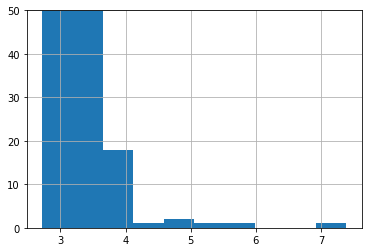

In [323]:
X_minmax_scaled_df['exp_buy_cnt_payment'].hist()
plt.ylim(0,50)

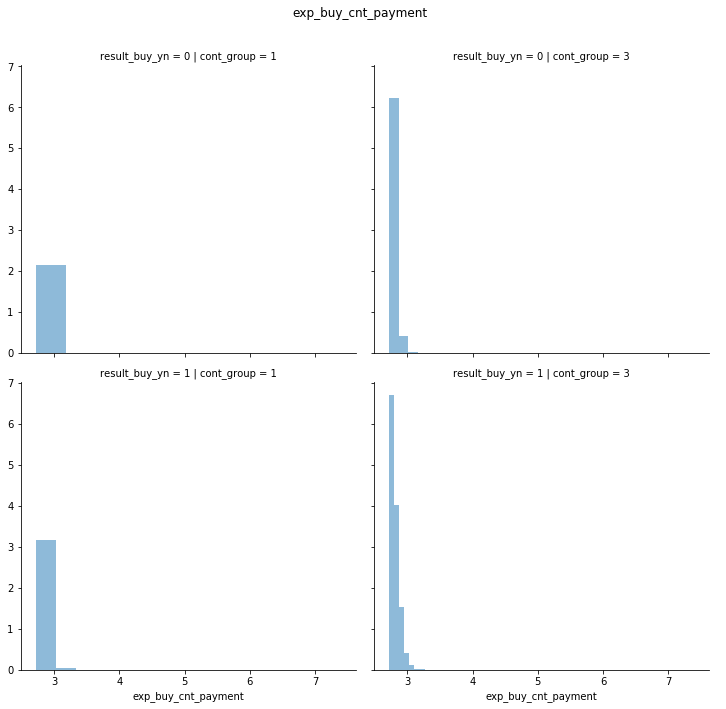

In [324]:
grid = sns.FacetGrid(X_minmax_scaled_df, row='result_buy_yn',col='cont_group', height=5)
grid.map( plt.hist, 'exp_buy_cnt_payment', alpha=.5, bins=10, density=True)

plt.subplots_adjust(top=0.9) # for title
grid.fig.suptitle( 'exp_buy_cnt_payment' ) #for title
grid.add_legend()

plt.show()
plt.close()

---

In [335]:
tmp.head()

,cont_group,result_buy_yn,buy_cnt_payment,crm_coupon_use_rate,buy_amount_3day,rgt_elapsed_days,buy_amount_avg_all,**_buy_cnt_payment
0,3,1,58,0,69000,3330,28052.625000,3364
1,1,0,2,0,27500,3324,18700.000000,4
2,3,0,15,0,11800,3324,21855.636364,225
3,1,0,8,0,5000,3321,15016.666667,64
4,1,0,69,0,18700,3322,22247.265306,4761


In [336]:
tmp['new_to_cont'] = 1000*tmp['buy_cnt_payment'] + 10*tmp['rgt_elapsed_days'] + tmp['buy_amount_avg_all']

In [338]:
tmp[['cont_group', 'result_buy_yn', 'new_to_cont']].groupby(['result_buy_yn', 'cont_group']).describe()

new_to_cont                                        \
                               count           mean            std     min   
result_buy_yn cont_group                                                     
0             1             350704.0  106638.380466  113164.033654  2000.0   
              3              29221.0  106181.469993  103705.768858  3010.0   
1             1              36735.0  116395.306001  109212.563661  5670.0   
              3               2894.0  118755.968478   97508.258574  4220.0   

                                                                      \
                                   25%            50%            75%   
result_buy_yn cont_group                                               
0             1           64527.708333   89230.000000  121010.578125   
              3           64555.000000   89235.454545  120824.545455   
1             1           78918.995924  104316.650000  134899.972222   
              3           79895.891148  106349.850073  136182.528571   

                                      
                                 max  
result_buy_yn cont_group              
0             1           28623190.0  
              3            7176482.5  
1             1           11604710.0  
              3            2479010.0

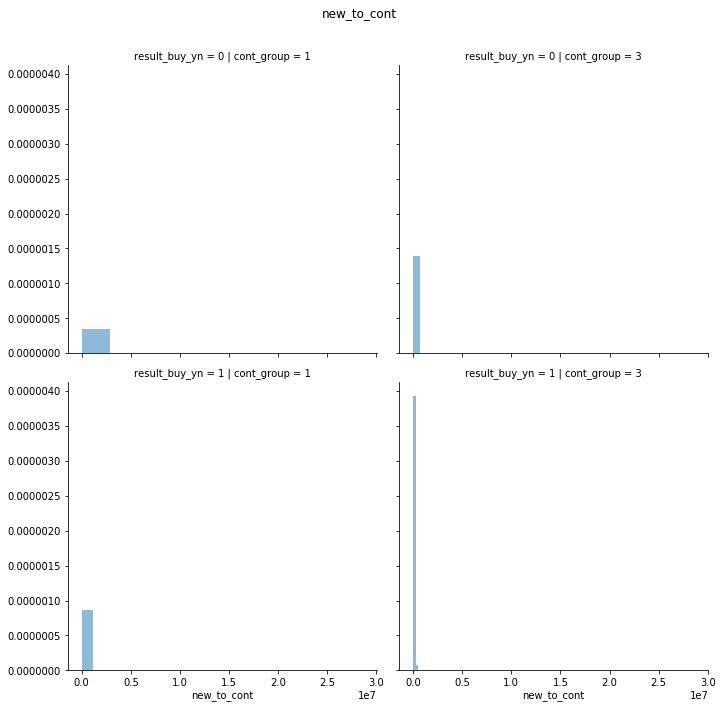

In [337]:
grid = sns.FacetGrid( tmp, row='result_buy_yn',col='cont_group', height=5)
grid.map( plt.hist, 'new_to_cont', alpha=.5, bins=10, density=True)

plt.subplots_adjust(top=0.9) # for title
grid.fig.suptitle( 'new_to_cont' ) #for title
grid.add_legend()

plt.show()
plt.close()

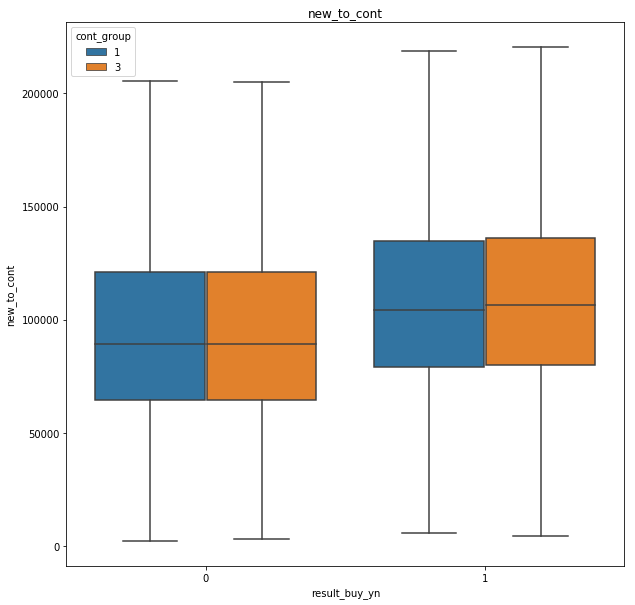

In [340]:
plt.figure(figsize=(10,10))
sns.boxplot(x="result_buy_yn", y='new_to_cont', hue="cont_group", data=tmp , showfliers=False) 
plt.title( 'new_to_cont' )
plt.show()
plt.close()